In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Datasets\Priceline Interview Take-Home Assessment Data.csv')
df.head()

,hotel_id,hotel_brand,book_date,check_in,check_out,star_rating,price
0,PMvwpgna7CtZ0T6qQXTWg8t5e3cpBuvTmi03fyml74g=,4.0,5/29/2022,1/8/2023,1/12/2023,NaN,751.80
1,cS/i74U58EtWvS1Ngdt9H5AZSJmSUhEuHQcSGVNC3Xs=,4.0,6/9/2022,1/18/2023,1/26/2023,NaN,3084.84
2,jUkLQRjbZVTB9SLYEb6sTGBakGGzelEPJt2RbGtTk+I=,3.0,5/30/2022,1/7/2023,1/12/2023,NaN,4209.89
3,JX8BO6EgCtMipXf8DFNIxl3N1H9PtlGEZpAykhuehmw=,5.0,5/31/2022,1/6/2023,1/7/2023,2.5,80.55
4,4kzGFcSnNKHV5EUXsGykjPK/vKowpQ+70FcYU+3uIqA=,1.0,6/2/2022,1/24/2023,2/7/2023,3.0,344.72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hotel_id     10000 non-null  object 
 1   hotel_brand  9960 non-null   float64
 2   book_date    9990 non-null   object 
 3   check_in     9990 non-null   object 
 4   check_out    9990 non-null   object 
 5   star_rating  7741 non-null   float64
 6   price        9990 non-null   float64
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


In [4]:
df.describe()

,hotel_brand,star_rating,price
count,9960.000000,7741.000000,9990.000000
mean,3.161847,3.402403,429.605564
std,1.445433,0.633834,745.548778
min,1.000000,2.000000,15.020000
25%,2.000000,3.000000,143.822500
50%,3.000000,3.500000,227.920000
75%,5.000000,4.000000,415.715000
max,5.000000,4.500000,16655.390000


In [5]:
df['star_rating'].unique()

array([nan, 2.5, 3. , 3.5, 4.5, 4. , 2. ])

### step 1 : removing the outliers
### step 2 : adding extra columns for month, weekday, weekend, stay_days.
### step 3 : dealing with null values.

#### stats regarding avg days, highest days, lowest days of bookings(total stay of each customer )
#### avg rating by hotel id, hotel brand (main)
#### price my month, weekend, weekdays,  hotel brand ,hotel id.
#### total revenue by brand.
#### trends by booking month, date. in 2022

#### Booking Trends Over Time: Analyze the booking dates to identify any seasonal or monthly trends in hotel bookings.
#### Price Variation: Examine the distribution of prices to identify any outliers or trends in pricing across different hotels and booking dates.#### Star Rating Distribution: Investigate the distribution of star ratings to understand the popularity of hotels with different ratings.
#### Duration of Stay: Analyze the duration between check-in and check-out dates to identify common lengths of st

## Removing outliers

In [6]:
df.isnull().sum()

hotel_id          0
hotel_brand      40
book_date        10
check_in         10
check_out        10
star_rating    2259
price            10
dtype: int64

In [7]:
df.columns

Index(['hotel_id', 'hotel_brand', 'book_date', 'check_in', 'check_out',
       'star_rating', 'price'],
      dtype='object')

In [8]:
df[df['book_date'].isnull()]

,hotel_id,hotel_brand,book_date,check_in,check_out,star_rating,price
8414,/4dVnCP2mimBlFFJ3EHQQrMbUsxCUYmO3T/CMLeGyPU=,2.0,NaN,NaN,NaN,NaN,NaN
8415,dJ7My8iKbXkyXH5ACAlZPKCnC16Ek02RuaMW0ZXugQg=,5.0,NaN,NaN,NaN,NaN,NaN
8435,AH+MzmbBnOsMfSPp480EQTmDh1ia4+yivnSPVM9KsjY=,5.0,NaN,NaN,NaN,NaN,NaN
8490,zjH2Q4u34QAkoJyyj8BdrOxr2zGdK5KhZWRTKN35cgA=,5.0,NaN,NaN,NaN,NaN,NaN
8491,7PQBuKPOddGrSMjBg36AVaPqhMrpFOQOng6F2o8zDS4=,2.0,NaN,NaN,NaN,NaN,NaN
8492,qj8Lf9VdFZscKWvnm9WnQf/XYotq3juoNgtDLJHvQsw=,1.0,NaN,NaN,NaN,NaN,NaN
8493,of6ibOR0FtgIJU7x5TT9FQCvxjW95AOkW2Khpd3p5SU=,1.0,NaN,NaN,NaN,NaN,NaN
8494,bcf3koHAzVYt4h9kU5mO93aEcn8xoHtwKJ2vm+ydLrY=,2.0,NaN,NaN,NaN,NaN,NaN
8514,16+tr1Tlqoqbm/VA6XwT7Cymndyy3vCDT3Zi/UK9xOs=,2.0,NaN,NaN,NaN,NaN,NaN
8515,O6ClwQ1OJCH1Ty48dXtAzQyNzIOaQ9P0RHPfB9V21yU=,2.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dropna(subset=['book_date'], inplace=True)

In [10]:
df.isnull().sum()

hotel_id          0
hotel_brand      40
book_date         0
check_in          0
check_out         0
star_rating    2249
price             0
dtype: int64

## Adding extra columns

In [11]:
# Convert 'book_date' column to datetime format if not already done
df['book_date'] = pd.to_datetime(df['book_date'])
df['check_in'] = pd.to_datetime(df['check_in'])
df['check_out'] = pd.to_datetime(df['check_out'])

# Extract year from 'book_date'
df['book_year'] = df['book_date'].dt.to_period('Y')

# Extract month from 'book_date' and format it to display month names
df['book_month'] = df['book_date'].dt.strftime('%b')

# Extract week from 'book_date' and format it to display weekday names
df['book_day'] = df['book_date'].dt.strftime('%A')

# Extract week from 'check_in' and format it to display weekday names
df['checkin_day'] = df['check_in'].dt.strftime('%A')

# Calculate duration of stay
df['duration_stay'] = (df['check_out'] - df['check_in']).dt.days

#Calculating the price of hotel per day
df['price_per_day'] = df['price']/df['duration_stay']


In [12]:
df.head()

,hotel_id,hotel_brand,book_date,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day
0,PMvwpgna7CtZ0T6qQXTWg8t5e3cpBuvTmi03fyml74g=,4.0,2022-05-29,2023-01-08,2023-01-12,NaN,751.80,2022,May,Sunday,Sunday,4,187.950000
1,cS/i74U58EtWvS1Ngdt9H5AZSJmSUhEuHQcSGVNC3Xs=,4.0,2022-06-09,2023-01-18,2023-01-26,NaN,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000
2,jUkLQRjbZVTB9SLYEb6sTGBakGGzelEPJt2RbGtTk+I=,3.0,2022-05-30,2023-01-07,2023-01-12,NaN,4209.89,2022,May,Monday,Saturday,5,841.978000
3,JX8BO6EgCtMipXf8DFNIxl3N1H9PtlGEZpAykhuehmw=,5.0,2022-05-31,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000
4,4kzGFcSnNKHV5EUXsGykjPK/vKowpQ+70FcYU+3uIqA=,1.0,2022-06-02,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857


In [13]:
# Create a mapping of unique hotel_ids to unique numeric values
hotel_id_mapping = {hotel_id: i+1 for i, hotel_id in enumerate(df['hotel_id'].unique())}

# Map the hotel_ids to their corresponding numeric values
df['hotel_id_numeric'] = df['hotel_id'].map(hotel_id_mapping)

In [14]:
df.drop('hotel_id', axis = 1 , inplace =True)

In [15]:
df.head()

,hotel_brand,book_date,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id_numeric
0,4.0,2022-05-29,2023-01-08,2023-01-12,NaN,751.80,2022,May,Sunday,Sunday,4,187.950000,1
1,4.0,2022-06-09,2023-01-18,2023-01-26,NaN,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2
2,3.0,2022-05-30,2023-01-07,2023-01-12,NaN,4209.89,2022,May,Monday,Saturday,5,841.978000,3
3,5.0,2022-05-31,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4
4,1.0,2022-06-02,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5


In [16]:
df.rename(columns = {'hotel_id_numeric': 'hotel_id'}, inplace = True)

In [17]:
df.head()

,hotel_brand,book_date,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id
0,4.0,2022-05-29,2023-01-08,2023-01-12,NaN,751.80,2022,May,Sunday,Sunday,4,187.950000,1
1,4.0,2022-06-09,2023-01-18,2023-01-26,NaN,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2
2,3.0,2022-05-30,2023-01-07,2023-01-12,NaN,4209.89,2022,May,Monday,Saturday,5,841.978000,3
3,5.0,2022-05-31,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4
4,1.0,2022-06-02,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5


## Dealing with null values

In [18]:
df.isnull().sum()

hotel_brand        40
book_date           0
check_in            0
check_out           0
star_rating      2249
price               0
book_year           0
book_month          0
book_day            0
checkin_day         0
duration_stay       0
price_per_day       0
hotel_id            0
dtype: int64

In [19]:
df.dropna(subset=['hotel_brand'], inplace=True)

In [20]:
df.corr()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_45304\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,hotel_brand,star_rating,price,duration_stay,price_per_day,hotel_id
hotel_brand,1.000000,0.154147,0.118255,0.071512,0.156464,-0.122962
star_rating,0.154147,1.000000,0.055181,0.041273,0.060641,-0.117821
price,0.118255,0.055181,1.000000,0.632586,0.732235,-0.148274
duration_stay,0.071512,0.041273,0.632586,1.000000,0.170843,-0.163421
price_per_day,0.156464,0.060641,0.732235,0.170843,1.000000,-0.105849
hotel_id,-0.122962,-0.117821,-0.148274,-0.163421,-0.105849,1.000000


#### By the above correlation anaylsis we can conclude that there is a positive correlation between price and duration_stay.
#### There is weak or non linear correlation between any other features.

In [21]:
df1 = df[df['star_rating'].notnull()]

In [22]:
df1.isnull().sum()

hotel_brand      0
book_date        0
check_in         0
check_out        0
star_rating      0
price            0
book_year        0
book_month       0
book_day         0
checkin_day      0
duration_stay    0
price_per_day    0
hotel_id         0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split the DataFrame into features (x, y) and target (z)
X = df1[['hotel_brand', 'price']]
y = df1['star_rating']


# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Train the Decision Tree Regressor
tree_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.8182990153801927


In [24]:
# New input values
new_input = [[1.0, 344.72]]

# Scale the new input using the same scaler object
scaled_input = scaler.transform(new_input)

tree_regressor.predict(scaled_input)

C:\Users\SPURUSHO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.])

In [25]:
# df2 = df[df['star_rating'].isnull()]

In [26]:
df.isnull().sum()

hotel_brand         0
book_date           0
check_in            0
check_out           0
star_rating      2222
price               0
book_year           0
book_month          0
book_day            0
checkin_day         0
duration_stay       0
price_per_day       0
hotel_id            0
dtype: int64

In [27]:
# for i in df[df['star_rating'].isnull()].index:
#     new_input = [[df['hotel_brand'][i], df['price'][i]]]

#     # Scale the new input using the same scaler object
#     scaled_input = scaler.transform(new_input)

#     df['star_rating'][i] = tree_regressor.predict(scaled_input)

In [28]:
df.head()

,hotel_brand,book_date,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id
0,4.0,2022-05-29,2023-01-08,2023-01-12,NaN,751.80,2022,May,Sunday,Sunday,4,187.950000,1
1,4.0,2022-06-09,2023-01-18,2023-01-26,NaN,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2
2,3.0,2022-05-30,2023-01-07,2023-01-12,NaN,4209.89,2022,May,Monday,Saturday,5,841.978000,3
3,5.0,2022-05-31,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4
4,1.0,2022-06-02,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5


### Since the correlation between the feature are weak we cannot train the model on those features to predict the target feature. So, instead of replacing the null values with predicted values lets replace those values with the mean values of star rating based on hotel_brand

In [29]:
# Calculate the mean star_rating for each hotel_brand
mean_star_rating = df.groupby('hotel_brand')['star_rating'].mean()

# Define a custom rounding function
def custom_round(x):
    return round(x * 2) / 2

# Apply custom rounding to the mean star_rating values
mean_star_rating = mean_star_rating.apply(custom_round)
print(mean_star_rating)

hotel_brand
1.0    3.0
2.0    3.5
3.0    3.5
4.0    3.5
5.0    3.5
Name: star_rating, dtype: float64


In [30]:
# Replace NaN values in 'star_rating' column with the mean star_rating corresponding to the hotel_brand
df['star_rating'] = df.apply(lambda row: mean_star_rating[row['hotel_brand']] if pd.isna(row['star_rating']) else row['star_rating'], axis=1)

In [31]:
df.isnull().sum()

hotel_brand      0
book_date        0
check_in         0
check_out        0
star_rating      0
price            0
book_year        0
book_month       0
book_day         0
checkin_day      0
duration_stay    0
price_per_day    0
hotel_id         0
dtype: int64

In [32]:
df.head()

,hotel_brand,book_date,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id
0,4.0,2022-05-29,2023-01-08,2023-01-12,3.5,751.80,2022,May,Sunday,Sunday,4,187.950000,1
1,4.0,2022-06-09,2023-01-18,2023-01-26,3.5,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2
2,3.0,2022-05-30,2023-01-07,2023-01-12,3.5,4209.89,2022,May,Monday,Saturday,5,841.978000,3
3,5.0,2022-05-31,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4
4,1.0,2022-06-02,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5


## stats regarding avg days, highest days, lowest days of bookings(total stay of each customer )

In [33]:
df['duration_stay'].value_counts()

1     6662
2     1720
3      770
4      388
5      183
6       77
7       73
8       25
9       16
10      12
14       6
12       4
15       3
24       3
20       2
11       2
19       2
21       1
16       1
Name: duration_stay, dtype: int64

### Distribution of Duration Stay

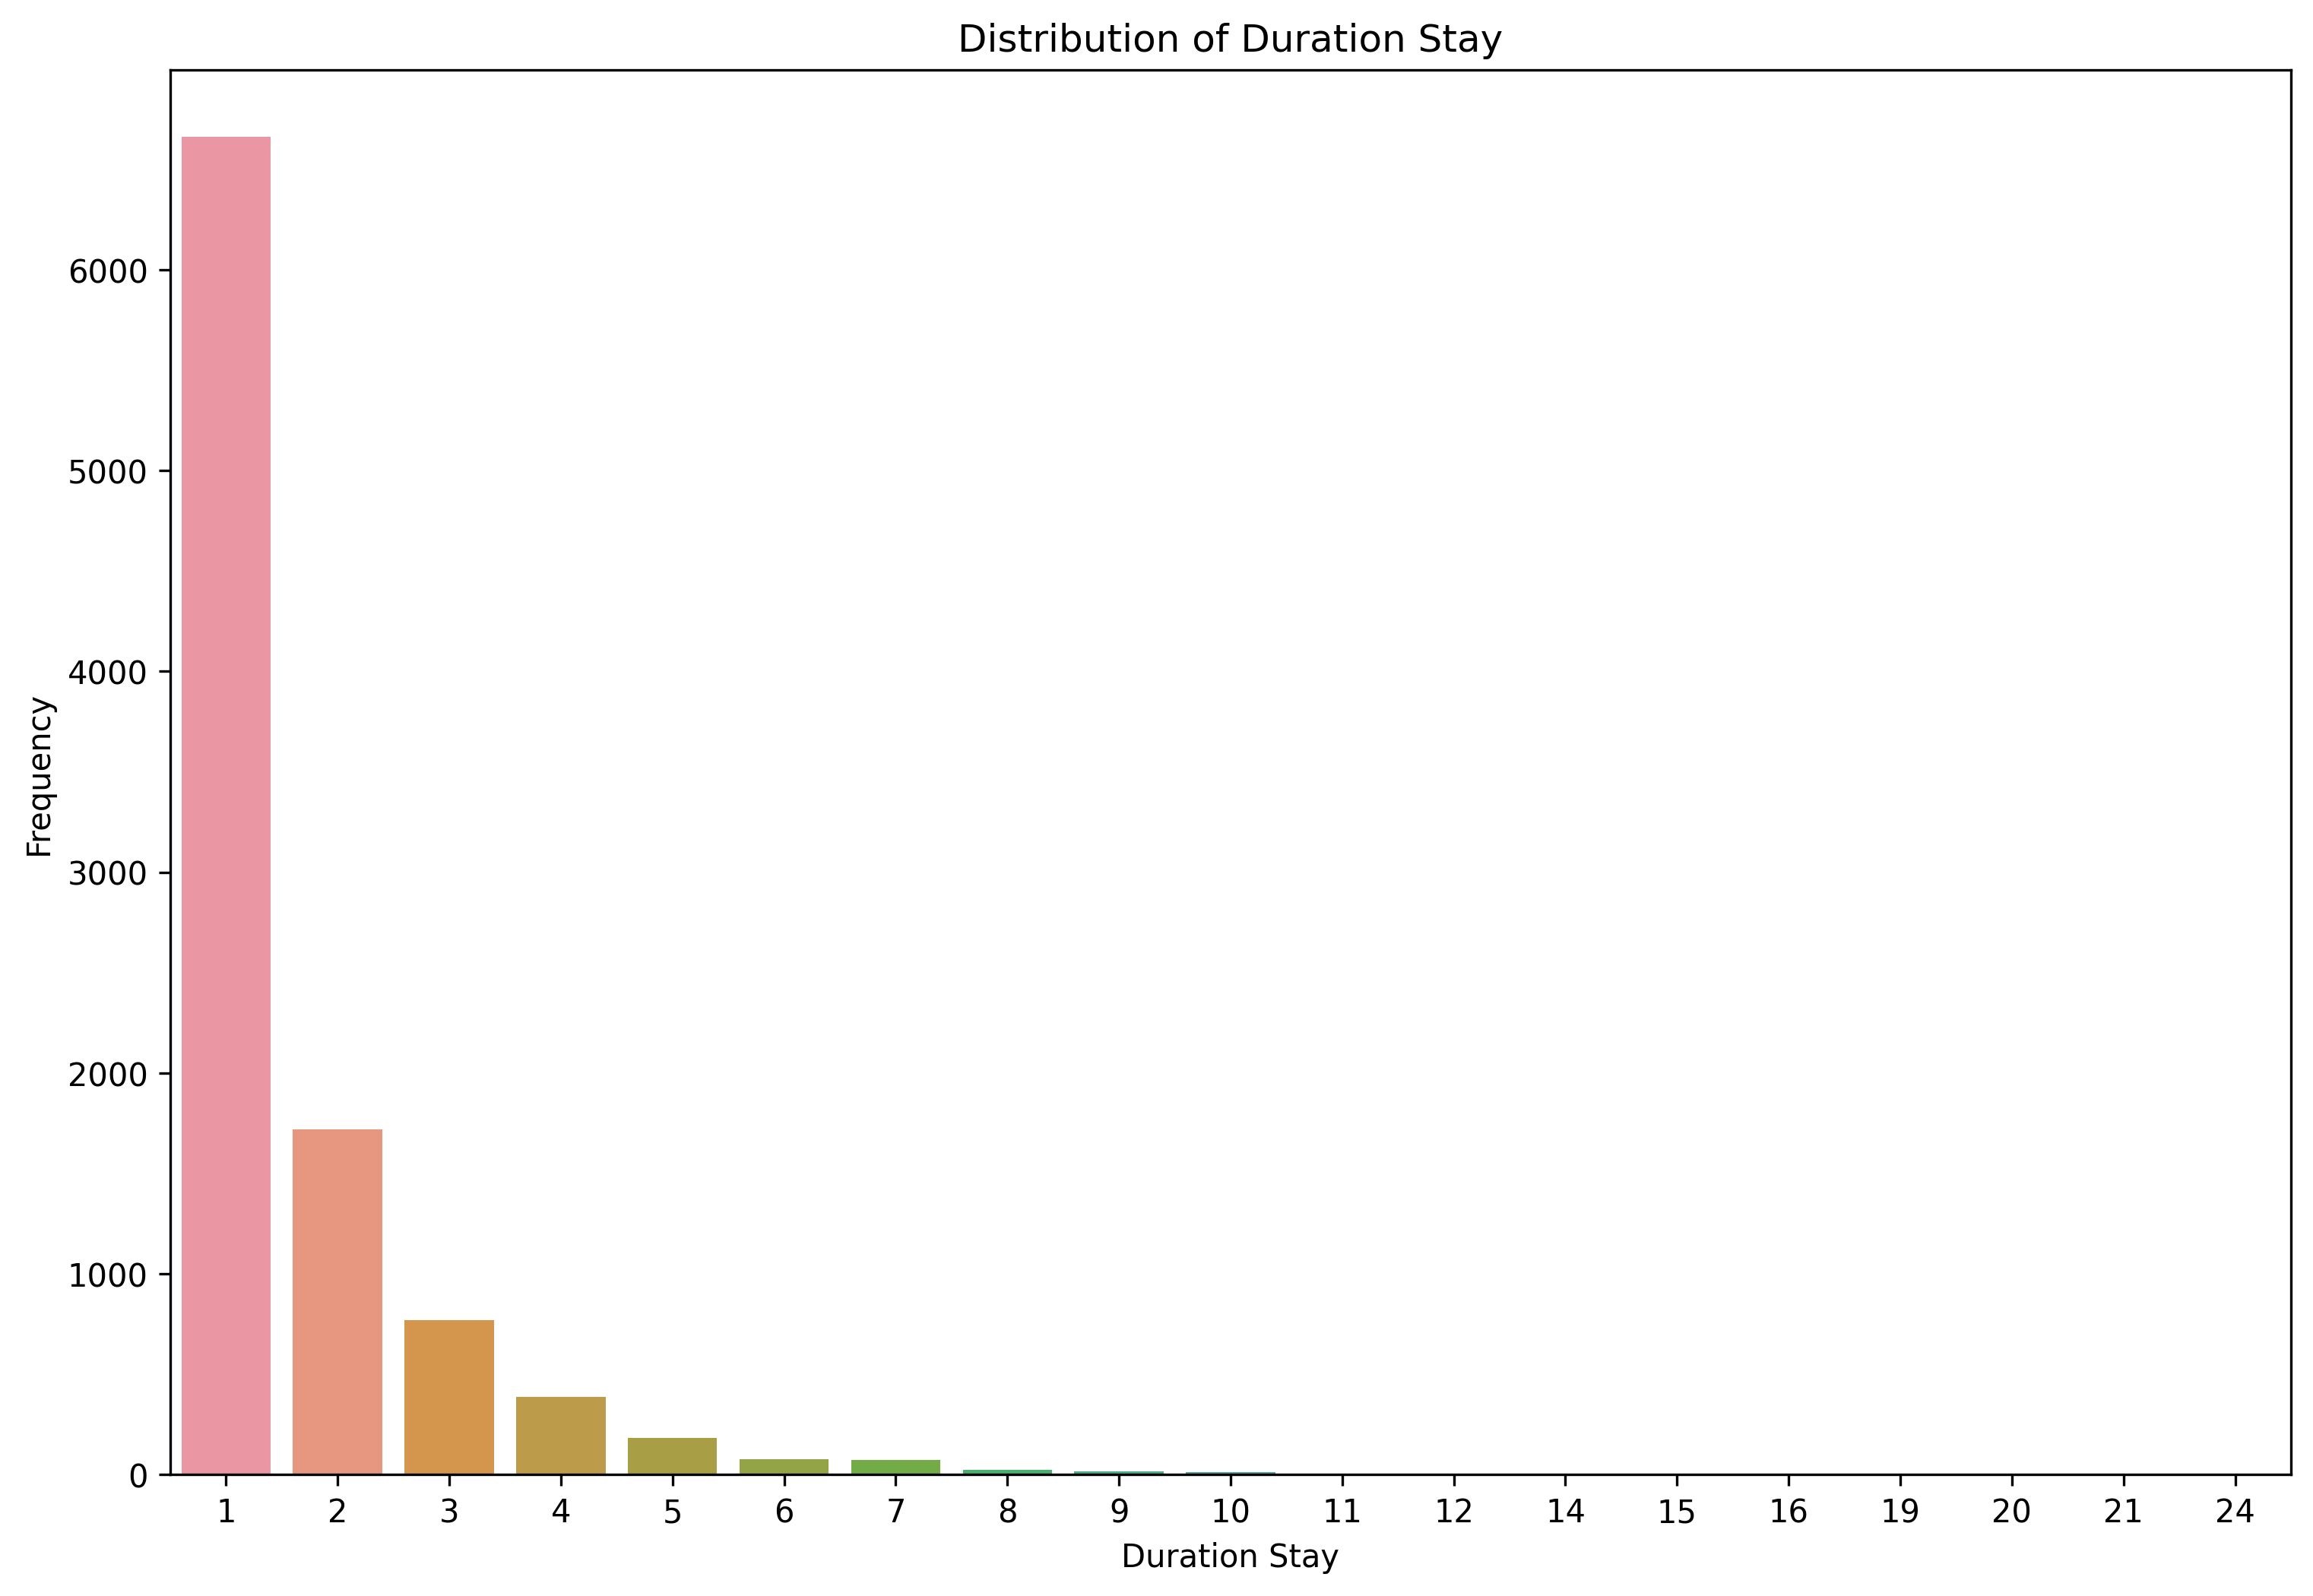

In [34]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8), dpi = 300)
sns.countplot(x = 'duration_stay', data = df)
plt.title('Distribution of Duration Stay')
plt.xlabel('Duration Stay')
plt.ylabel('Frequency')
plt.show()


In [35]:
df.head()

,hotel_brand,book_date,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id
0,4.0,2022-05-29,2023-01-08,2023-01-12,3.5,751.80,2022,May,Sunday,Sunday,4,187.950000,1
1,4.0,2022-06-09,2023-01-18,2023-01-26,3.5,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2
2,3.0,2022-05-30,2023-01-07,2023-01-12,3.5,4209.89,2022,May,Monday,Saturday,5,841.978000,3
3,5.0,2022-05-31,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4
4,1.0,2022-06-02,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5


In [36]:
df['hotel_brand'].value_counts().sort_index()

1.0    1246
2.0    2830
3.0    2083
4.0     645
5.0    3146
Name: hotel_brand, dtype: int64

### Find the count of hotel brands

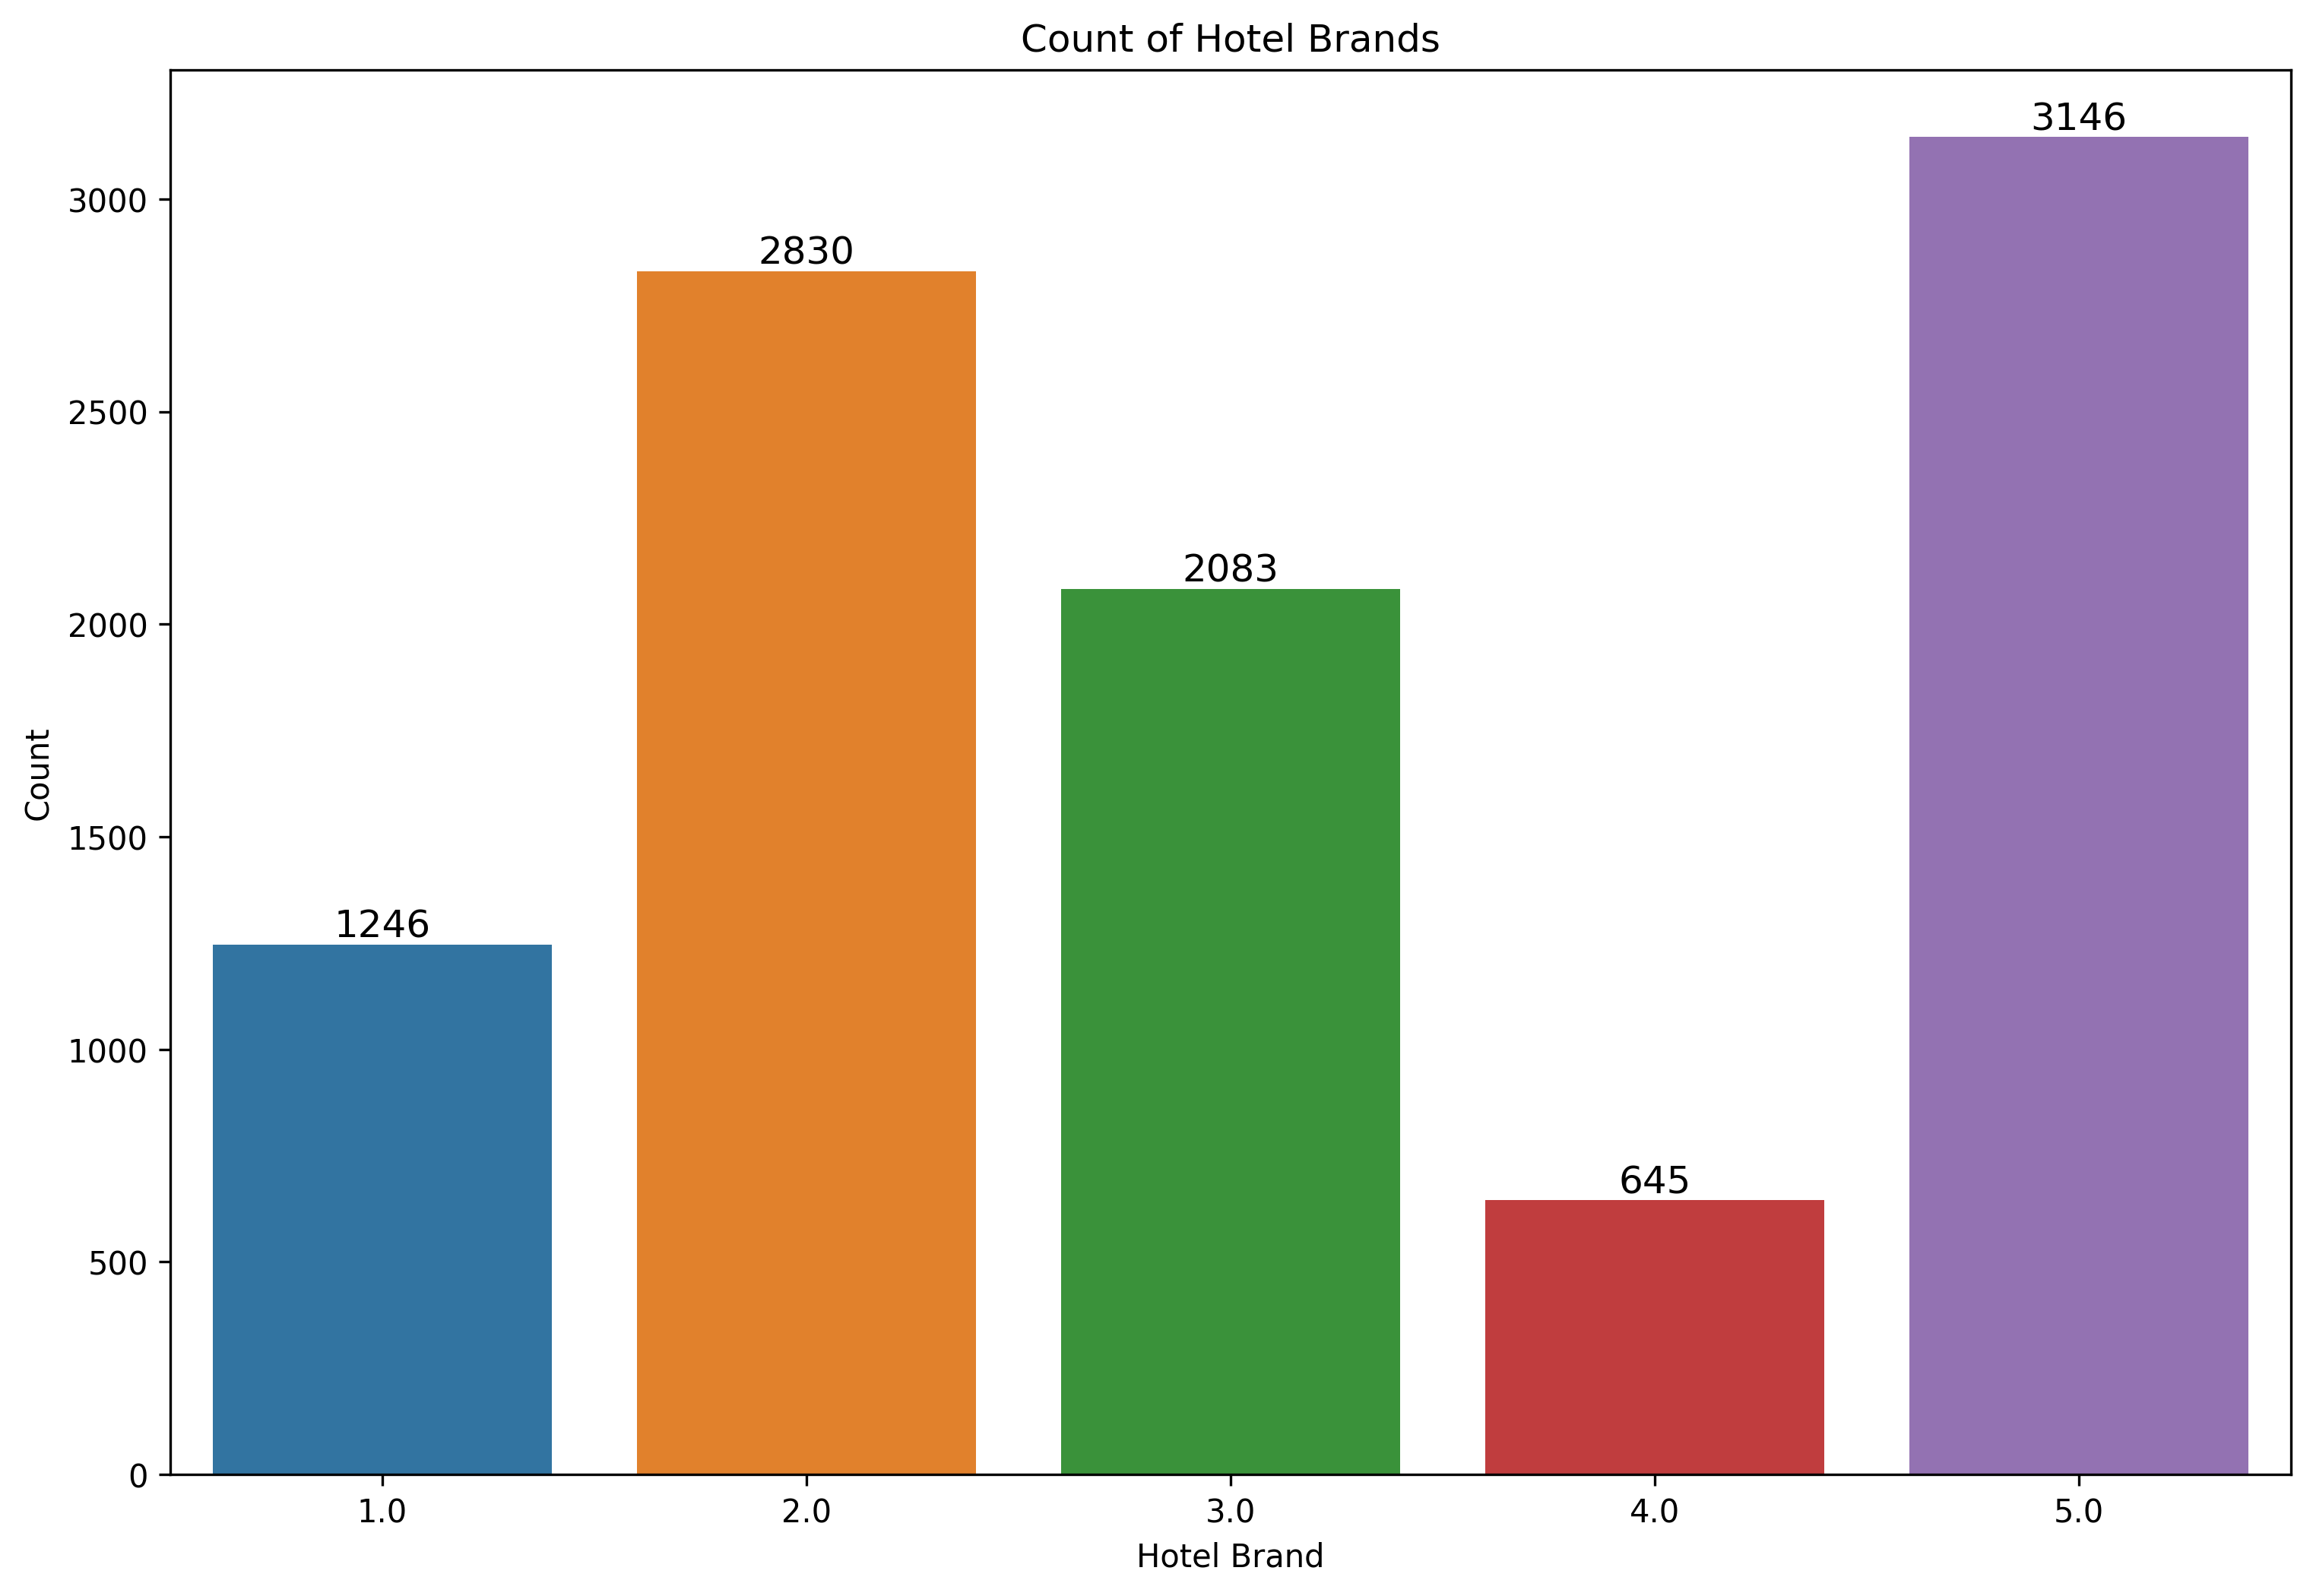

In [37]:
plt.figure(figsize=(12,8), dpi = 300)
sns.countplot(x = 'hotel_brand', data = df)
# Adding annotations
for idx, value in enumerate(df['hotel_brand'].value_counts().sort_index()):
    plt.text(idx, value, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Count of Hotel Brands')
plt.xlabel('Hotel Brand')
plt.ylabel('Count')
plt.show()

##  mean duration of stay (with error bars representing the standard deviation) for each hotel brand

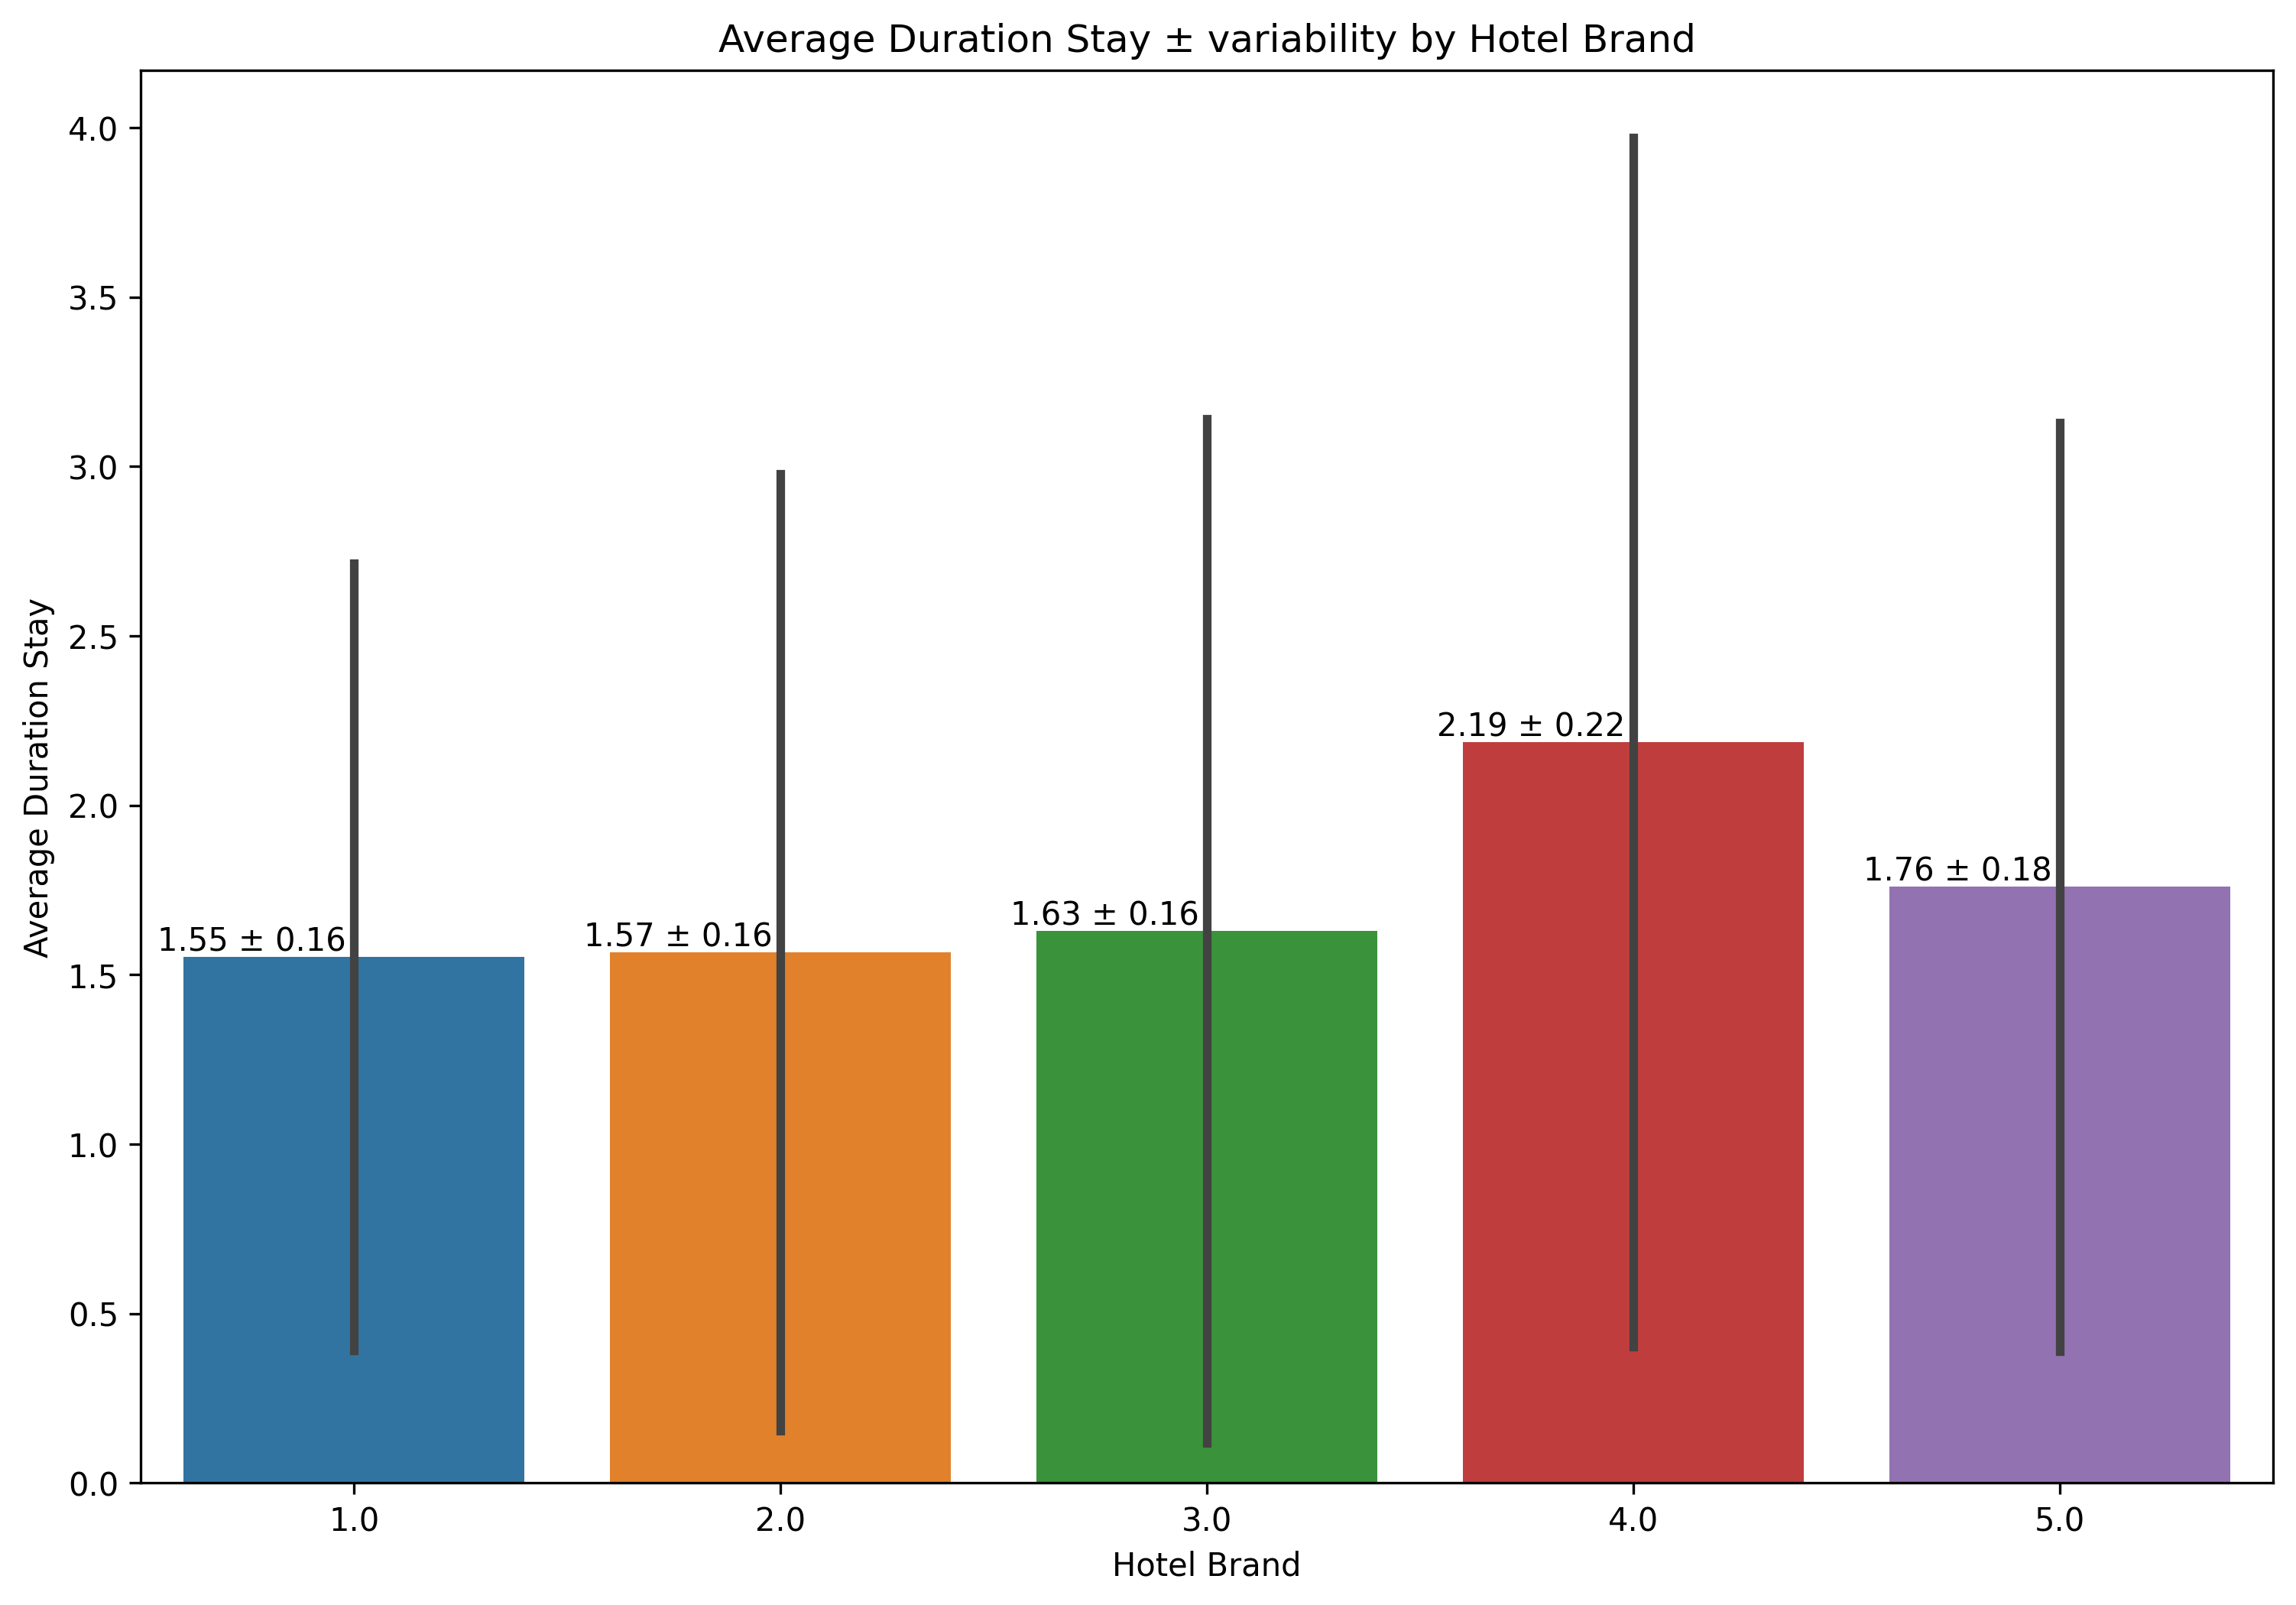

In [38]:
plt.figure(figsize=(12,8), dpi = 300)
ax = sns.barplot(x='hotel_brand', y='duration_stay', data=df, estimator=np.mean, errorbar='sd')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} ± {p.get_height() * 0.1:.2f}', (p.get_x() + p.get_width() / 5., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Duration Stay ± variability by Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Average Duration Stay')
plt.show()


#### from the above graph,we can conclude that average number of stays in 4.0 hotel_brands is higher

In [39]:
df.columns

Index(['hotel_brand', 'book_date', 'check_in', 'check_out', 'star_rating',
       'price', 'book_year', 'book_month', 'book_day', 'checkin_day',
       'duration_stay', 'price_per_day', 'hotel_id'],
      dtype='object')

## Count of Bookings with respect to days

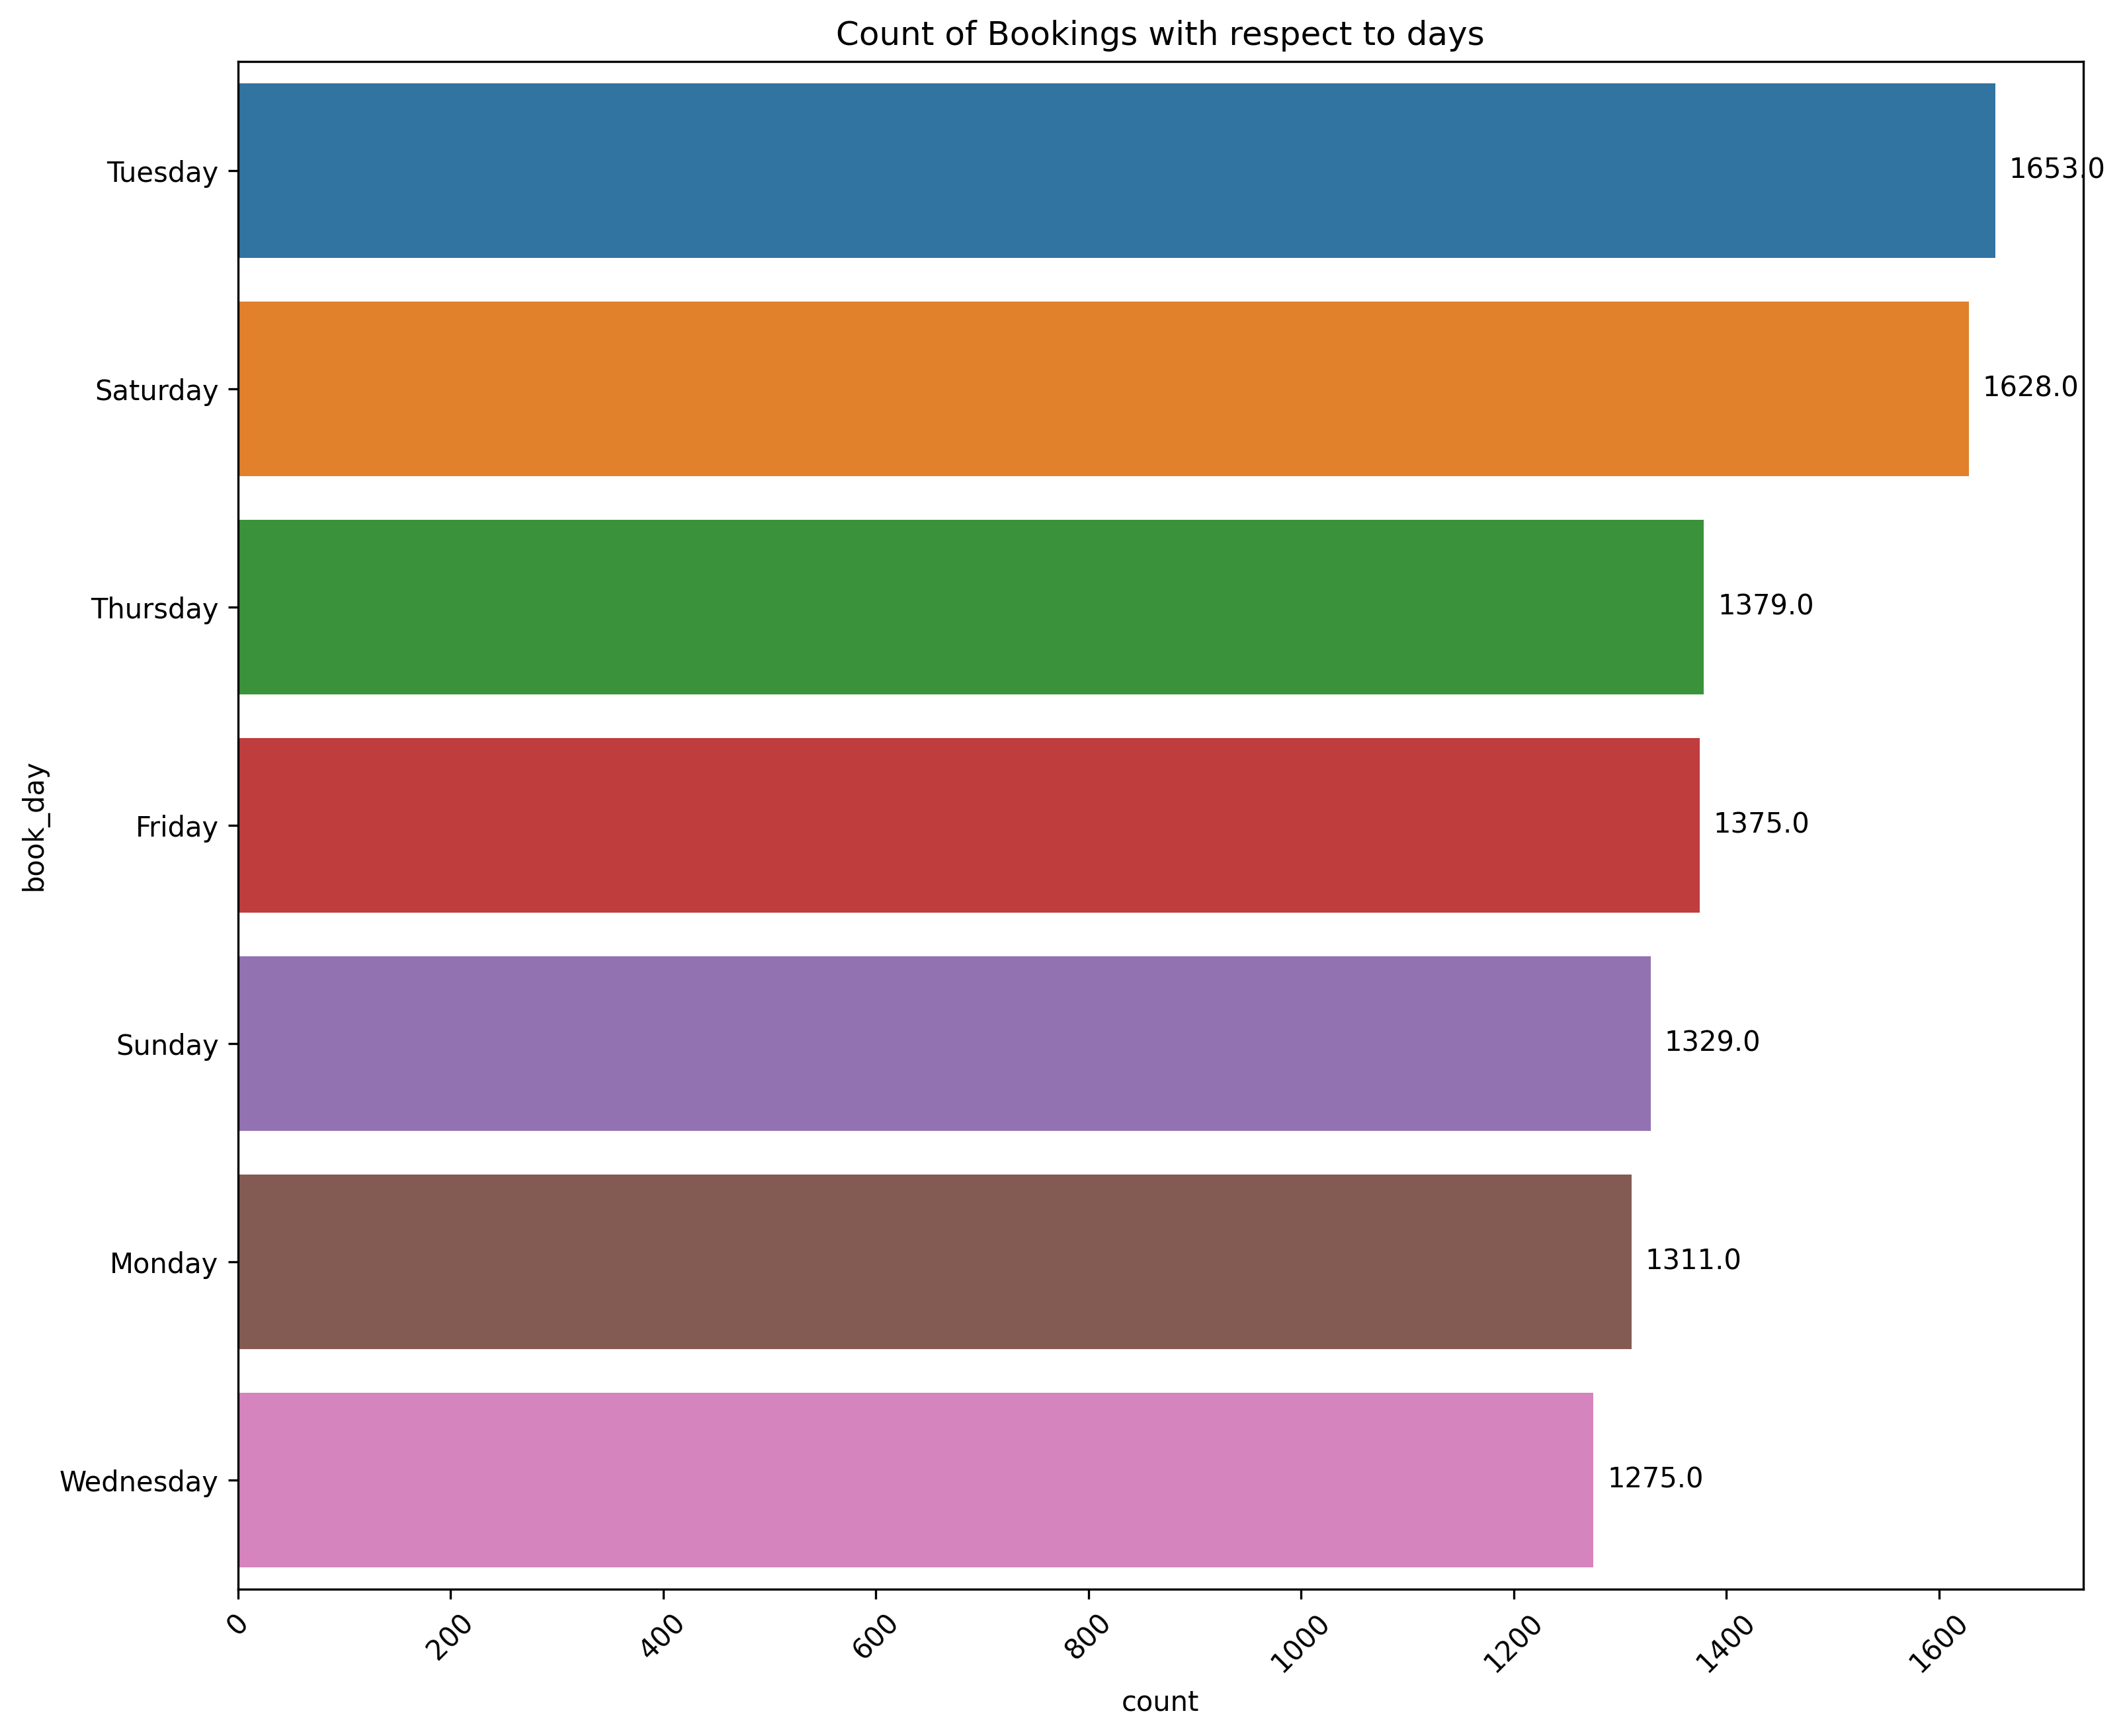

In [40]:
# Sort the categories by frequency
order = df['book_day'].value_counts().index

# Create the plot
plt.figure(figsize=(12, 10), dpi=300)
ax = sns.countplot(y='book_day', data=df, order=order)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')
# Optionally, you can rotate the labels on x-axis for better readability
plt.xticks(rotation=45)
plt.title('Count of Bookings with respect to days')
# Show plot
plt.show()


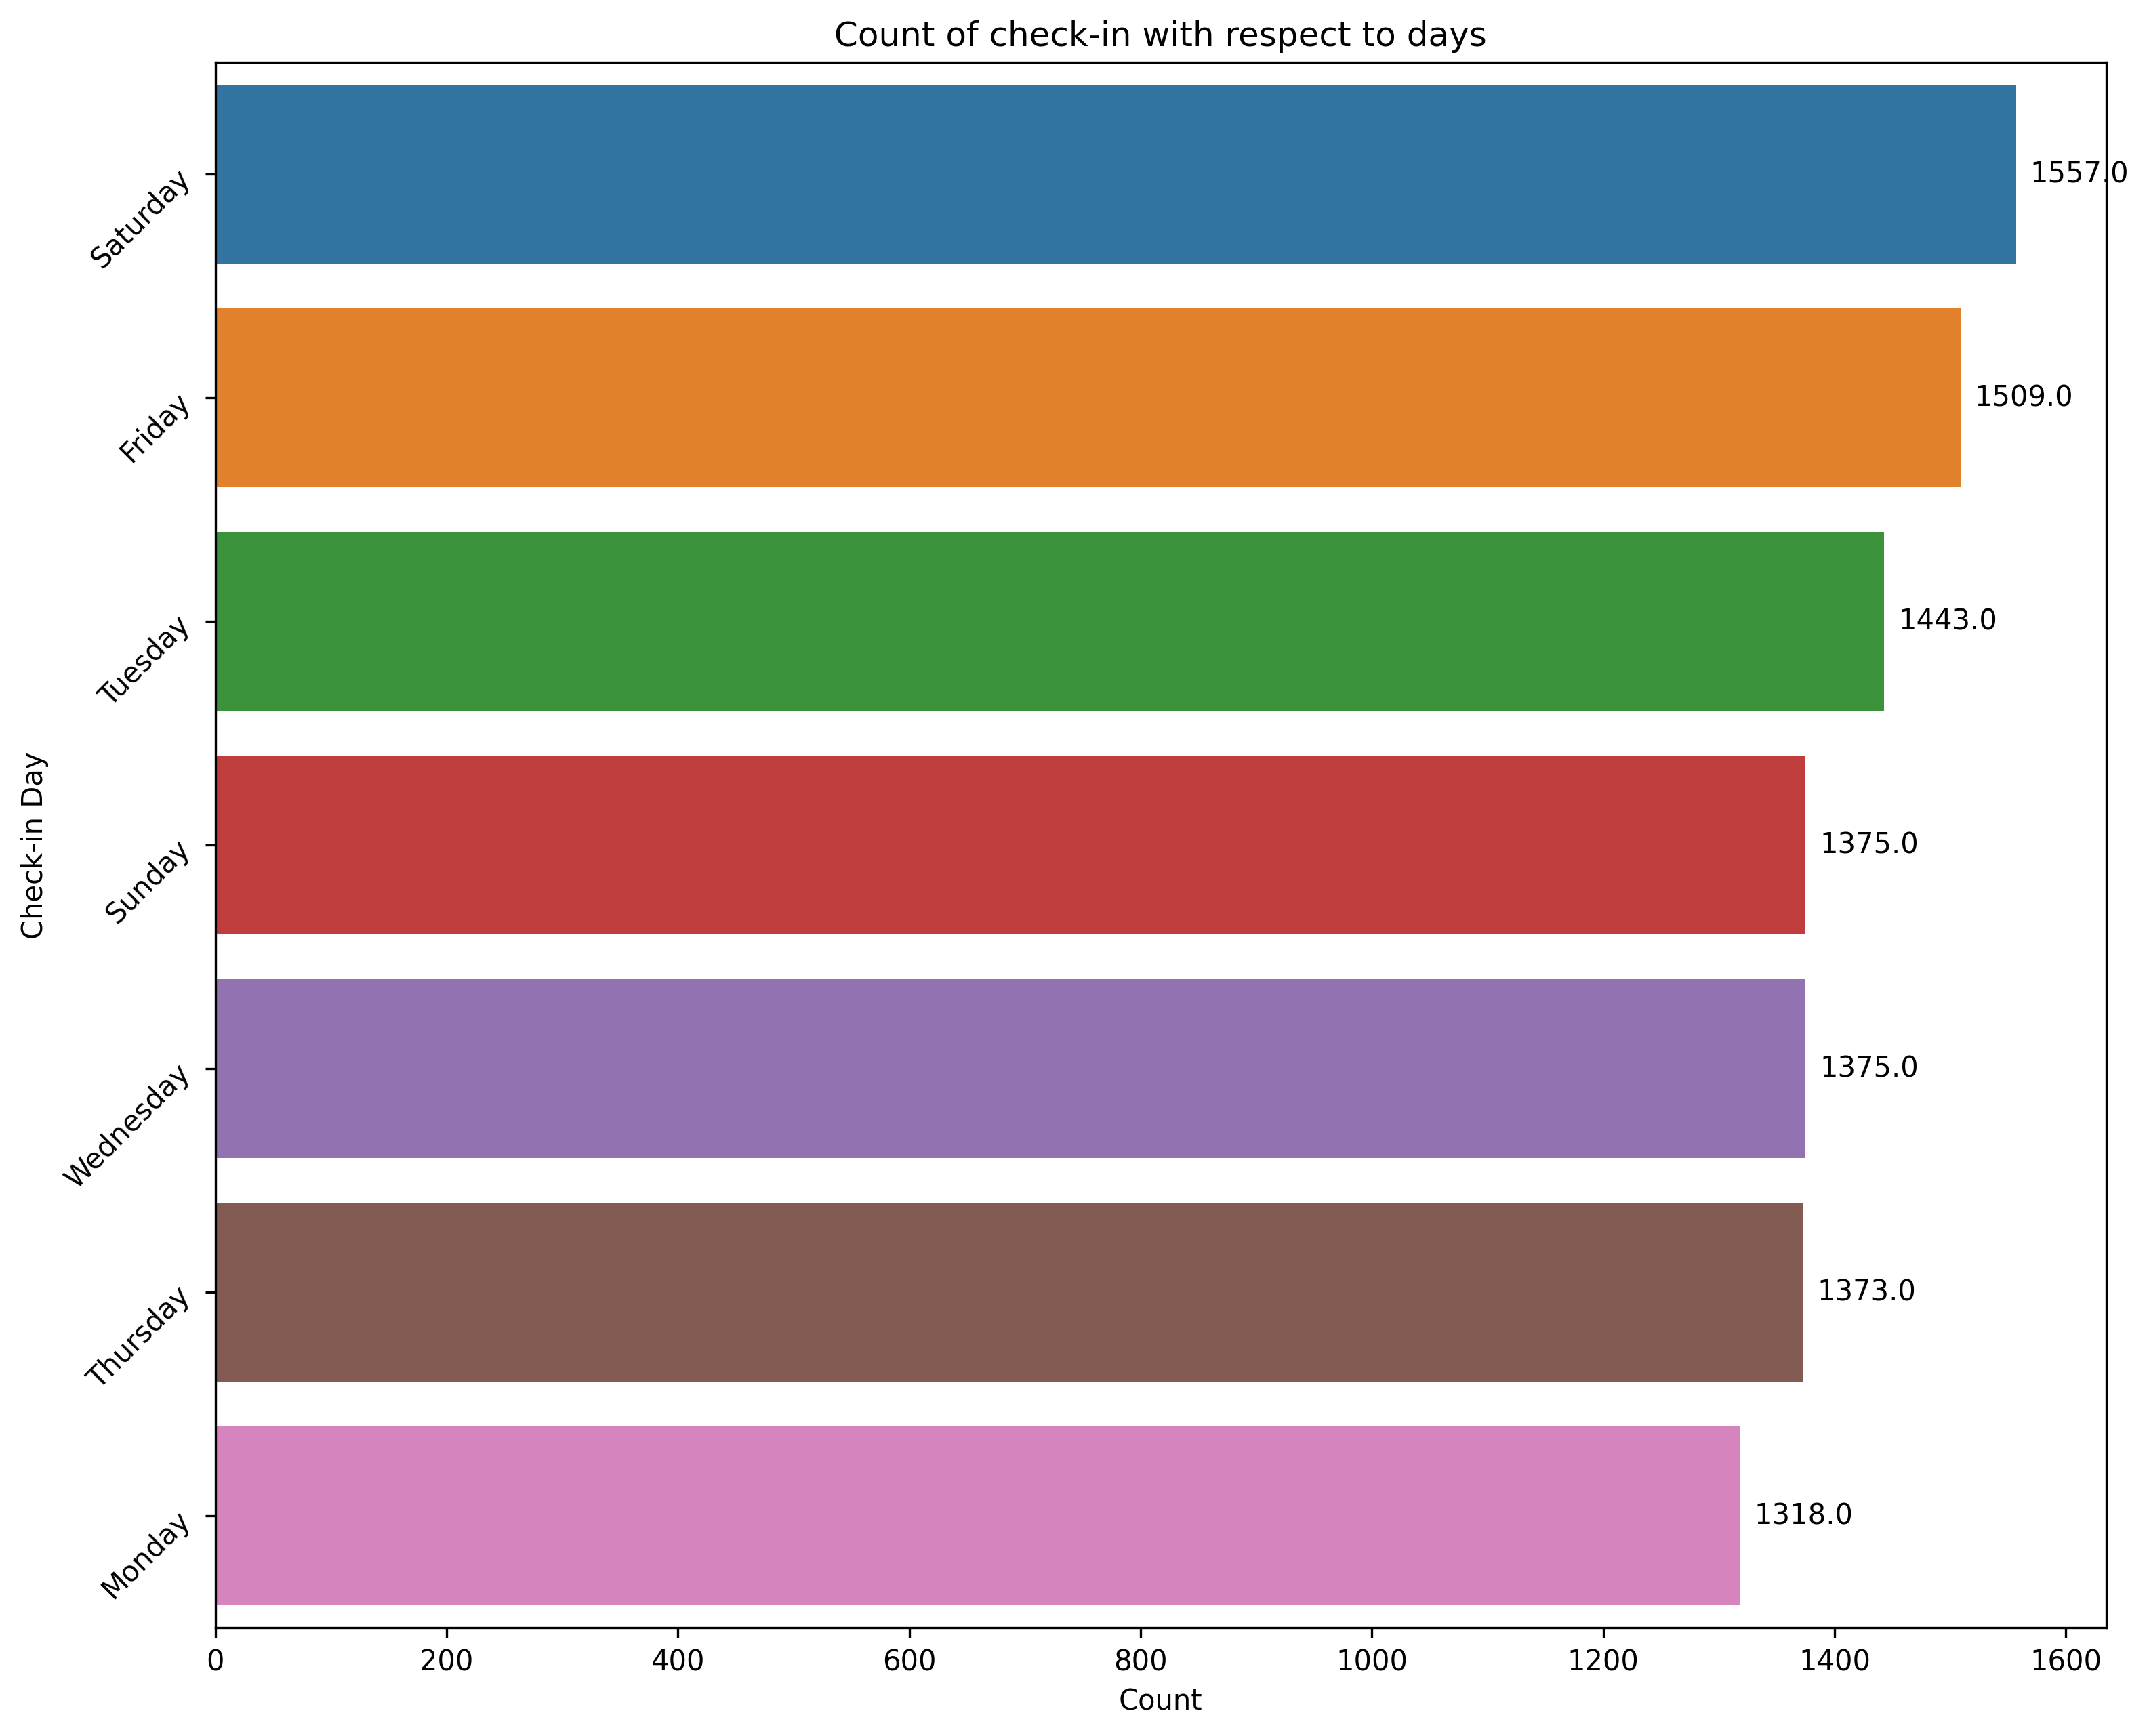

In [41]:

order = df['checkin_day'].value_counts().index

# Create the plot
plt.figure(figsize=(12, 10), dpi=300)
ax = sns.countplot(y='checkin_day', data=df, order=order)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

# Optionally, you can rotate the labels on y-axis for better readability
plt.yticks(rotation=45)

plt.title('Count of check-in with respect to days')
plt.xlabel('Count')
plt.ylabel('Check-in Day')
plt.show()


## Distribution of Bookings by Month and Day

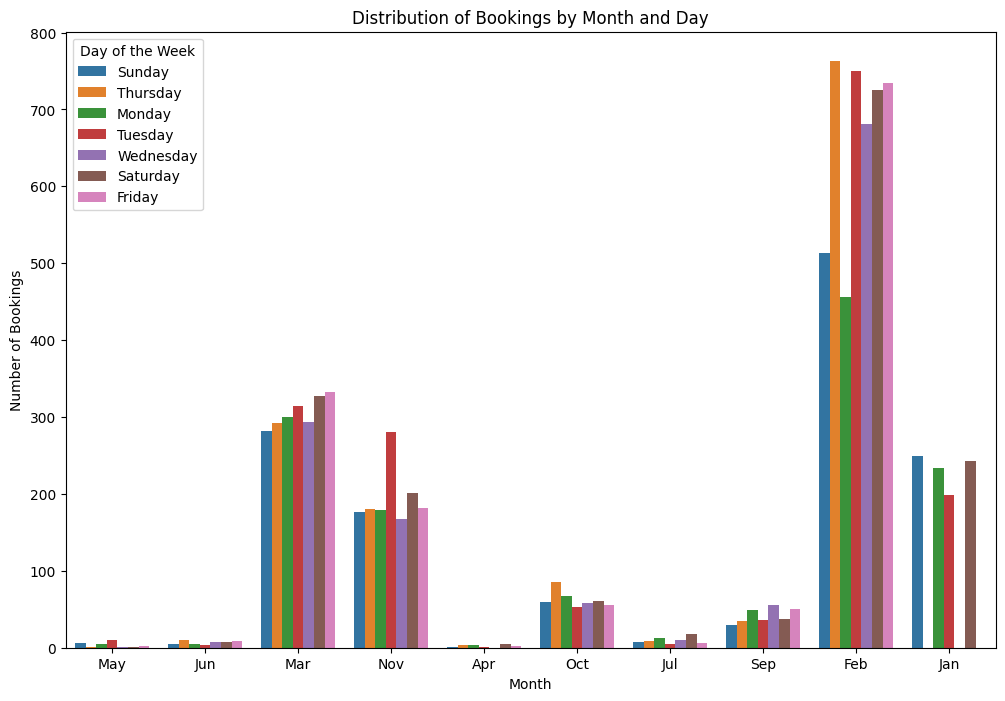

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.countplot(x='book_month', hue='book_day', data=df)
plt.title('Distribution of Bookings by Month and Day')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Day of the Week', loc='upper left')
plt.show()

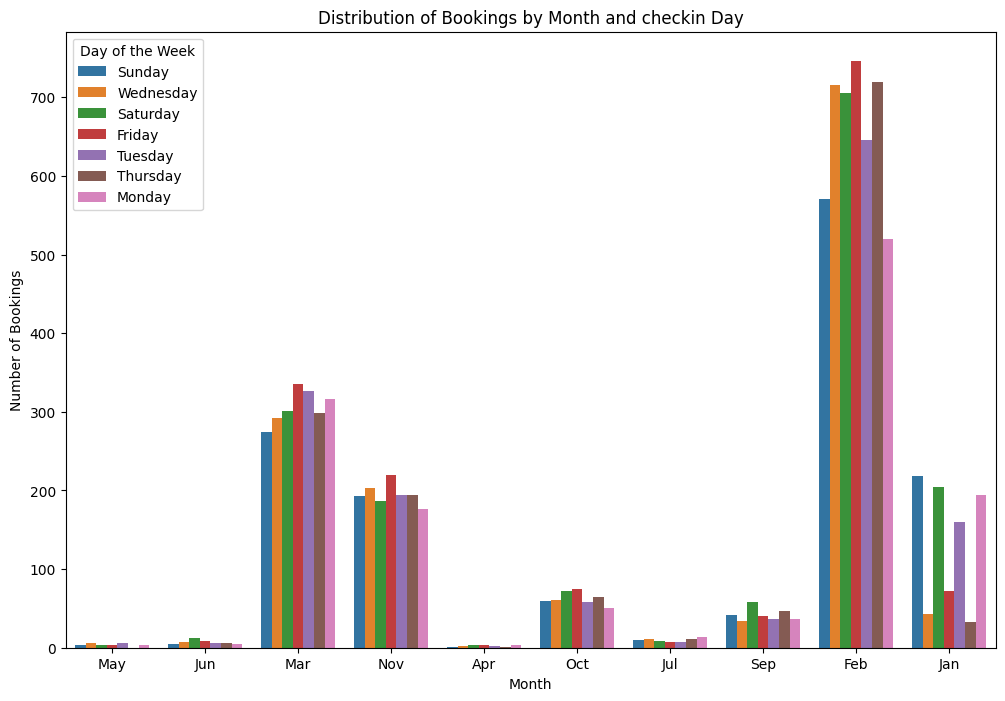

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.countplot(x='book_month', hue='checkin_day', data=df)
plt.title('Distribution of Bookings by Month and checkin Day')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Day of the Week', loc='upper left')
plt.show()

In [44]:
df.columns

Index(['hotel_brand', 'book_date', 'check_in', 'check_out', 'star_rating',
       'price', 'book_year', 'book_month', 'book_day', 'checkin_day',
       'duration_stay', 'price_per_day', 'hotel_id'],
      dtype='object')

In [45]:
df.groupby('book_month').size().index

Index(['Apr', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'], dtype='object', name='book_month')

## Distributions of Booking with respect to each month

In [113]:
import pandas as pd

data = {
    'book_month': list(df.groupby('book_month').size().sort_index().index),
    'bookings': list(df.groupby('book_month').size().sort_index().values)
}
d = pd.DataFrame(data)
print(d)

# Modify the bookings value for March
mar_index = d[d['book_month'] == 'Mar'].index[0]  # Get the index of the row for March
d.loc[mar_index, 'bookings'] = int(round(d.loc[mar_index, 'bookings'] / 2))  # Modify the value

print(d)


  book_month  bookings
0        Apr        15
1        Feb      4624
2        Jan       925
3        Jul        68
4        Jun        49
5        Mar      2143
6        May        26
7        Nov      1367
8        Oct       439
9        Sep       294
  book_month  bookings
0        Apr        15
1        Feb      4624
2        Jan       925
3        Jul        68
4        Jun        49
5        Mar      1072
6        May        26
7        Nov      1367
8        Oct       439
9        Sep       294


In [112]:
d[d['book_month']=='Mar']['bookings']

5    2143
Name: bookings, dtype: int64

<Figure size 1000x600 with 0 Axes>

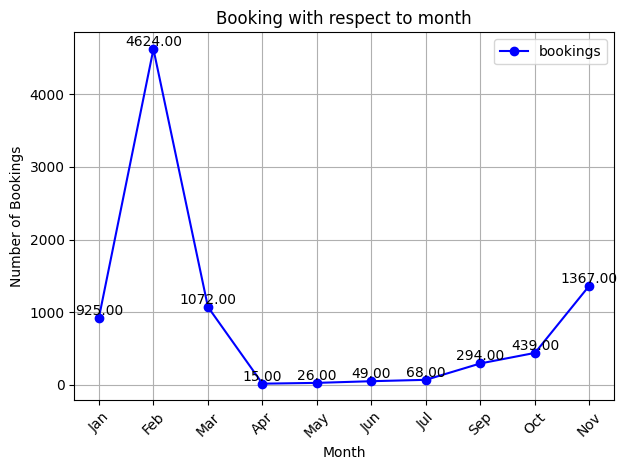

In [114]:
import calendar

# Sample DataFrame
data = {
    'book_month': list(df.groupby('book_month').size().sort_index().index),
    'bookings': list(df.groupby('book_month').size().sort_index().values)
}
d = pd.DataFrame(data)
# Modify the bookings value for March
mar_index = d[d['book_month'] == 'Mar'].index[0]  # Get the index of the row for March
d.loc[mar_index, 'bookings'] = int(round(d.loc[mar_index, 'bookings'] / 2))  # Modify the value

# Define a function to convert month abbreviations to numerical values
def month_to_num(month_abbr):
    return list(calendar.month_abbr).index(month_abbr)

# Sort the DataFrame by month abbreviations using the custom sorting order
d['month_num'] = d['book_month'].apply(month_to_num)
sorted_df = d.sort_values(by='month_num').drop(columns='month_num')
month_names = list(sorted_df['book_month'])
# Plot the booking trend over time
plt.figure(figsize=(10, 6))
sorted_df.plot(kind='line', x='book_month', y='bookings', marker='o', color='b')
plt.title('Booking with respect to month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(range(len(month_names)), month_names, rotation=45) 
# Annotate data points with their values
for i, booking in enumerate(sorted_df['bookings']):
    plt.text(i, booking, f'{booking:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


## price my month, weekend, weekdays,  hotel brand ,hotel id.

In [47]:
df.groupby('book_month')['price'].mean()

book_month
Apr    1253.634000
Feb     308.014356
Jan     318.962249
Jul     984.283676
Jun    1265.996531
Mar     268.815376
May    1125.210000
Nov     856.942121
Oct     953.570364
Sep     744.340102
Name: price, dtype: float64

In [48]:
df.groupby('book_month')['price_per_day'].mean()

book_month
Apr    375.444849
Feb    209.790643
Jan    218.228984
Jul    301.125736
Jun    418.667225
Mar    192.117059
May    380.235799
Nov    301.606584
Oct    316.385034
Sep    281.494090
Name: price_per_day, dtype: float64

## Distribution of prices of hotels with respect month

<Figure size 1000x800 with 0 Axes>

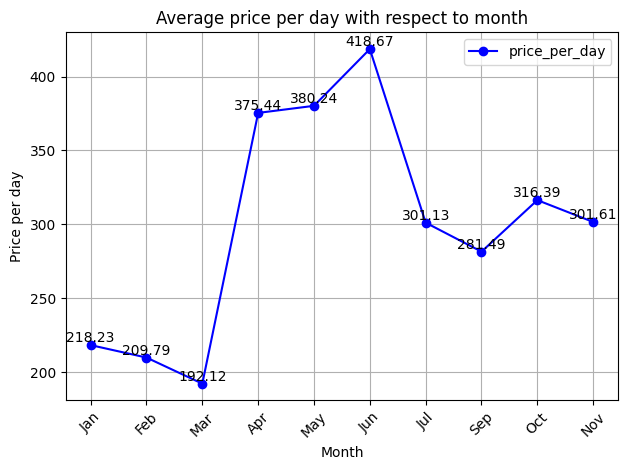

In [49]:
# Sample DataFrame
data = {
    'book_month': list(df.groupby('book_month')['price_per_day'].mean().sort_index().index),
    'price_per_day': list(df.groupby('book_month')['price_per_day'].mean().sort_index().values)
}
d = pd.DataFrame(data)

# Define a function to convert month abbreviations to numerical values
def month_to_num(month_abbr):
    return list(calendar.month_abbr).index(month_abbr)

# Sort the DataFrame by month abbreviations using the custom sorting order
d['month_num'] = d['book_month'].apply(month_to_num)
sorted_df = d.sort_values(by='month_num').drop(columns='month_num')
month_names = list(sorted_df['book_month'])
# Plot the booking trend over time
plt.figure(figsize=(10,8))
sorted_df.plot(kind='line', x='book_month', y='price_per_day', marker='o', color='b')
plt.title('Average price per day with respect to month')
plt.xlabel('Month')
plt.ylabel('Price per day')
plt.grid(True)
plt.xticks(range(len(month_names)), month_names, rotation=45) 
# Annotate data points with their values
for i, price in enumerate(sorted_df['price_per_day']):
    plt.text(i, price, f'{price:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [50]:
sorted_df.columns

Index(['book_month', 'price_per_day'], dtype='object')

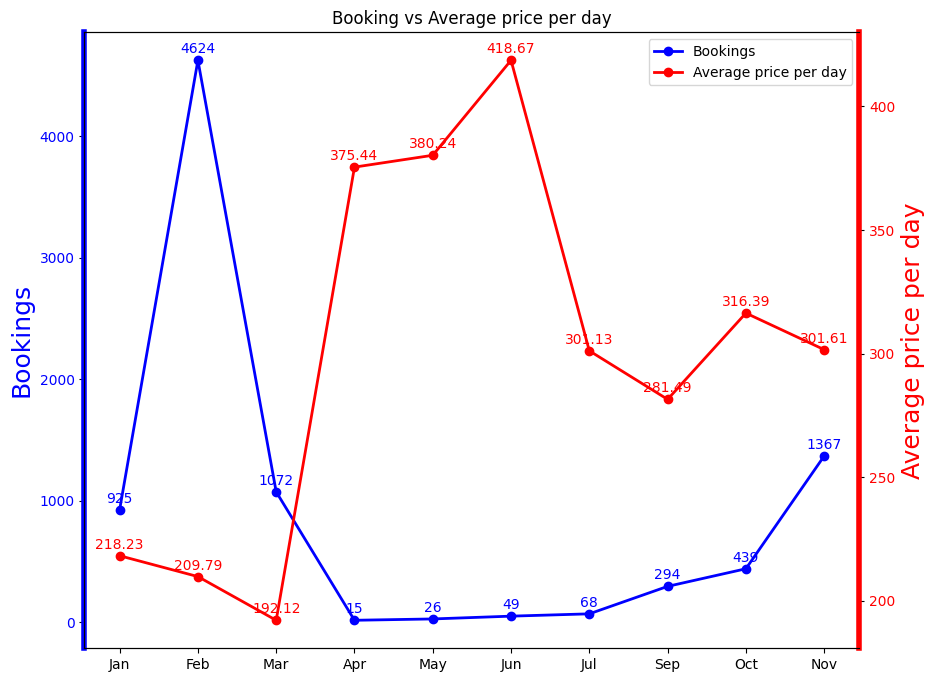

In [116]:
# Sample DataFrame for bookings
data_bookings = {
    'book_month': list(df.groupby('book_month').size().sort_index().index),
    'bookings': list(df.groupby('book_month').size().sort_index().values)
}
df1 = pd.DataFrame(data_bookings)
# Modify the bookings value for March
mar_index = df1[df1['book_month'] == 'Mar'].index[0]  # Get the index of the row for March
df1.loc[mar_index, 'bookings'] = int(round(df1.loc[mar_index, 'bookings'] / 2))  # Modify the value
# Sample DataFrame for prices per day
data_prices = {
    'book_month': list(df.groupby('book_month')['price_per_day'].mean().sort_index().index),
    'price_per_day': list(df.groupby('book_month')['price_per_day'].mean().sort_index().values)
}
df2 = pd.DataFrame(data_prices)

# Define a function to convert month abbreviations to numerical values
def month_to_num(month_abbr):
    return list(calendar.month_abbr).index(month_abbr)

# Sort the DataFrames by month abbreviations using the custom sorting order
df1['month_num'] = df1['book_month'].apply(month_to_num)
sorted_df1 = df1.sort_values(by='month_num').drop(columns='month_num')
df2['month_num'] = df2['book_month'].apply(month_to_num)
sorted_df2 = df2.sort_values(by='month_num').drop(columns='month_num')
month_names = list(sorted_df1['book_month'])

# Plot the booking trend over time
fig, ax1 = plt.subplots(figsize=(10, 8))  
ax1.plot(sorted_df1['book_month'], sorted_df1['bookings'], lw=2, color='blue', marker='o', label='Bookings')
ax1.set_ylabel("Bookings", fontsize=18, color='blue')
ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(4)
for label in ax1.get_yticklabels():
    label.set_color('blue')

# Annotate data points for bookings (in blue)
for i, bookings in enumerate(sorted_df1['bookings']):
    ax1.annotate(f'{bookings}', (sorted_df1['book_month'].iloc[i], bookings), textcoords="offset points", xytext=(0, 5), ha='center', color='blue')

# Plot the price per day trend over time
ax2 = ax1.twinx()
ax2.plot(sorted_df2['book_month'], sorted_df2['price_per_day'], lw=2, color="red", marker='o', label='Average price per day')
ax2.set_ylabel("Average price per day", fontsize=18, color='red')
ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(4)
for label in ax2.get_yticklabels():
    label.set_color('red')

# Annotate data points for price per day (in red)
for i, price_per_day in enumerate(sorted_df2['price_per_day']):
    ax2.annotate(f'{price_per_day:.2f}', (sorted_df2['book_month'].iloc[i], price_per_day), textcoords="offset points", xytext=(0, 5), ha='center', color='red')

# Combine legends for both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Set title and show plot
plt.title('Booking vs Average price per day')
plt.show()


In [52]:
df.columns

Index(['hotel_brand', 'book_date', 'check_in', 'check_out', 'star_rating',
       'price', 'book_year', 'book_month', 'book_day', 'checkin_day',
       'duration_stay', 'price_per_day', 'hotel_id'],
      dtype='object')

In [53]:
df['book_day'].unique()

array(['Sunday', 'Thursday', 'Monday', 'Tuesday', 'Wednesday', 'Saturday',
       'Friday'], dtype=object)

In [54]:
len(df[(df['book_day'] == "Saturday") | (df['book_day'] == 'Sunday')])

2957

## Distribution of sales with respect week and weekend

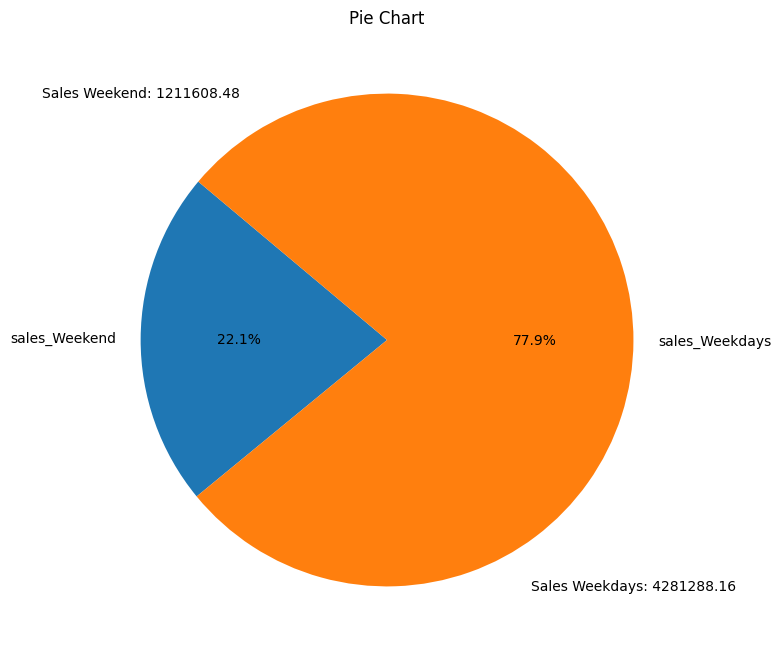

In [55]:
sales_weekend = df[(df['book_day'] == "Saturday") | (df['book_day'] == 'Sunday')]['price'].sum()
sales_weekdays = df[(df['book_day'] != "Saturday") | (df['book_day'] != 'Sunday')]['price'].sum()
# Data for the pie chart
sizes = [sales_weekend, sales_weekdays]  # List of sizes (values) for each pie slice
labels = ['sales_Weekend', 'sales_Weekdays']  # List of labels for each pie slice

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# Add text annotation mentioning sales on the graph
plt.text(-1, 1, f'Sales Weekend: {sales_weekend}', horizontalalignment='center', verticalalignment='center')
plt.text(1, -1, f'Sales Weekdays: {sales_weekdays}', horizontalalignment='center', verticalalignment='center')

plt.title('Pie Chart')
plt.show()

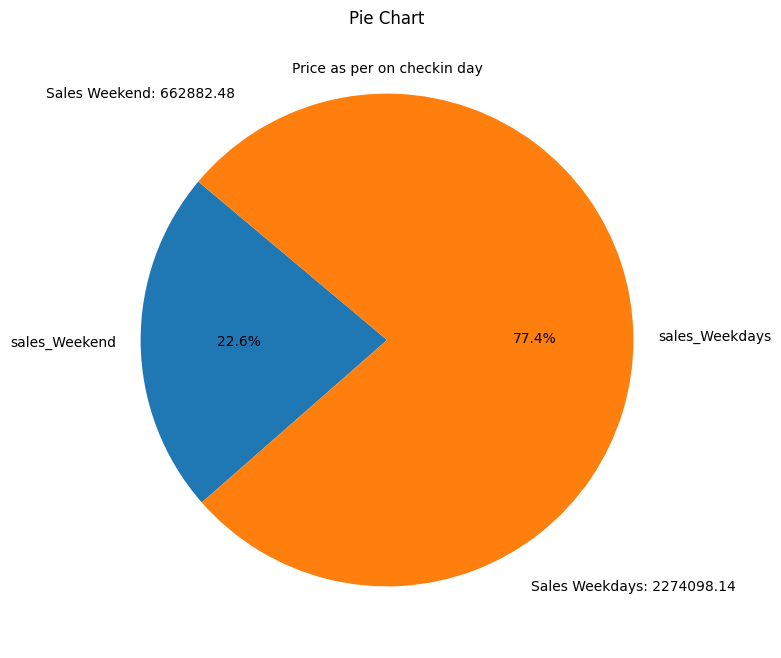

In [97]:
sales_weekend = df[(df['checkin_day'] == "Saturday") | (df['checkin_day'] == 'Sunday')]['price_per_day'].sum()
sales_weekdays = df[(df['checkin_day'] != "Saturday") | (df['checkin_day'] != 'Sunday')]['price_per_day'].sum()
# Data for the pie chart
sizes = [sales_weekend, sales_weekdays]  # List of sizes (values) for each pie slice
labels = ['sales_Weekend', 'sales_Weekdays']  # List of labels for each pie slice

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# Add text annotation mentioning sales on the graph
plt.text(-1, 1, f'Sales Weekend: {sales_weekend:.2f}', horizontalalignment='center', verticalalignment='center')
plt.text(1, -1, f'Sales Weekdays: {sales_weekdays:.2f}', horizontalalignment='center', verticalalignment='center')

plt.text(0, 1.1, f'Price as per on checkin day', horizontalalignment='center', verticalalignment='center')

plt.title('Pie Chart')
plt.show()

## Distribution of prices with respect to hotel brand

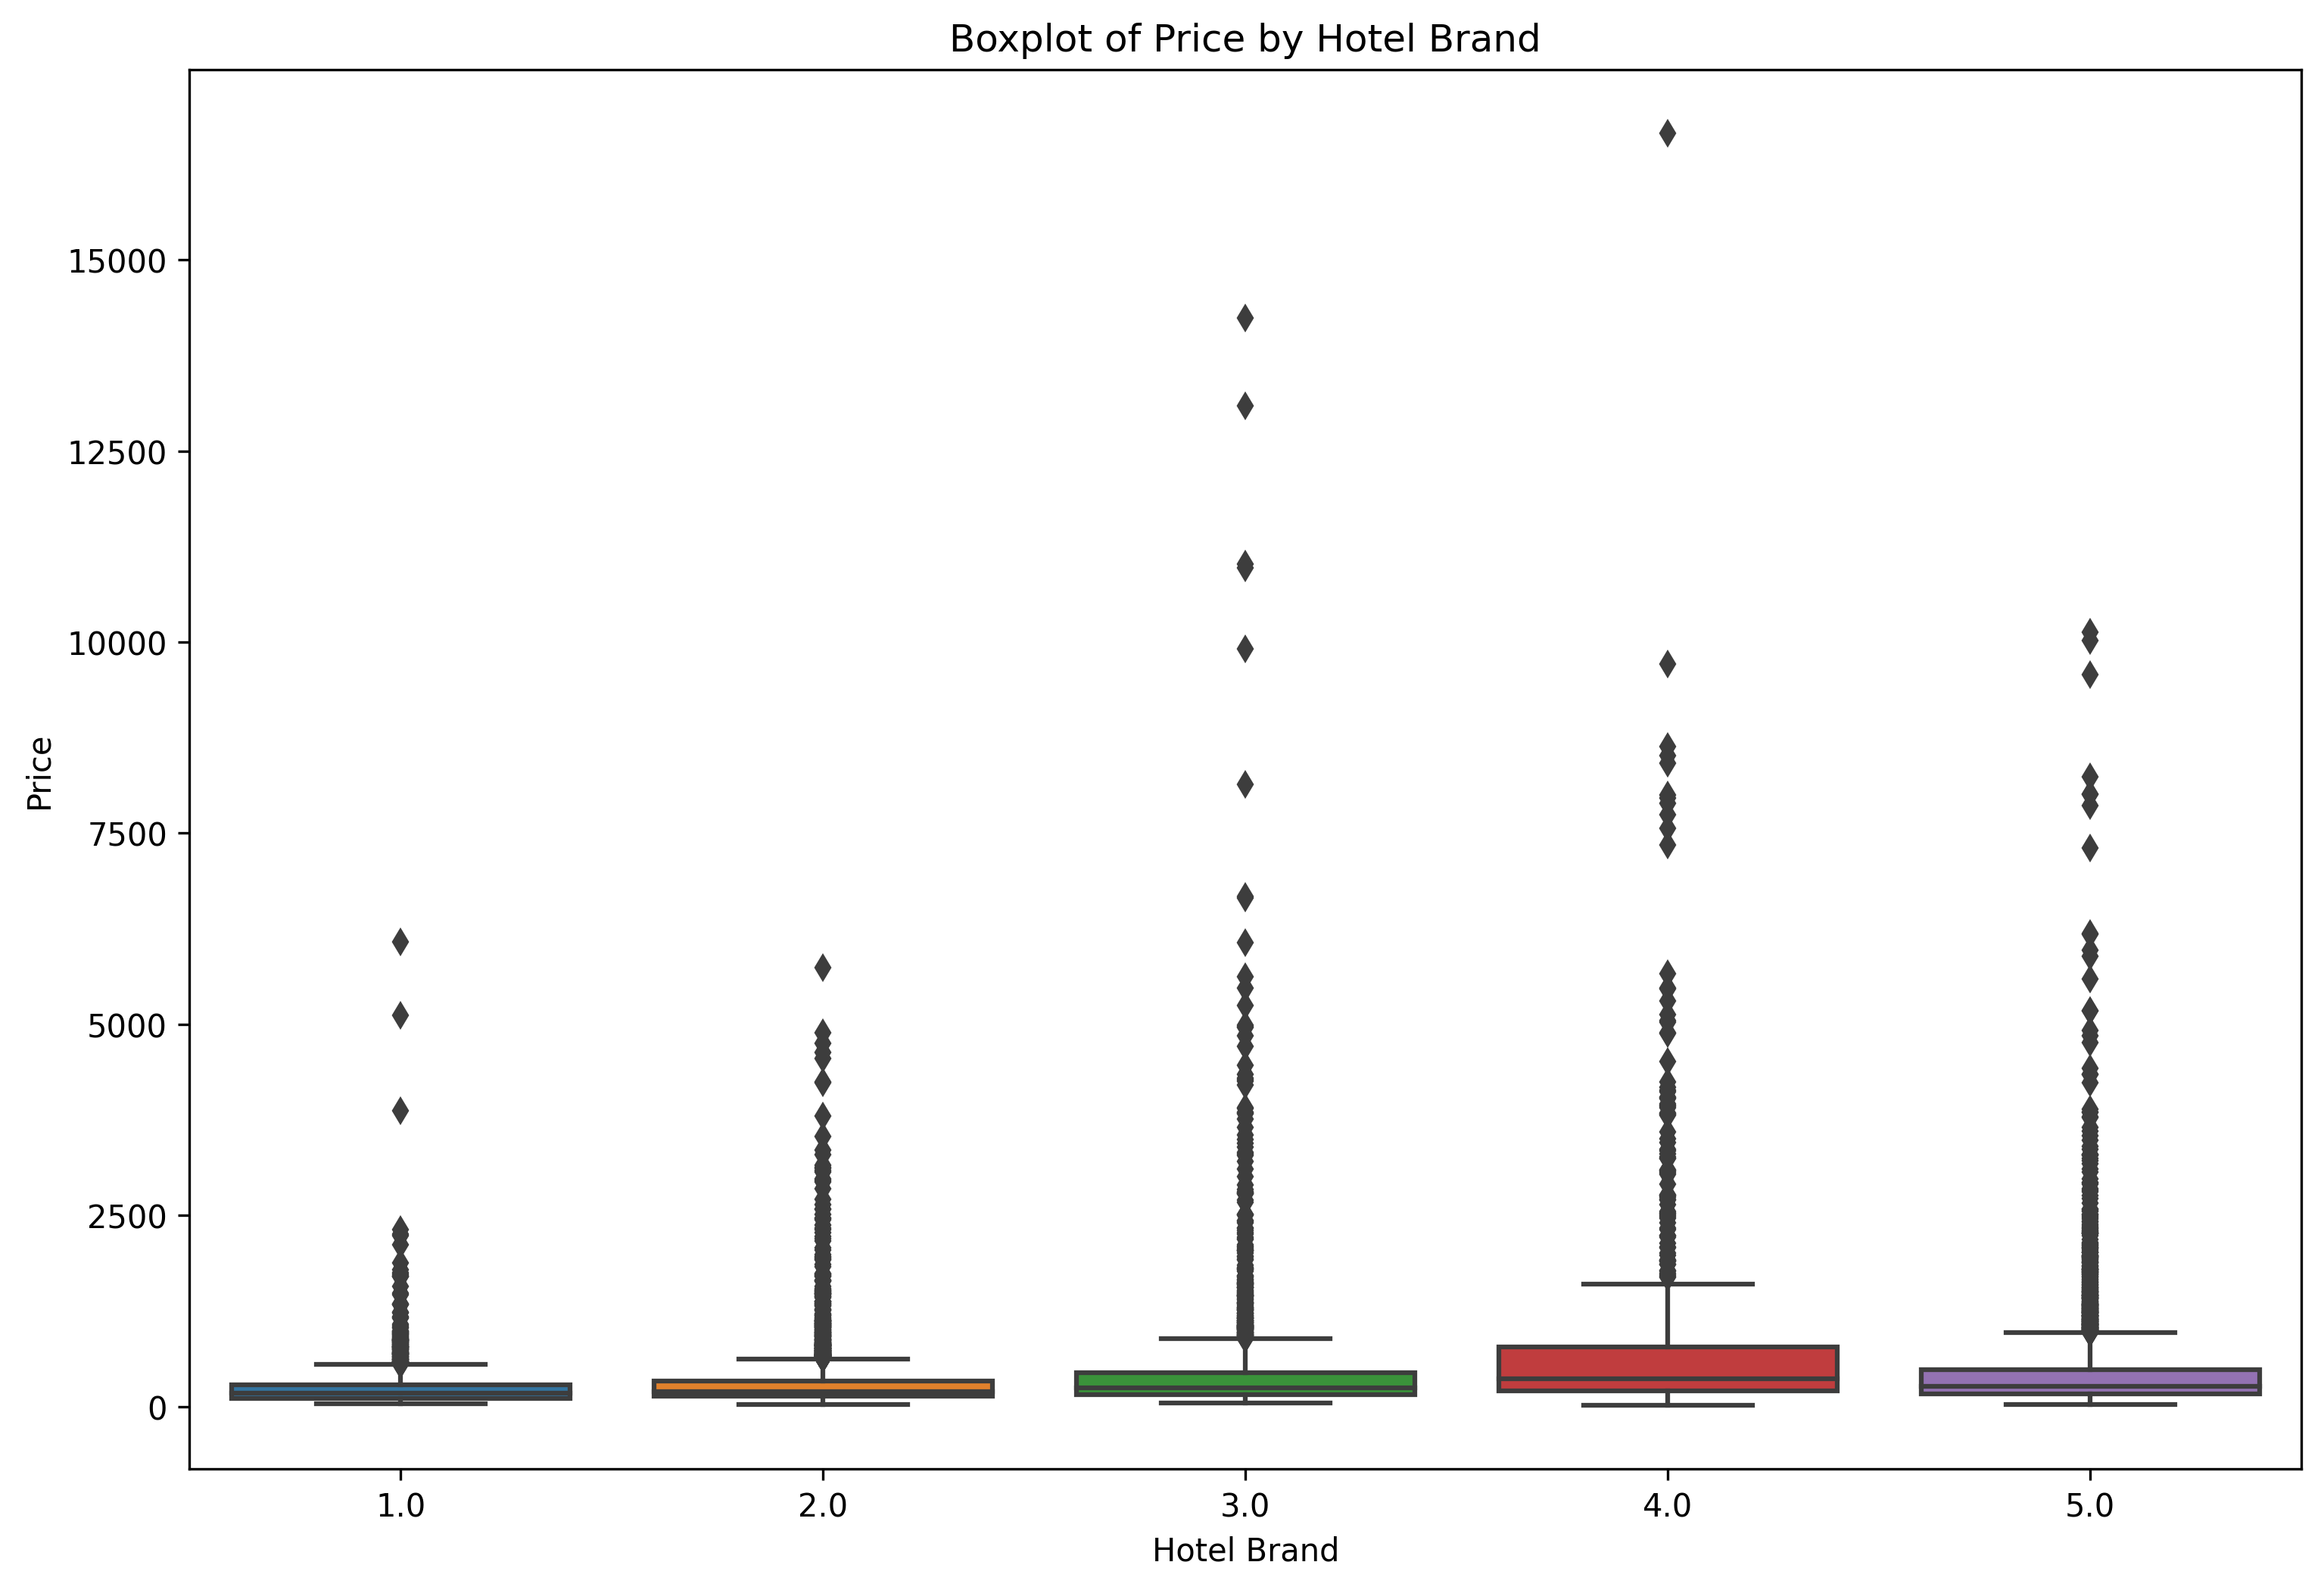

In [57]:
plt.figure(figsize=(12,8), dpi=300)
sns.boxplot(x='hotel_brand', y='price', data=df)

plt.title('Boxplot of Price by Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Price')

plt.show()


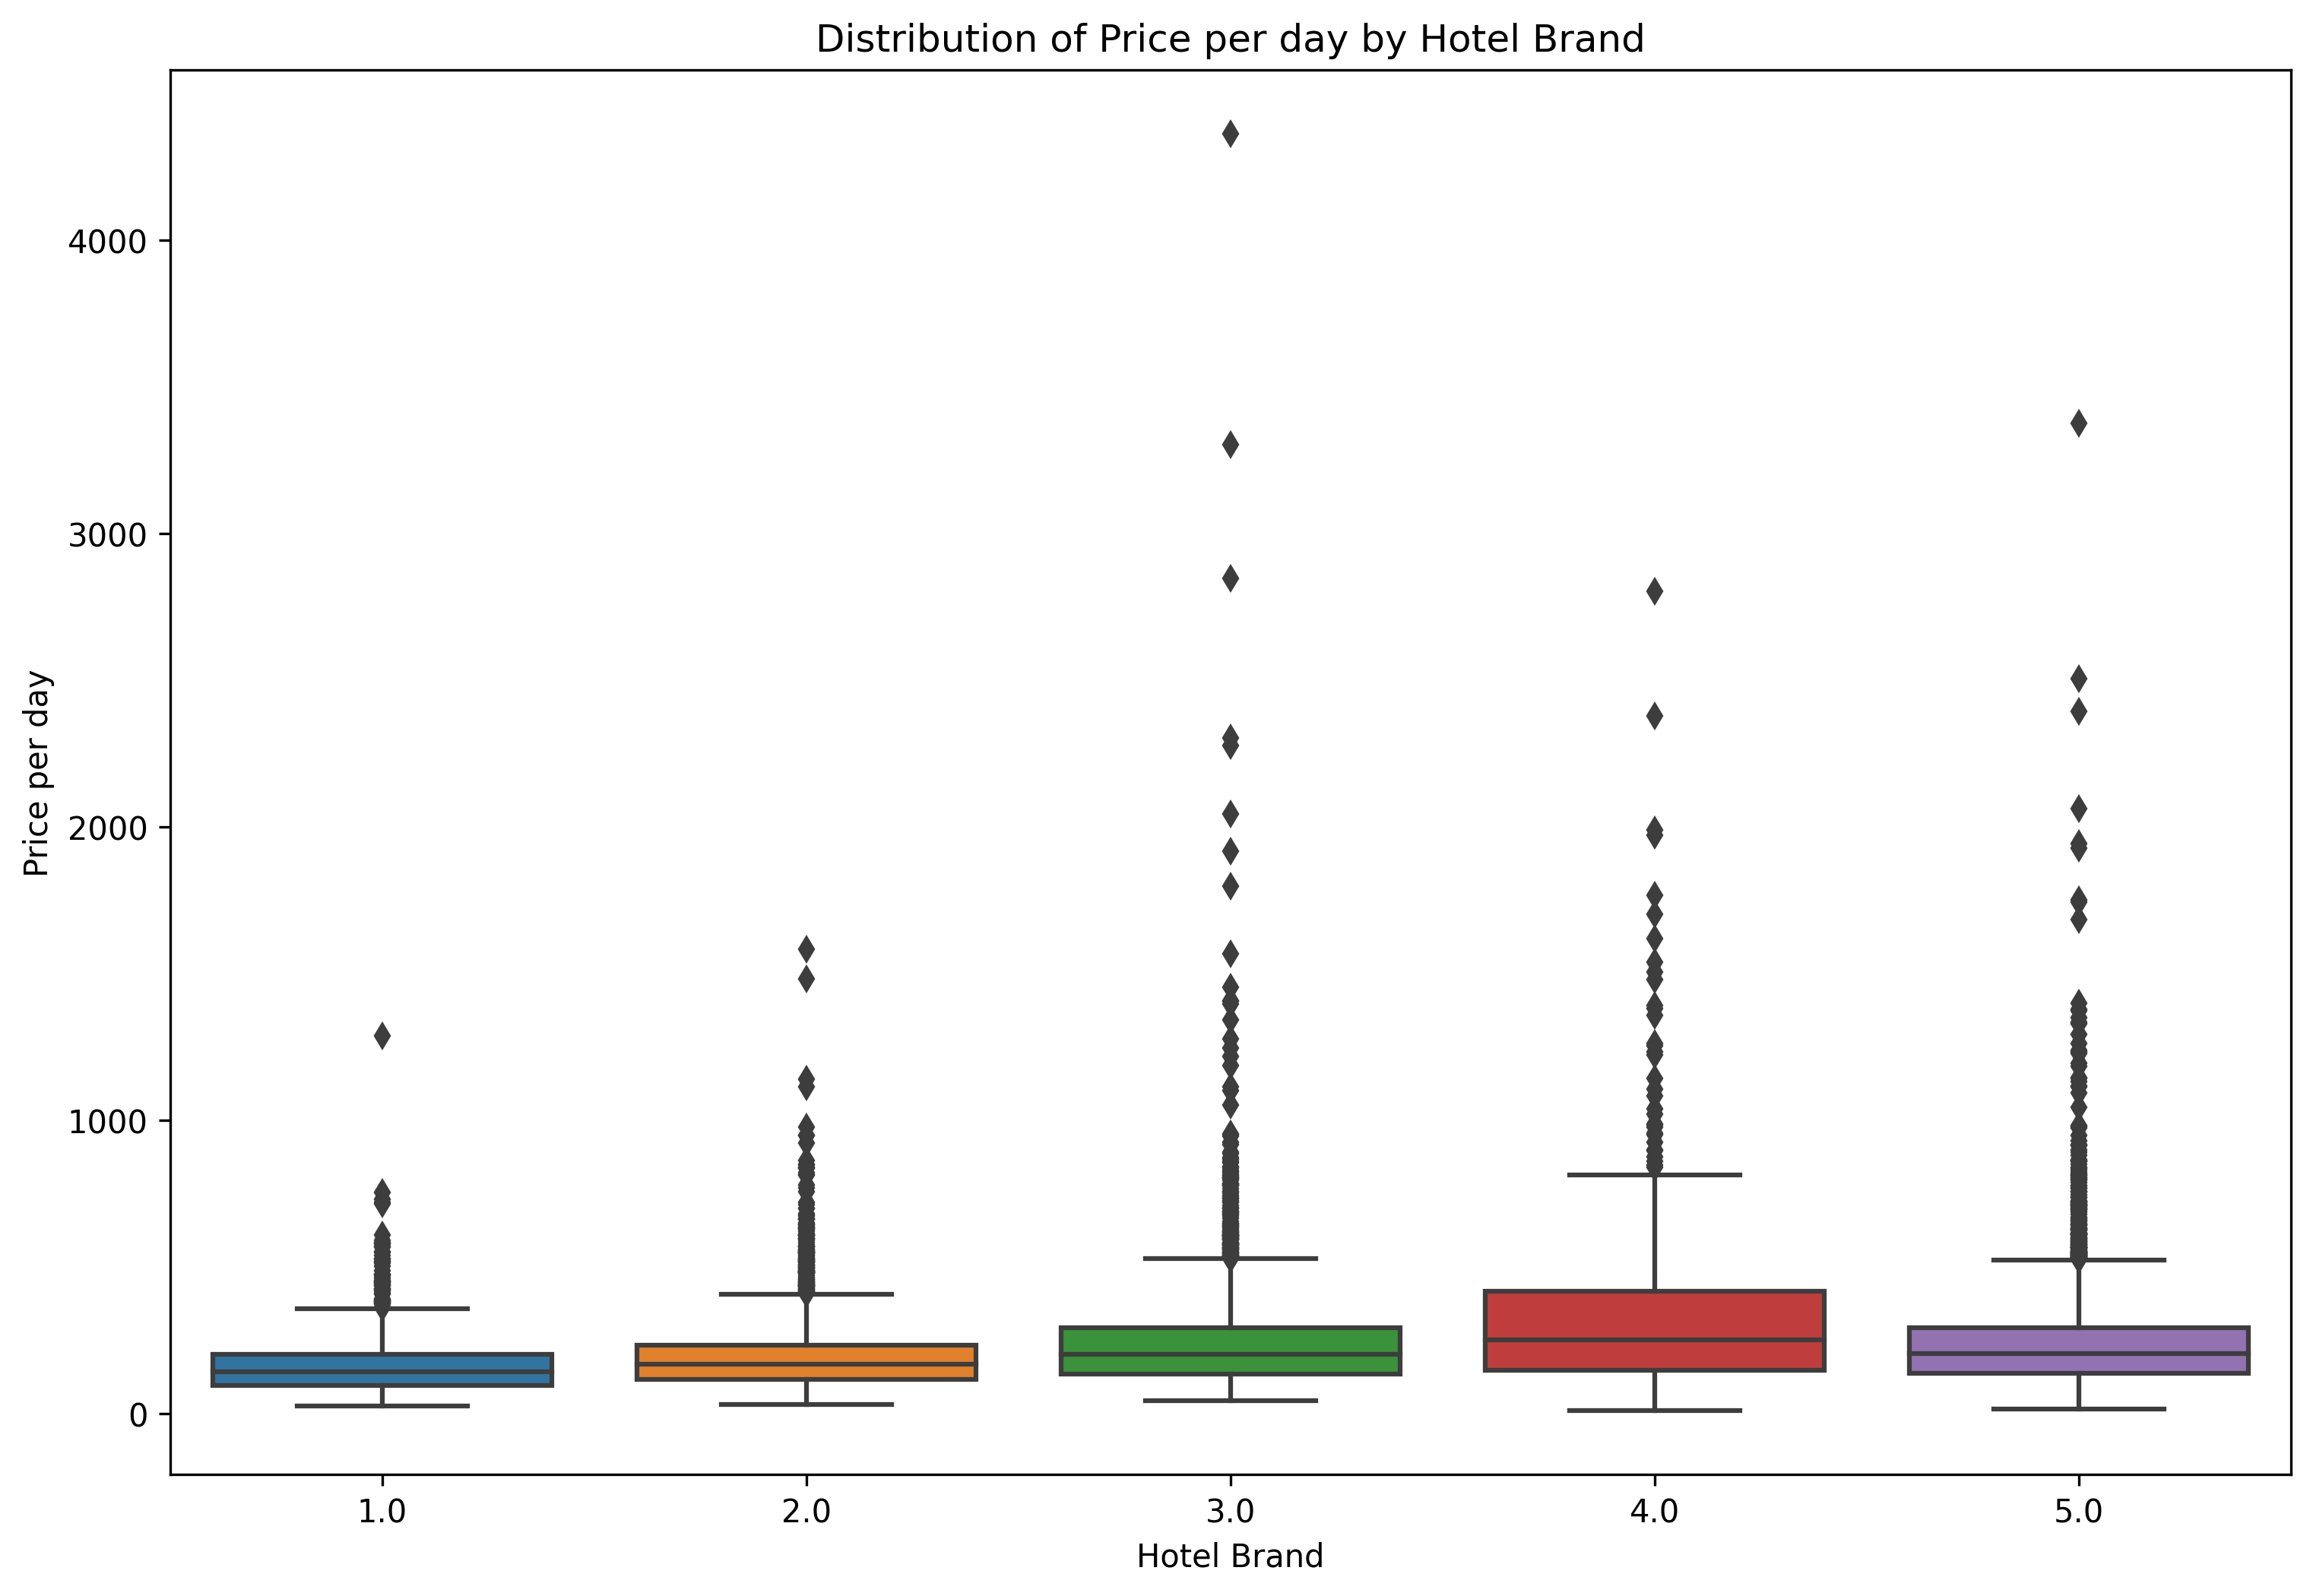

In [58]:
plt.figure(figsize=(12,8), dpi=300)
sns.boxplot(x='hotel_brand', y='price_per_day', data=df)

plt.title('Distribution of Price per day by Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Price per day')

plt.show()


In [59]:
df[df['hotel_brand'] == 5.0]['price_per_day'].describe()

count    3146.000000
mean      245.618150
std       192.516931
min        14.740000
25%       137.621250
50%       205.407500
75%       292.315000
max      3376.833333
Name: price_per_day, dtype: float64

#### Here the max = 3376.83 but the 75% of the prices of 5.0 hotel brand are around 292 so during some occassion the prices increases, so lets try to find out those

In [60]:
df[(df['hotel_brand'] == 5.0) & (df['price_per_day'] >= df[df['hotel_brand'] == 5.0]['price_per_day'].describe()['75%'])].sort_values('price_per_day',ascending = False)[['price_per_day','book_date','check_in', 'check_out','star_rating','checkin_day']].head(10)



,price_per_day,book_date,check_in,check_out,star_rating,checkin_day
2809,3376.833333,2022-06-11,2023-02-05,2023-02-08,3.5,Sunday
338,2504.947500,2022-10-10,2023-01-26,2023-01-30,3.5,Thursday
3252,2394.840000,2022-11-12,2023-02-07,2023-02-11,3.5,Tuesday
1111,2062.603333,2022-05-30,2023-01-25,2023-01-28,3.5,Wednesday
1122,1943.800000,2022-11-13,2023-01-25,2023-01-26,4.0,Wednesday
5299,1927.250000,2023-02-01,2023-02-21,2023-02-23,3.5,Tuesday
1143,1751.770000,2022-09-28,2023-01-25,2023-01-26,3.5,Wednesday
9515,1743.670000,2023-03-03,2023-03-07,2023-03-08,3.5,Tuesday
9305,1684.325000,2023-02-10,2023-03-06,2023-03-08,3.5,Monday
79,1398.652500,2022-11-03,2023-01-18,2023-01-22,2.5,Wednesday


In [61]:
df[df['hotel_brand'] == 4.0]['price'].mean()

883.5430697674419

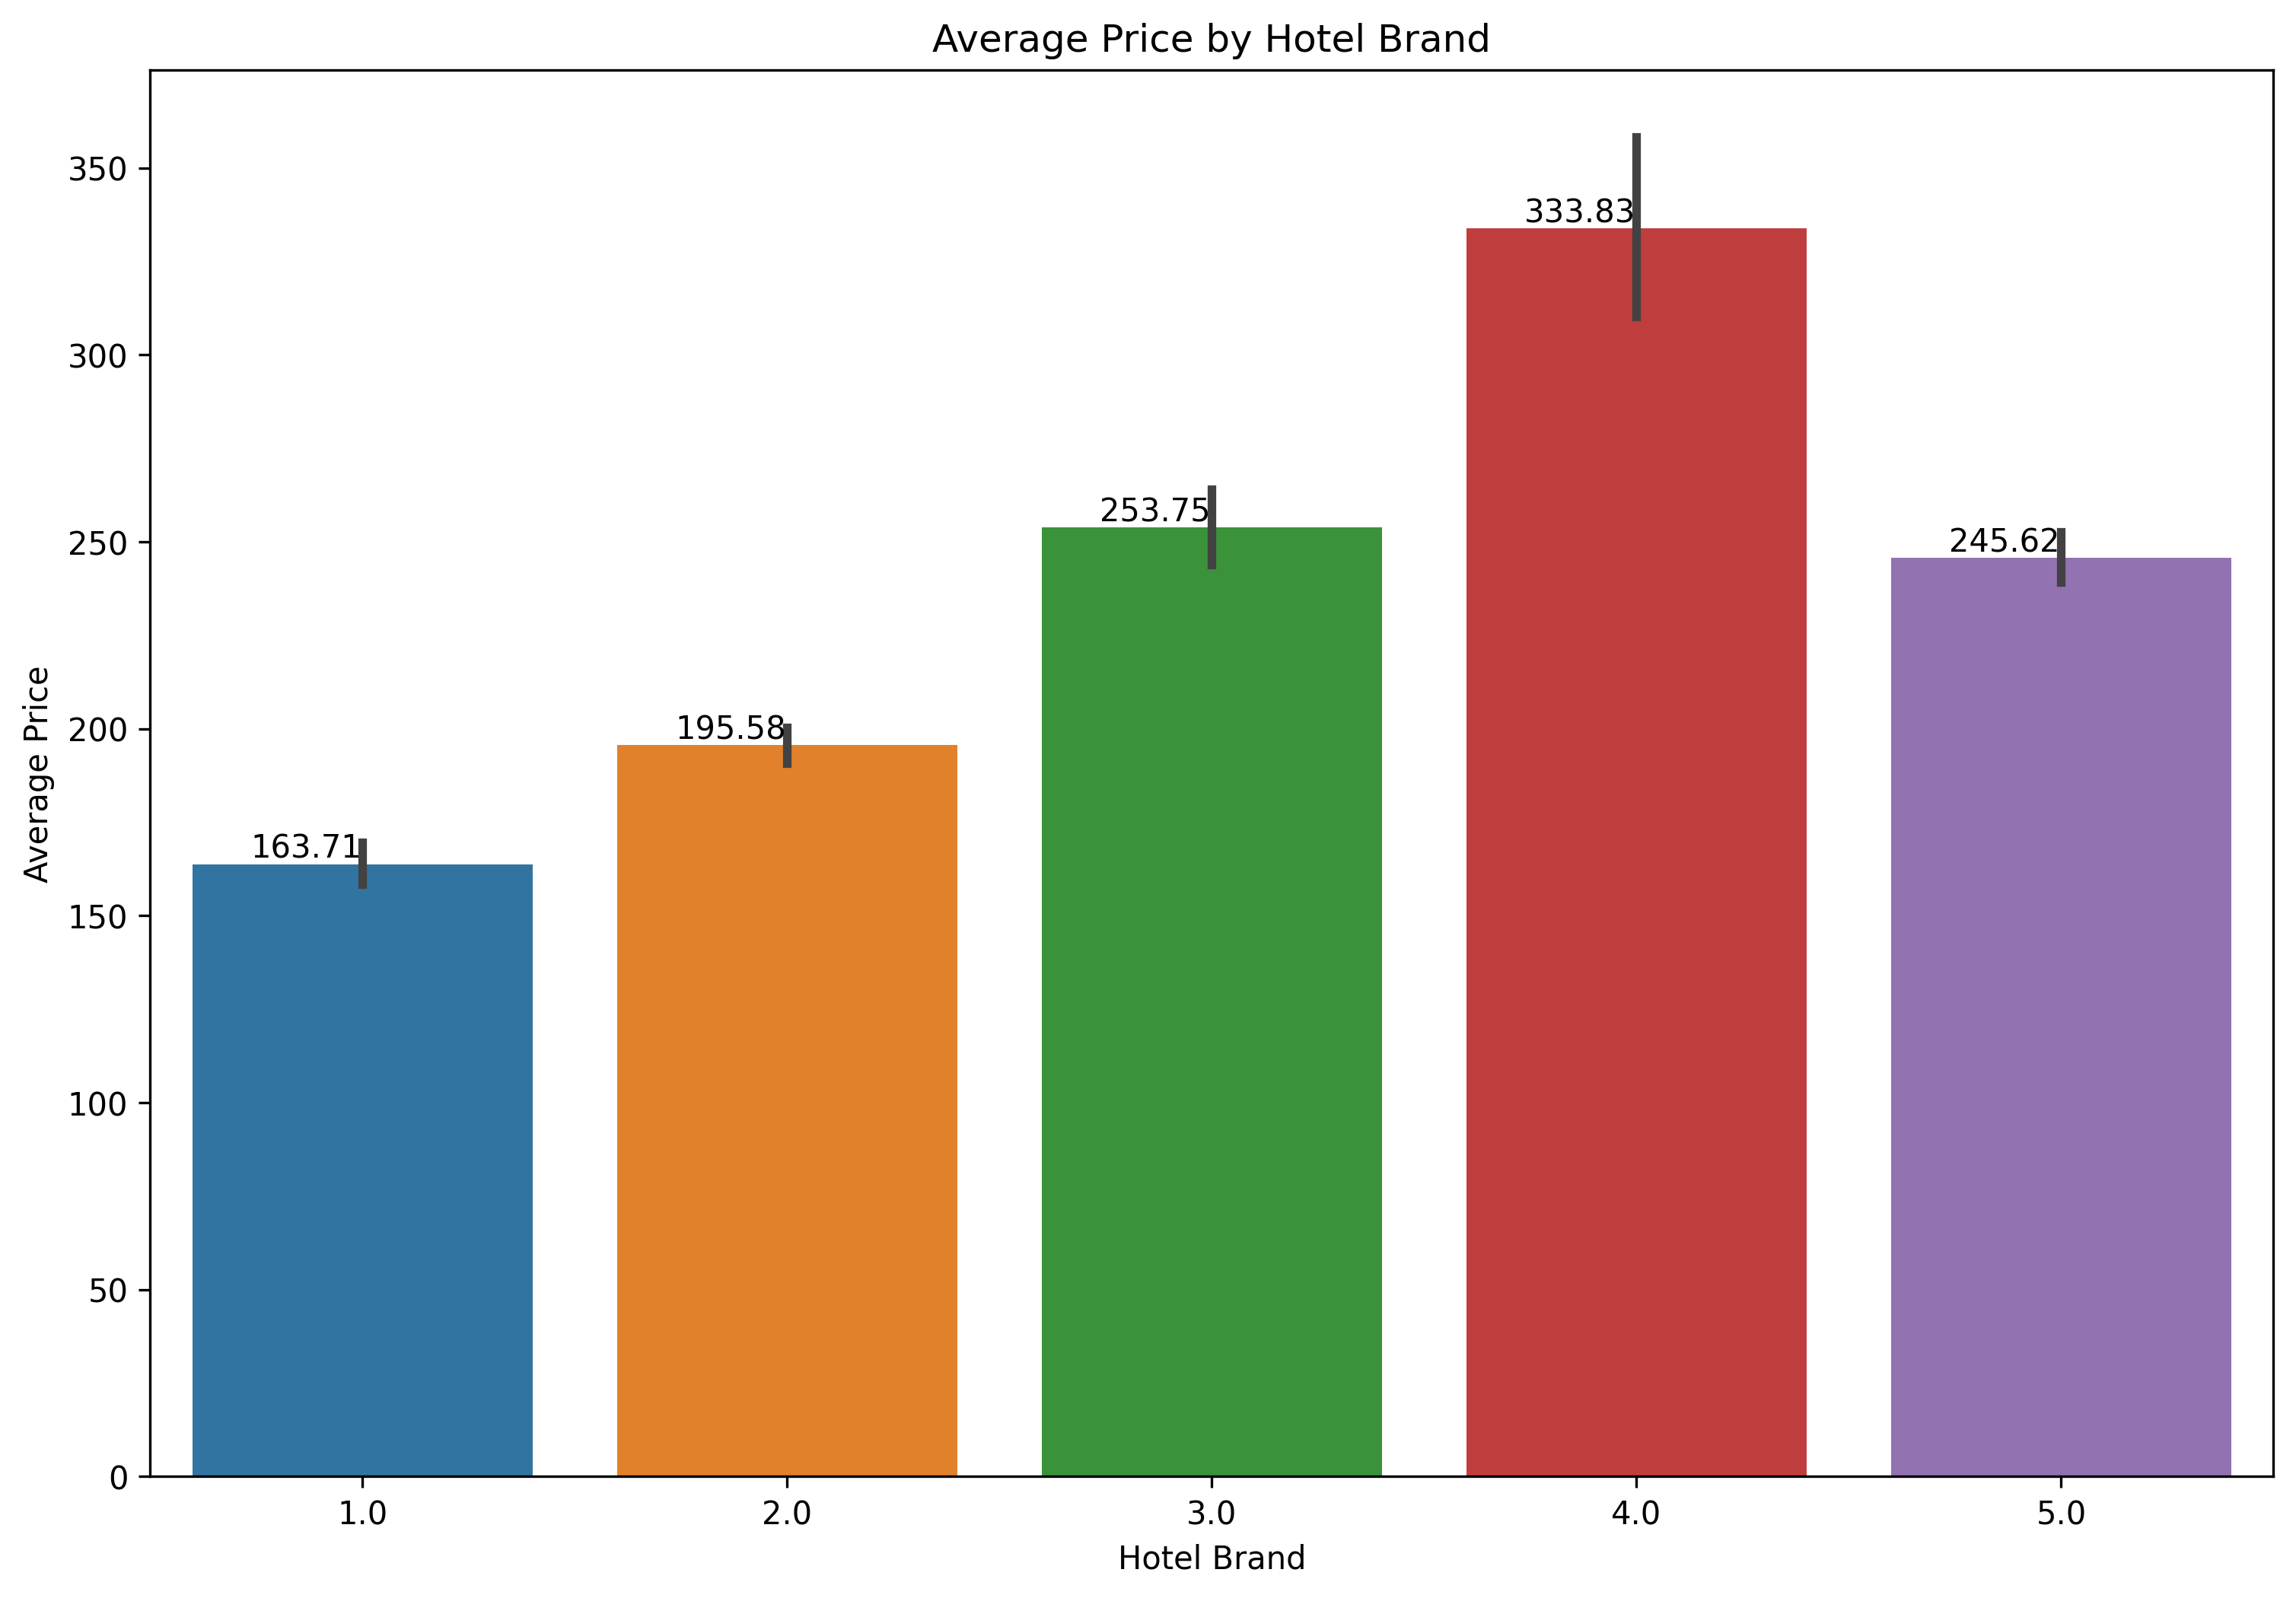

In [62]:

plt.figure(figsize=(12, 8), dpi=300)
ax = sns.barplot(x='hotel_brand', y='price_per_day', data=df, estimator=np.mean)

# Adding data labels on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 3., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=10)

plt.title('Average Price by Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Average Price')
plt.show()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_45304\1012128079.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df.groupby('hotel_brand')['price'].sum().iteritems():


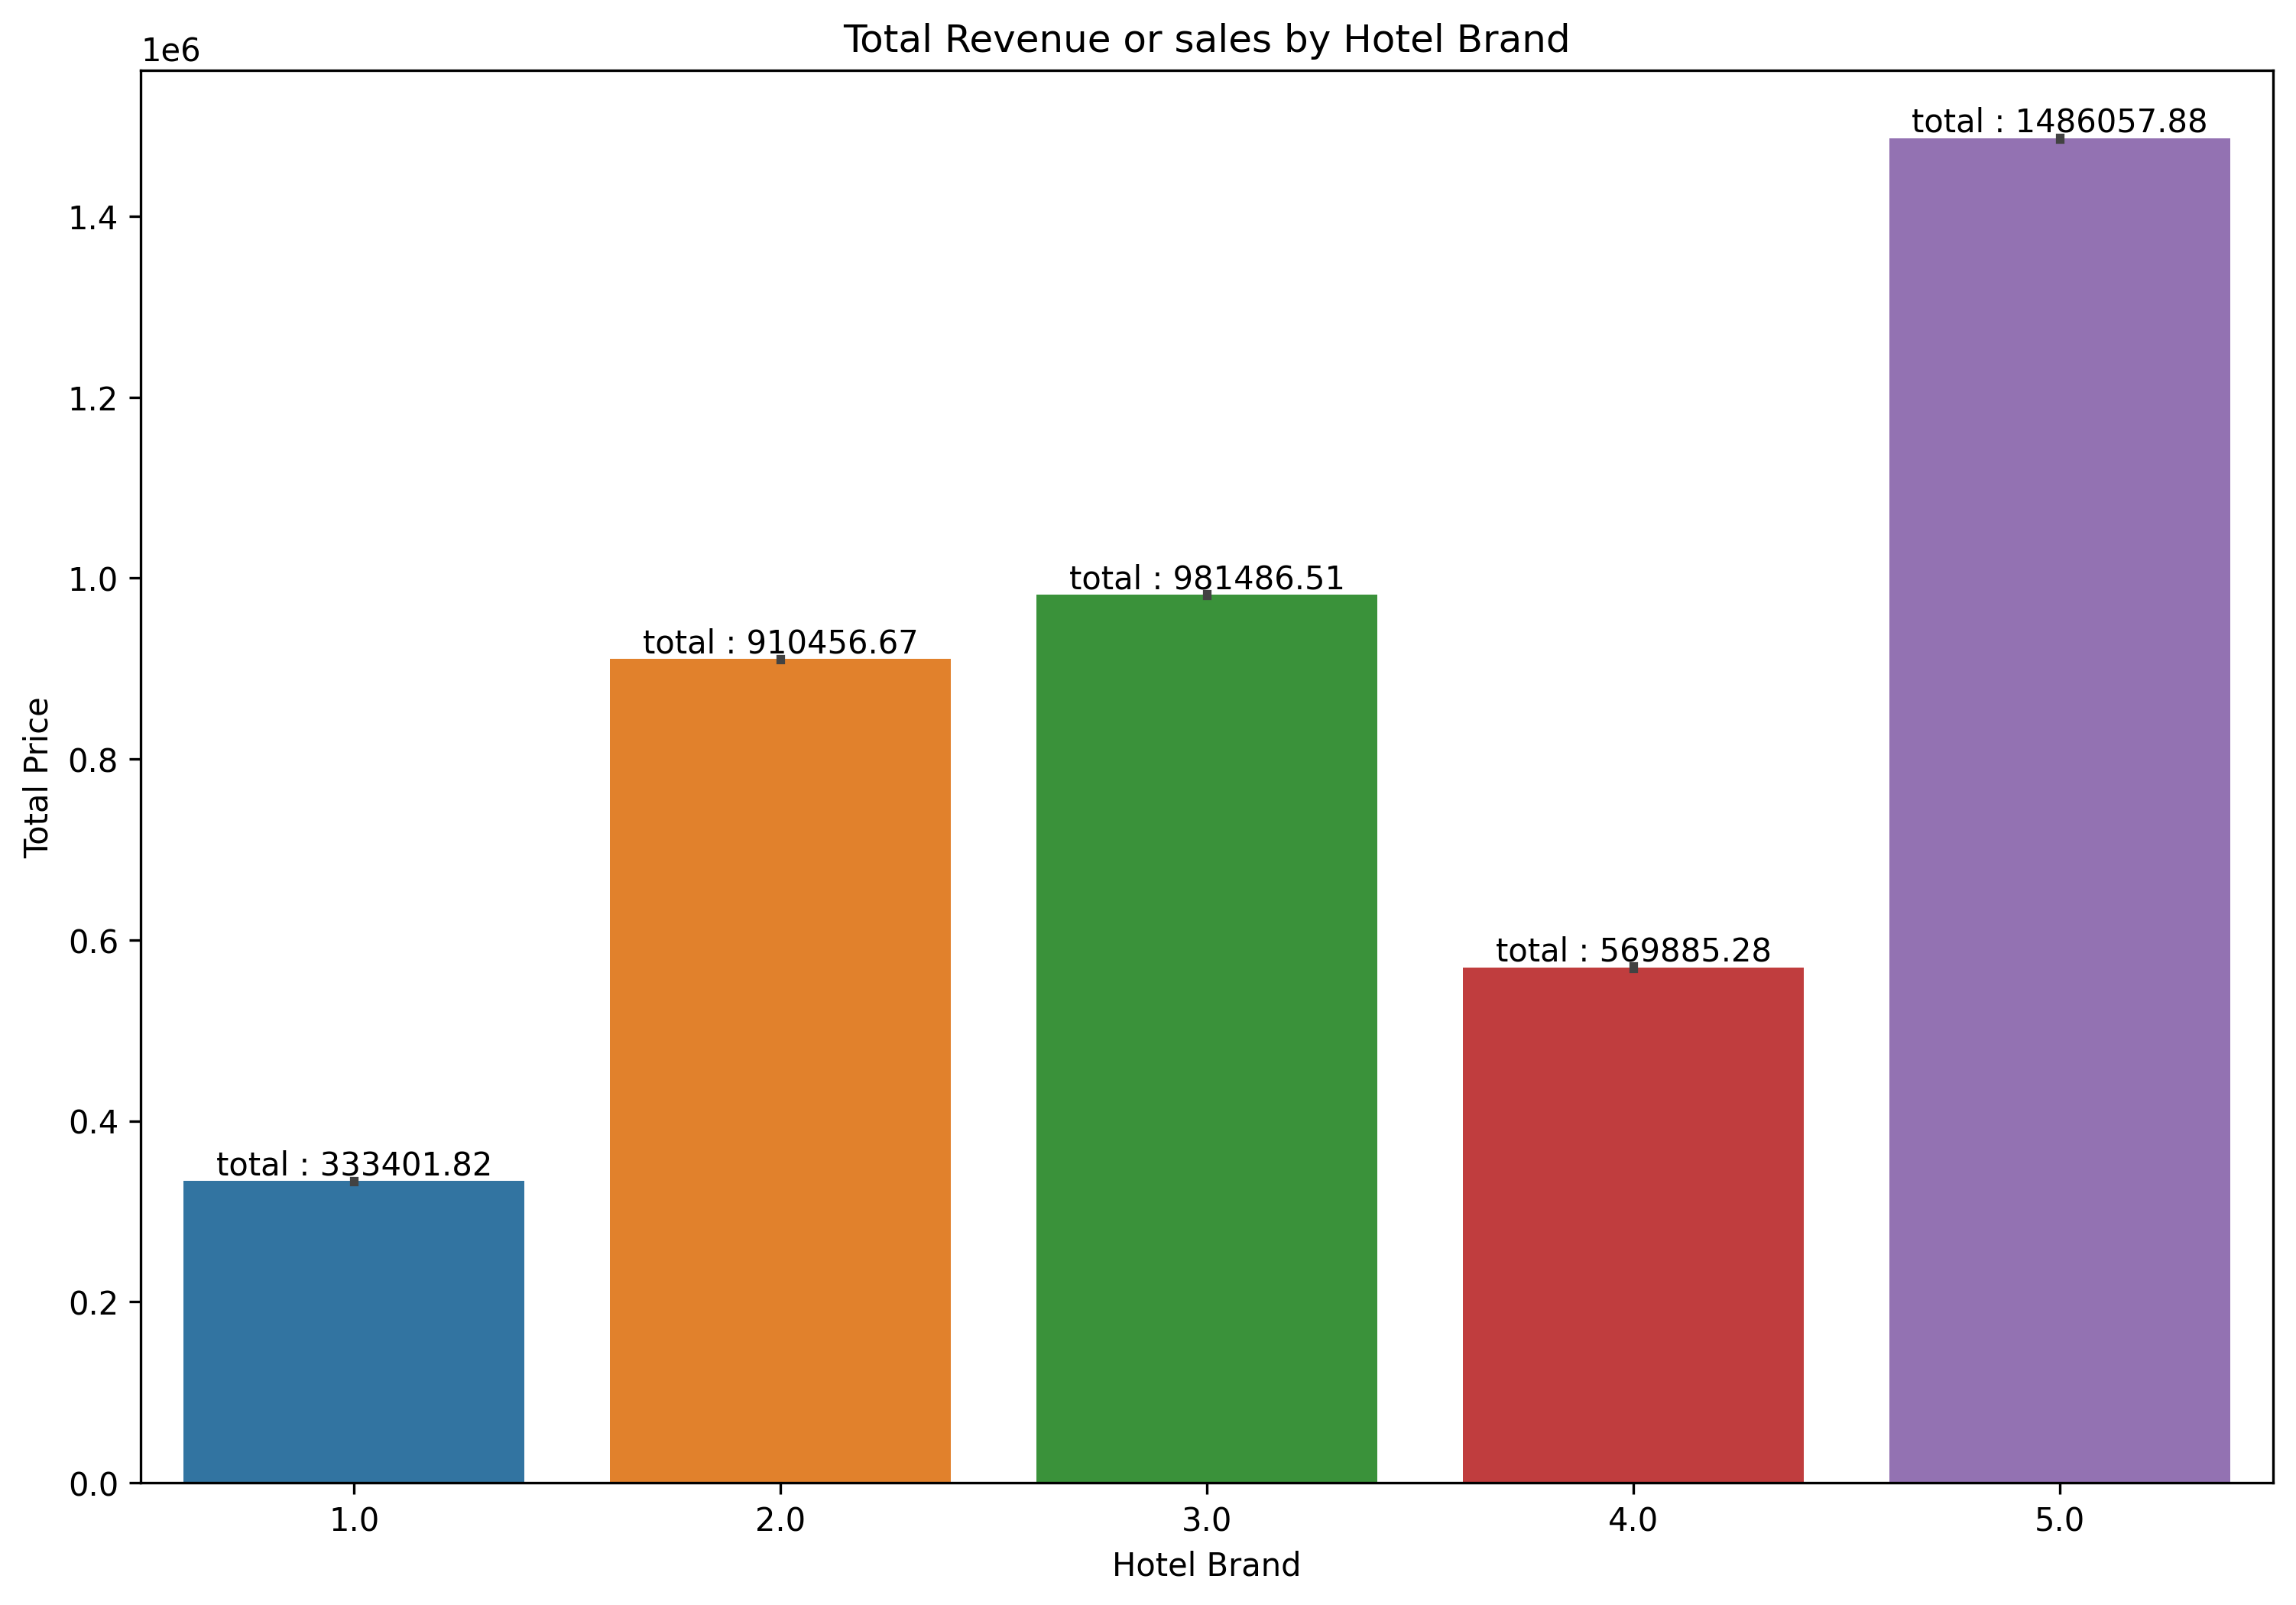

In [63]:
plt.figure(figsize=(12,8), dpi = 300)
sns.barplot(x = 'hotel_brand', y= 'price', data = df, estimator=np.sum, errorbar='sd')
# Add annotations for mean and standard deviation
for index, row in df.groupby('hotel_brand')['price'].sum().iteritems():
    plt.text(index-1, row+20, f'total : {row:.2f}', color='black', ha='center', va='bottom')
plt.title('Total Revenue or sales by Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Total Price')

# Show the plot
plt.show()

C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_45304\2459185013.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df.groupby('hotel_brand')['price'].sum().iteritems():
C:\Users\SPURUSHO\AppData\Local\Temp\ipykernel_45304\2459185013.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df.groupby('hotel_brand')['price_per_day'].mean().iteritems():


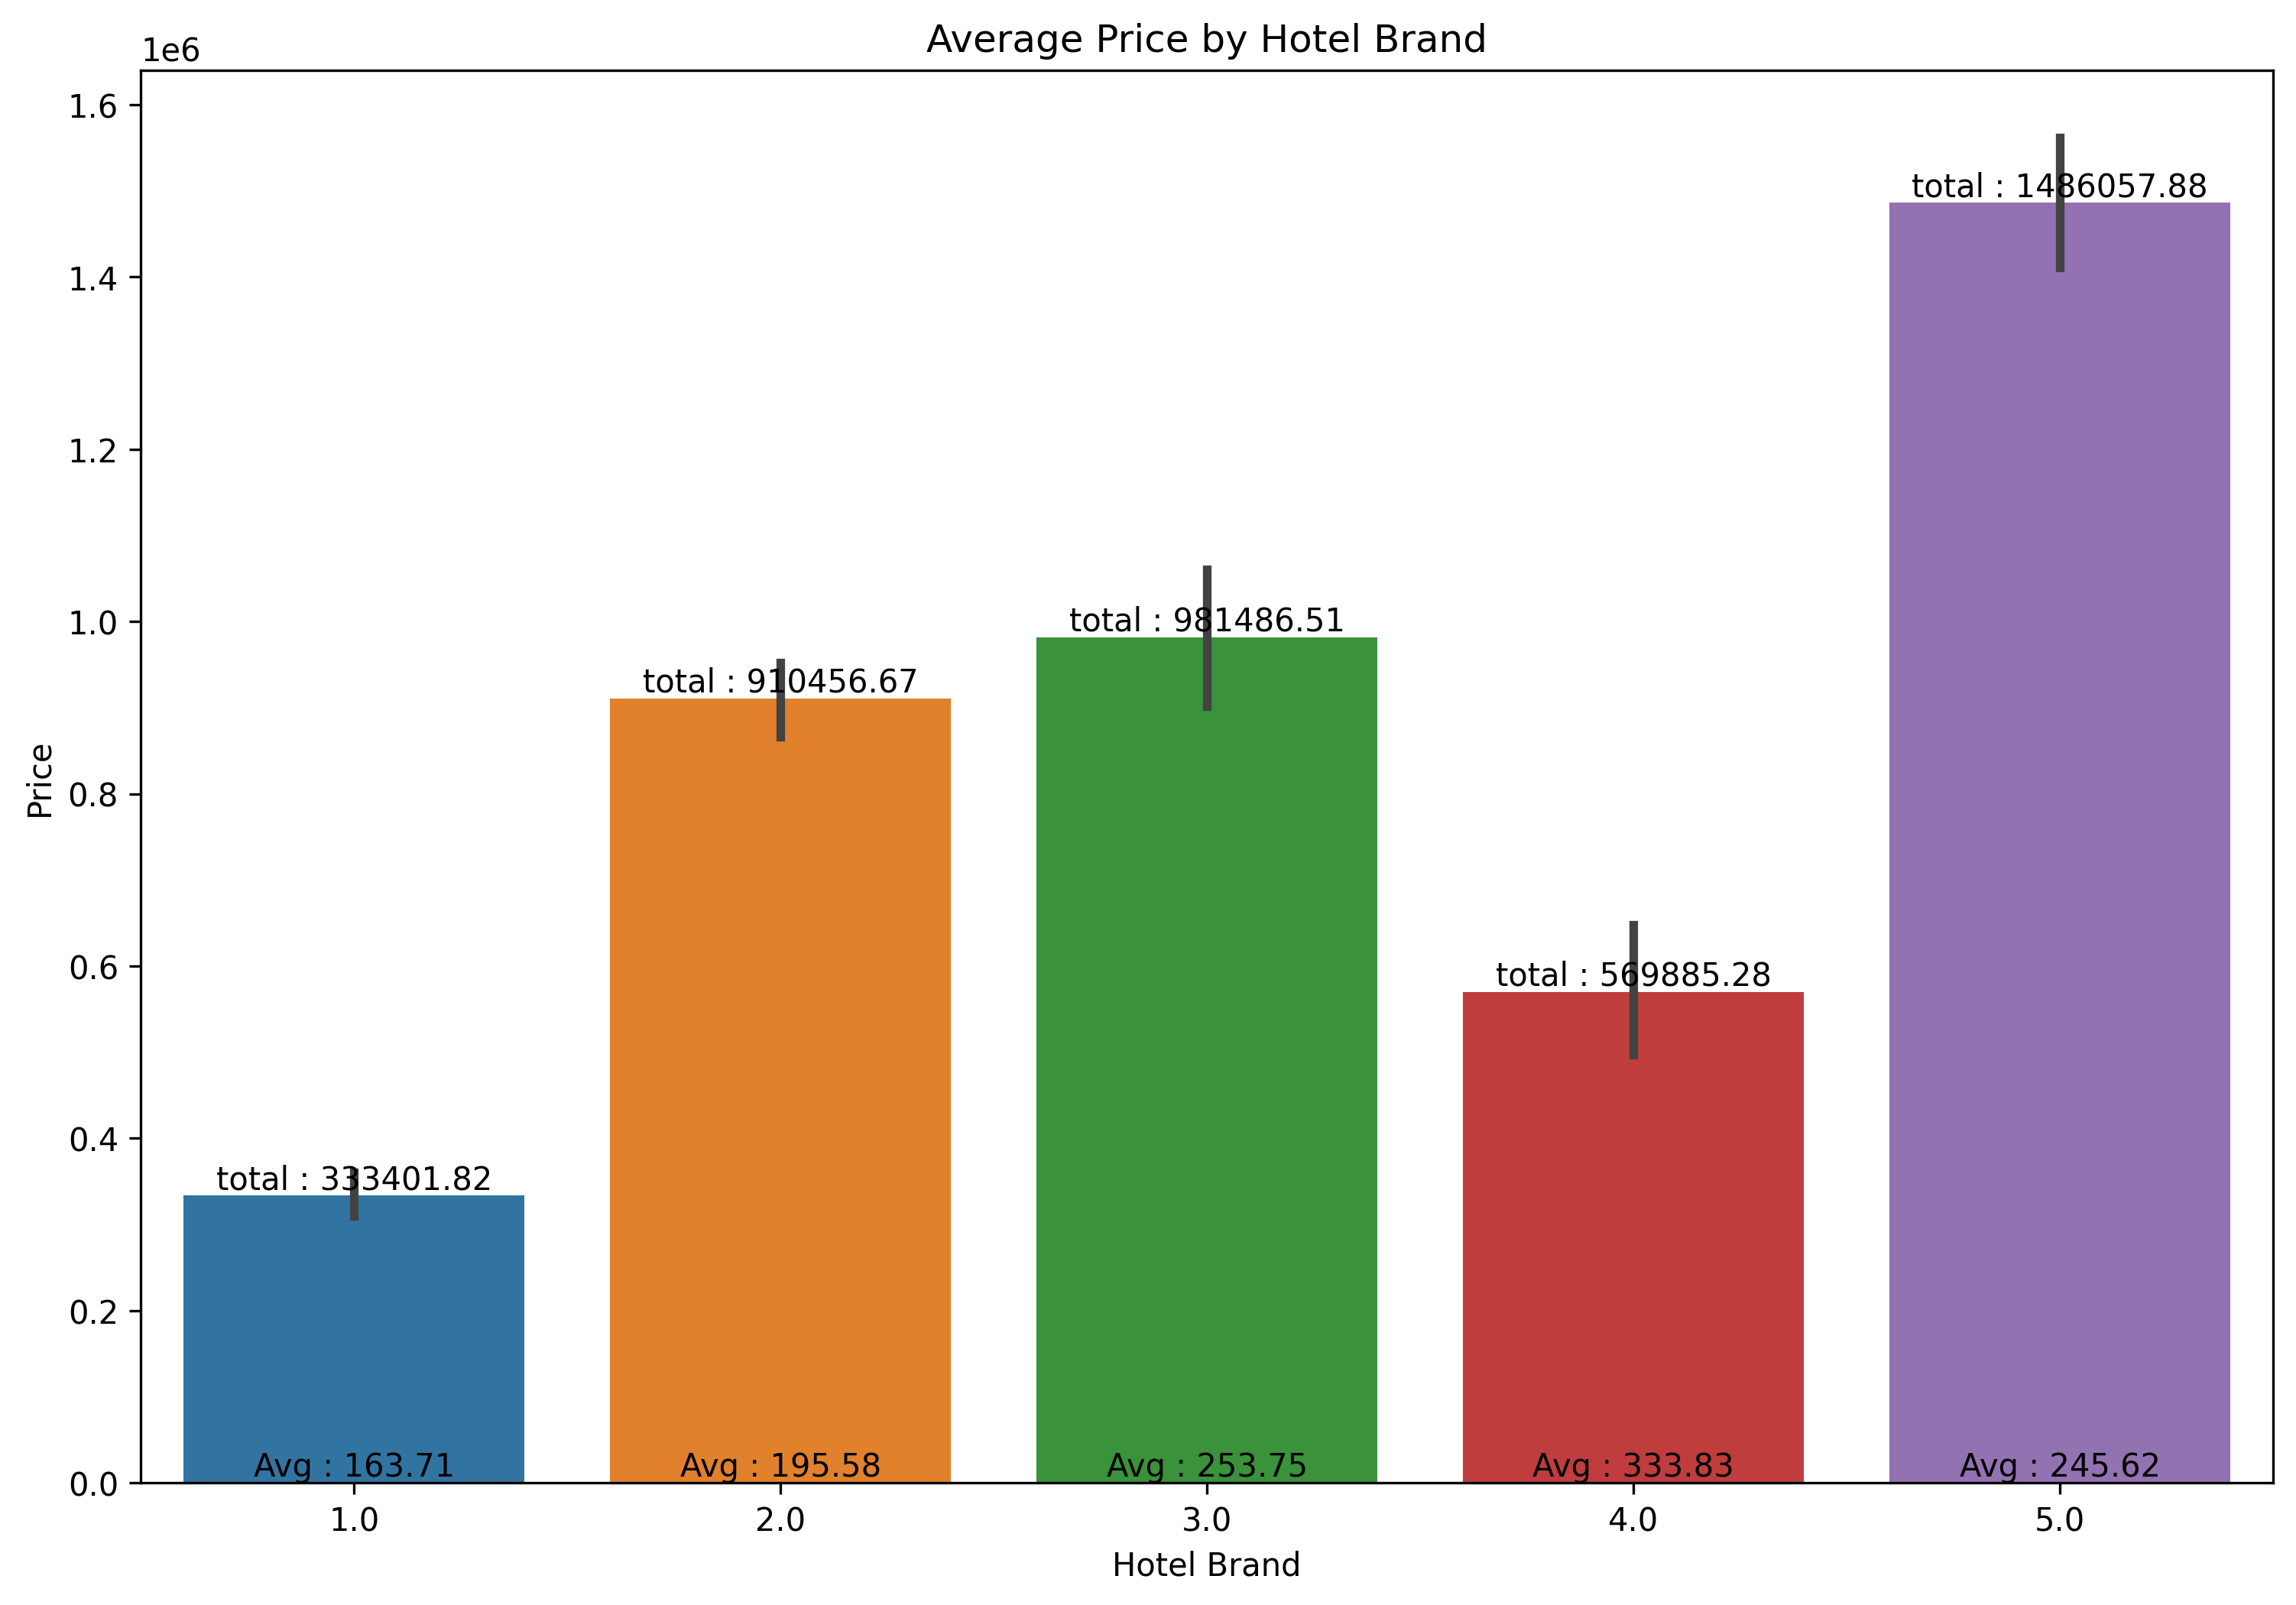

In [129]:
plt.figure(figsize=(12, 8), dpi=300)
sns.barplot(x='hotel_brand', y='price', data=df, estimator=np.sum)

# Add annotations for mean and standard deviation
for index, row in df.groupby('hotel_brand')['price'].sum().iteritems():
    plt.text(index-1, row+20, f'total : {row:.2f}', color='black', ha='center', va='bottom')

for index, row in df.groupby('hotel_brand')['price_per_day'].mean().iteritems():
    plt.text(index-1, row+50, f'Avg : {row:.2f}', color='black', ha='center', va='bottom')

# Labeling
plt.xlabel('Hotel Brand')
plt.ylabel('Price')
plt.title('Average Price by Hotel Brand')
plt.show()


In [137]:
# list(df.groupby('hotel_brand')['price_per_day'].mean().values)
rounded_values = [round(value, 2) for value in df.groupby('hotel_brand')['price_per_day'].mean().values]
print(rounded_values)

[163.71, 195.58, 253.75, 333.83, 245.62]


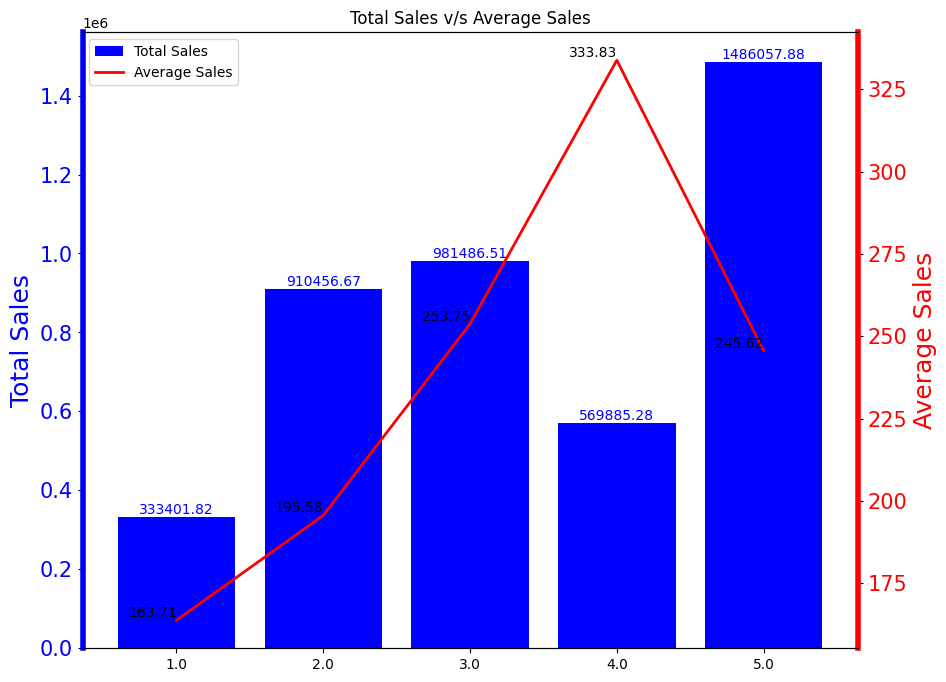

In [155]:
labels = list(np.sort(df['hotel_brand'].unique()))
Total_Sales = [round(value, 2) for value in df.groupby('hotel_brand')['price'].sum().values]
Average_Sales = [round(value, 2) for value in df.groupby('hotel_brand')['price_per_day'].mean().values]

fig, ax1 = plt.subplots(figsize=(10,8))  
bars = ax1.bar(labels, Total_Sales, lw=2, color='blue', label='Total Sales')
ax1.set_ylabel("Total Sales", fontsize=18, color='blue')
ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(4)
for label in ax1.get_yticklabels():
    label.set_color('blue')
plt.yticks(fontsize=15)

# Annotate bars with their values
for bar, value in zip(bars, Total_Sales):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

ax2 = ax1.twinx()
lines = ax2.plot(labels, Average_Sales, lw=2, color="red", label='Average Sales')
ax2.set_ylabel("Average Sales", fontsize=18, color='red')
ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(4)
for label in ax2.get_yticklabels():
    label.set_color('red')
plt.yticks(fontsize=15)

# Annotate lines with their values
for x, y in zip(labels, Average_Sales):
    ax2.text(x, y, f'{y:.2f}', ha='right', va='bottom', fontsize=10)

# Add label for the bar plot to display in the legend
ax1.set_label('Total Sales')

plt.xticks(labels, labels)  # Set x-axis ticks and labels

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc=2)

plt.xlabel('Hotel Brand')  # Label for x-axis
plt.title("Total Sales v/s Average Sales")
plt.show()


In [65]:
df.columns

Index(['hotel_brand', 'book_date', 'check_in', 'check_out', 'star_rating',
       'price', 'book_year', 'book_month', 'book_day', 'checkin_day',
       'duration_stay', 'price_per_day', 'hotel_id'],
      dtype='object')

In [66]:
df.groupby('hotel_id')['price_per_day'].mean().sort_values().head(10)

hotel_id
5       24.622857
1769    29.360000
3003    30.430000
5409    37.860000
964     39.380000
5357    40.060000
5407    40.893333
2904    41.380000
5682    43.025000
2988    43.420000
Name: price_per_day, dtype: float64

In [67]:
d = df.groupby('hotel_id')['price_per_day'].mean().sort_values().tail(10)


In [68]:
d.index

Int64Index([659, 5736, 5820, 900, 4992, 5187, 120, 4682, 2154, 409], dtype='int64', name='hotel_id')

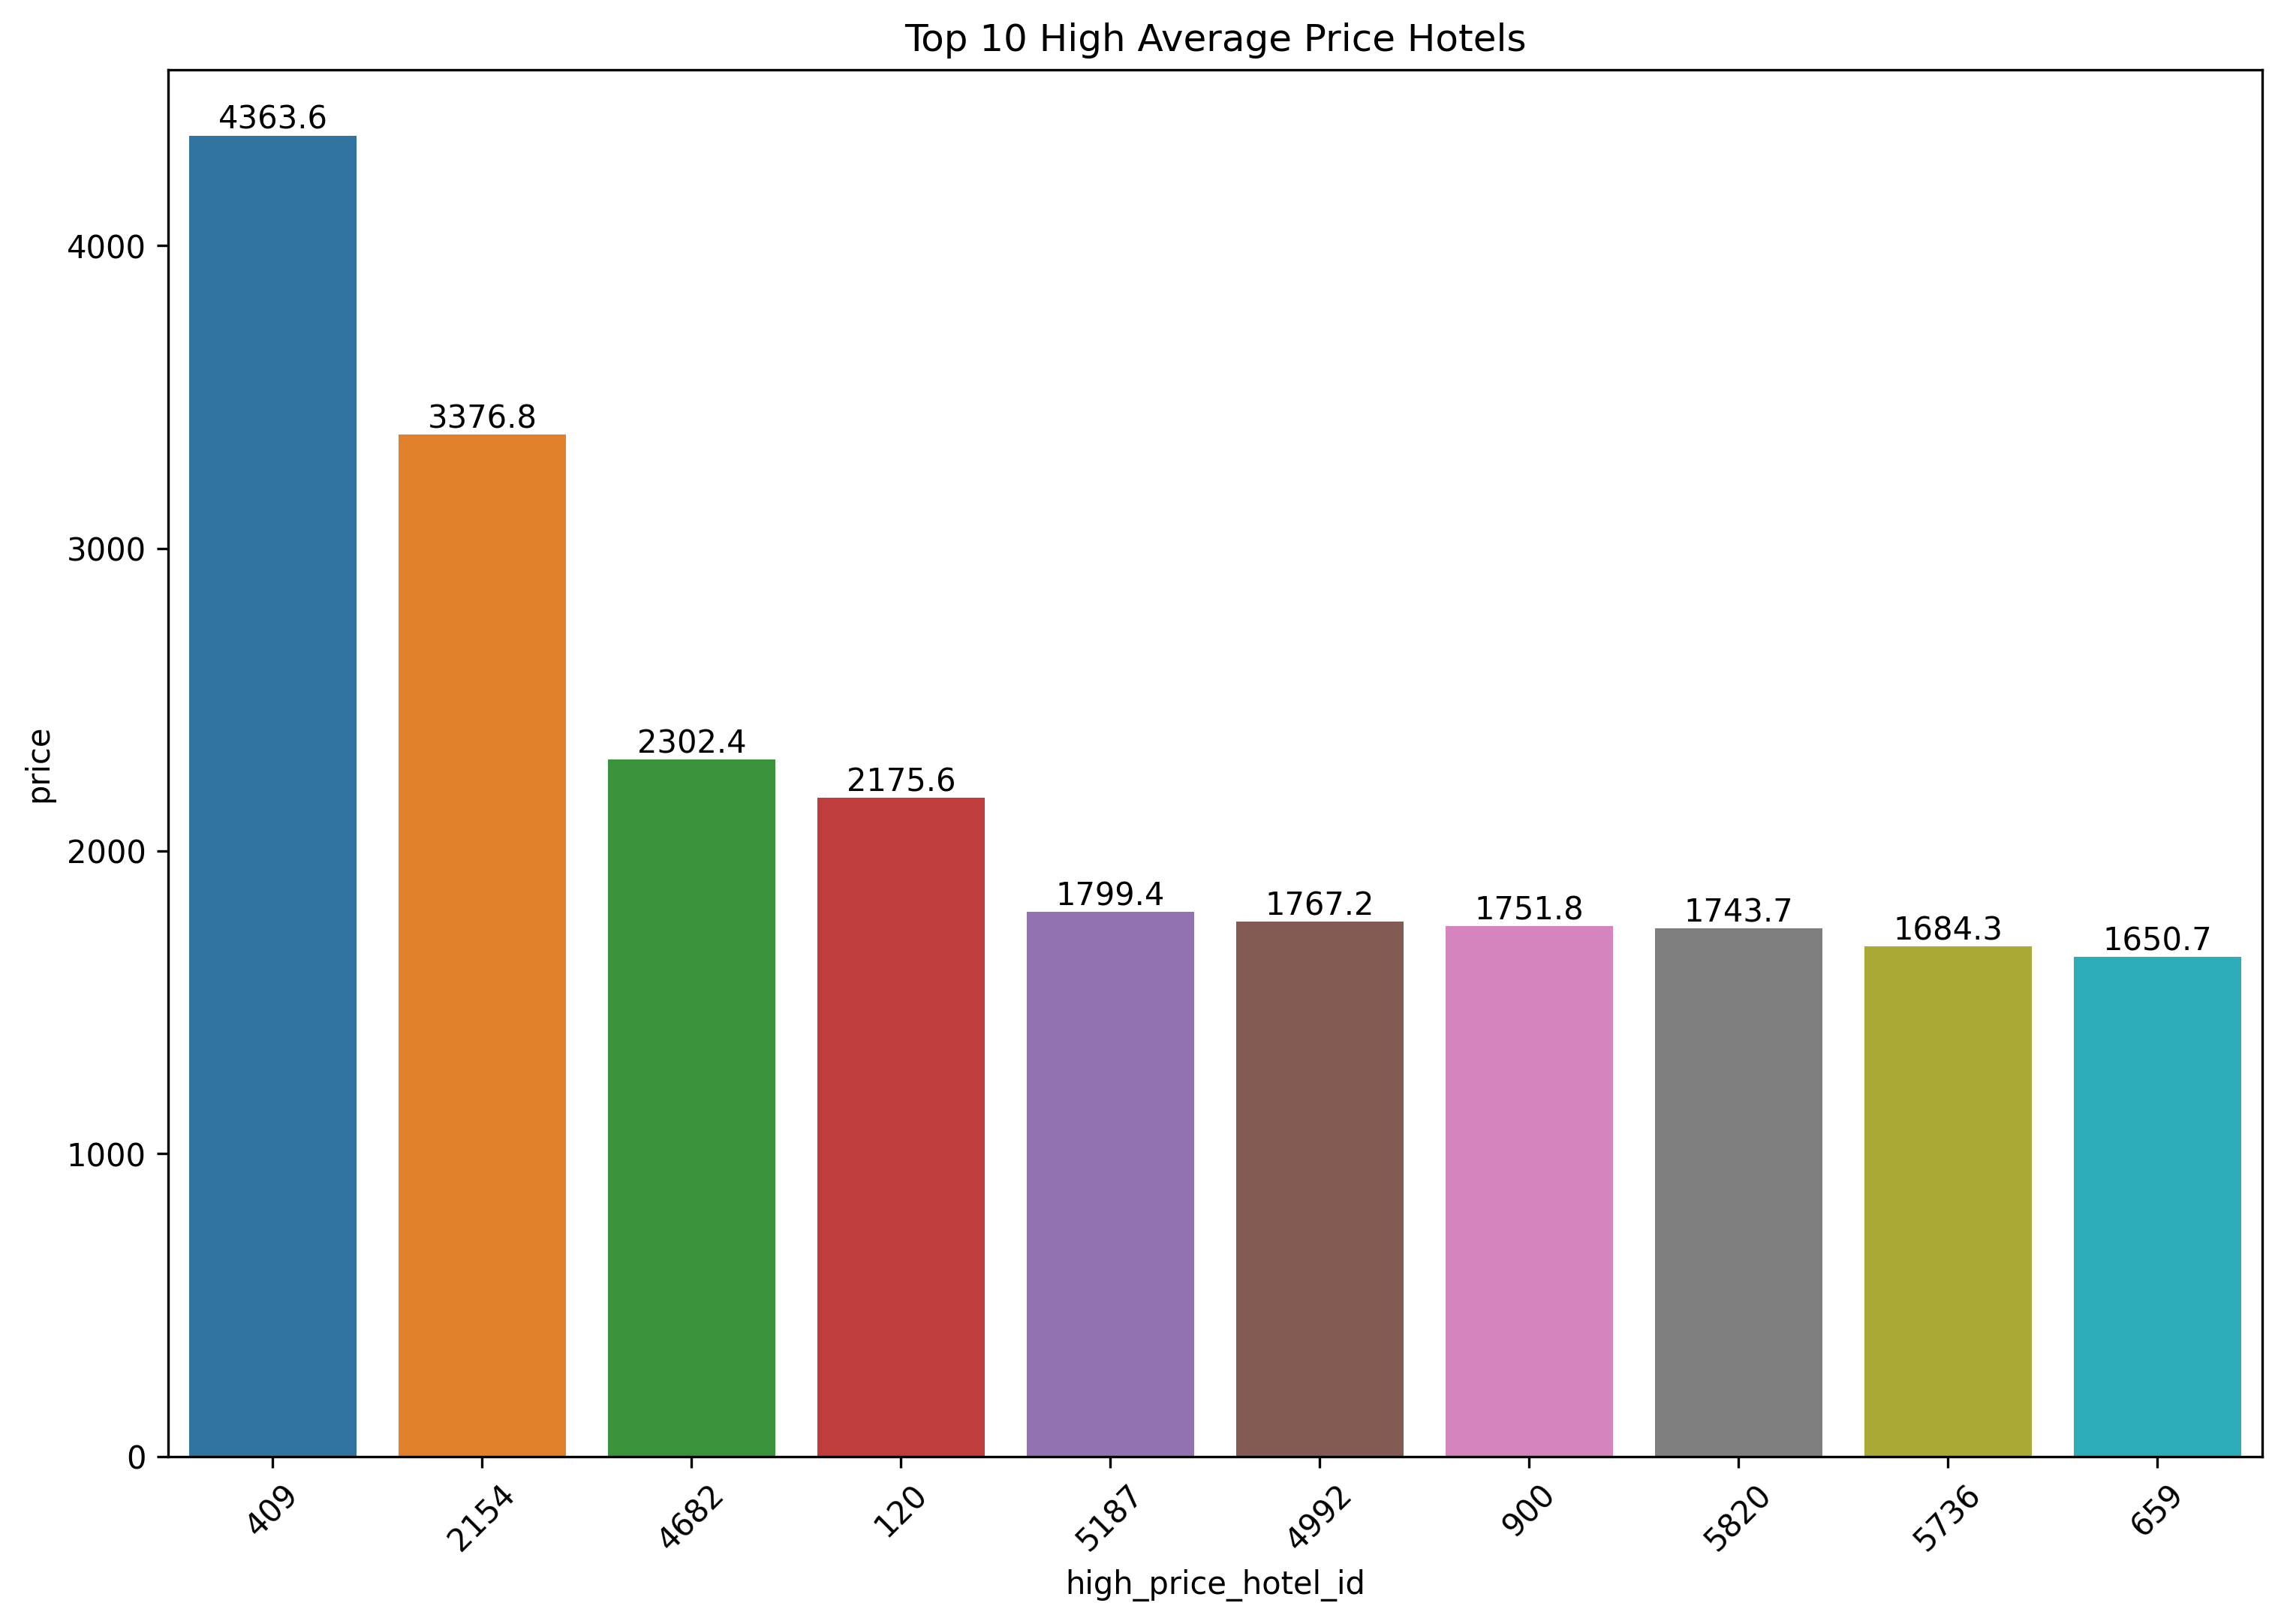

In [69]:
data = {
    'high_price_hotel_id': list(df.groupby('hotel_id')['price_per_day'].mean().sort_values().tail(10).index),
    'price': list(df.groupby('hotel_id')['price_per_day'].mean().sort_values().tail(10).values)
}
df1 = pd.DataFrame(data)
# Sort the DataFrame by the 'price' column in descending order
df1 = df1.sort_values(by='price', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8), dpi=300)
sns.barplot(x='high_price_hotel_id', y='price', data=df1, order=df1['high_price_hotel_id'])

for index, row in df1.iterrows():
    plt.text(len(df1)-1-row.name, row['price'], f'{row["price"]:.1f}', color='black', ha='center', va='bottom')  # Use row.name instead of index

# Optionally, you can rotate the labels on x-axis for better readability
plt.xticks(rotation=45)
plt.title('Top 10 High Average Price Hotels')  # Title should be placed after the plot is created

# Show plot
plt.show()


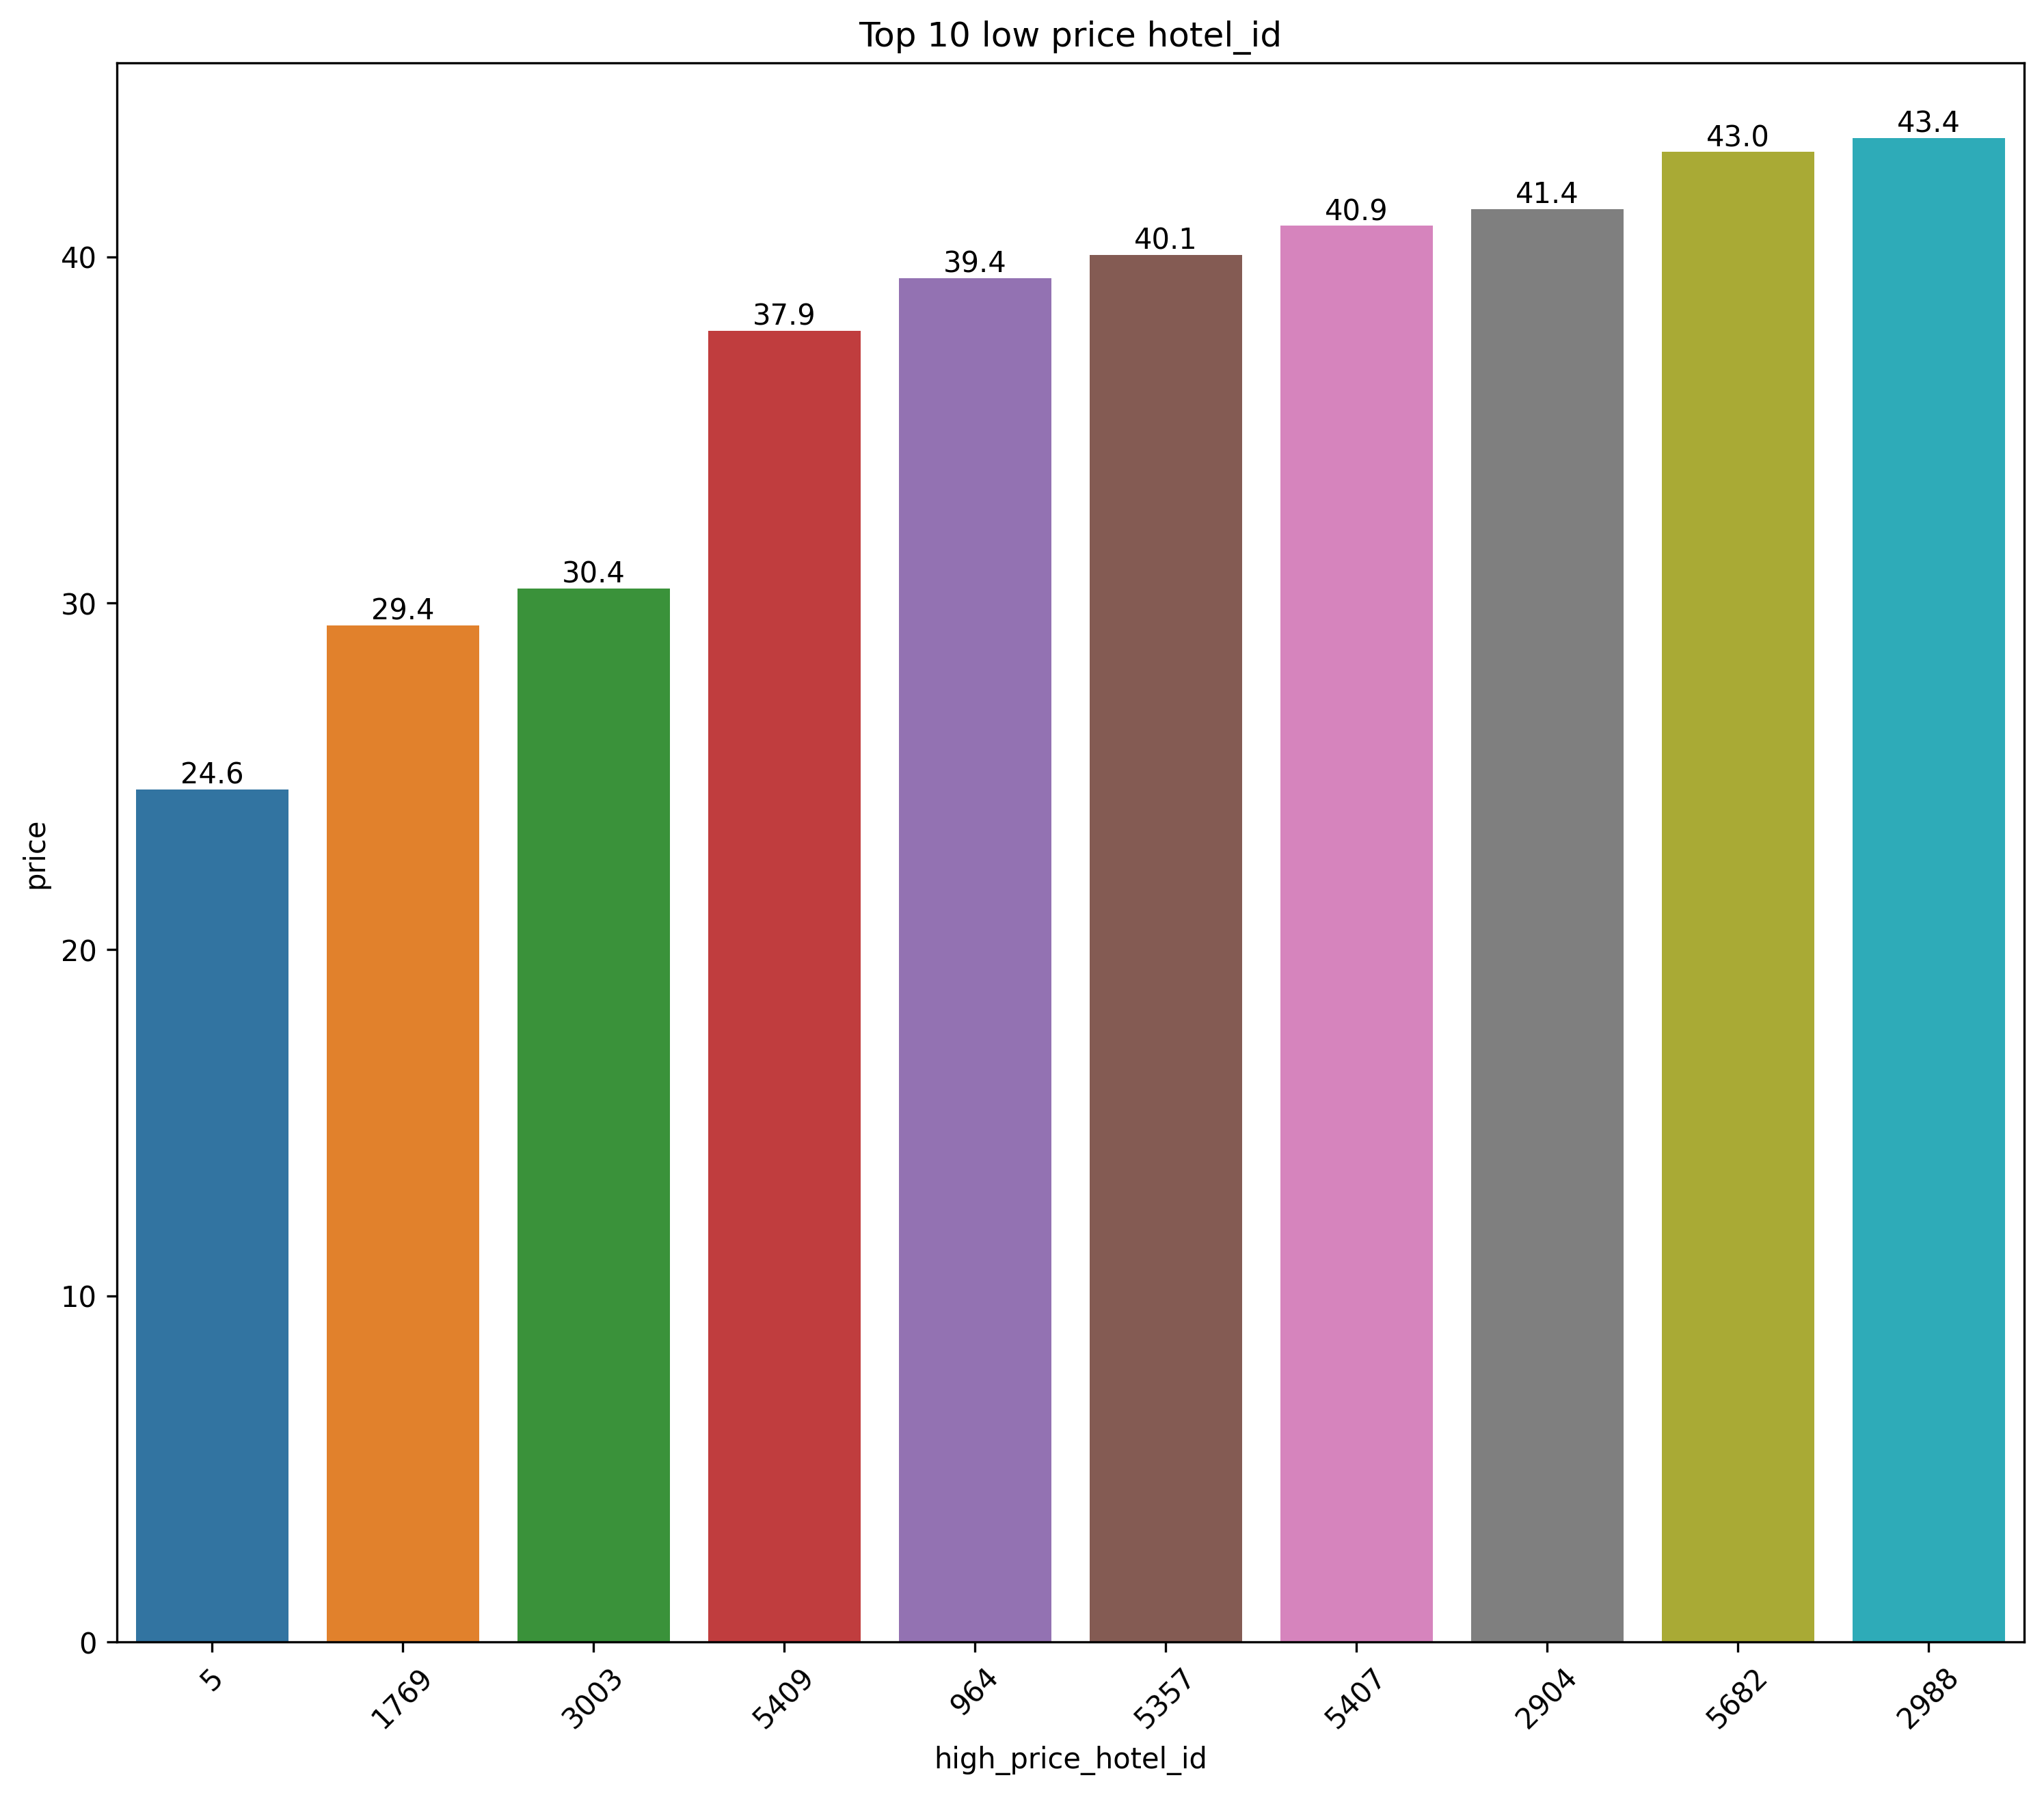

In [70]:
data = {
    'high_price_hotel_id': list(df.groupby('hotel_id')['price_per_day'].mean().sort_values().head(10).index),
    'price': list(df.groupby('hotel_id')['price_per_day'].mean().sort_values().head(10).values)
}
df1 = pd.DataFrame(data)

# Sort the DataFrame by the 'price' column in descending order
df1 = df1.sort_values(by='price', ascending=True)

# Create the plot
plt.figure(figsize=(12, 10), dpi=300)
sns.barplot(x='high_price_hotel_id', y='price',data=df1, order=df1['high_price_hotel_id'])

for index, row in df1.iterrows():
    plt.text(row.name, row['price'], f'{row["price"]:.1f}', color='black', ha='center', va='bottom') 
# Optionally, you can rotate the labels on x-axis for better readability
plt.xticks(rotation=45)
plt.title('Top 10 low price hotel_id')

# Show plot
plt.show()


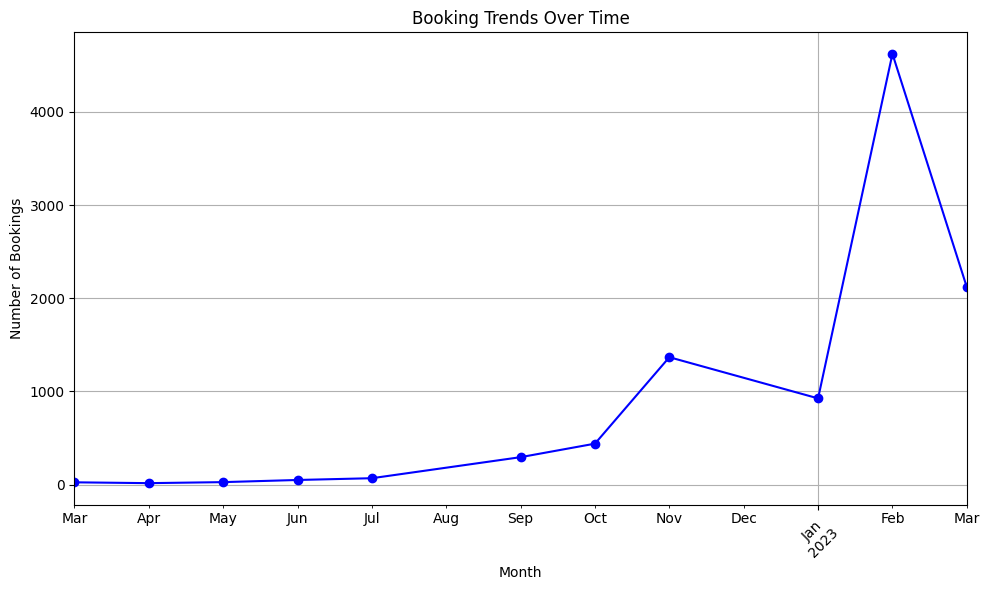

In [71]:
# Extract month and year from 'book_date'
df['book_year'] = df['book_date'].dt.to_period('Y')

df1 = df[(df['book_year'] <= pd.Period('2023', freq='A-DEC')) & (df['book_year'] >= pd.Period('2020', freq='A-DEC')) ]
df1['book_month'] = df1['book_date'].dt.to_period('M')
# Group by month and year and count the number of bookings
booking_trend = df1.groupby('book_month').size()

# Plot the booking trend over time
plt.figure(figsize=(10, 6))
booking_trend.plot(kind='line', marker='o', color='b')
plt.title('Booking Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


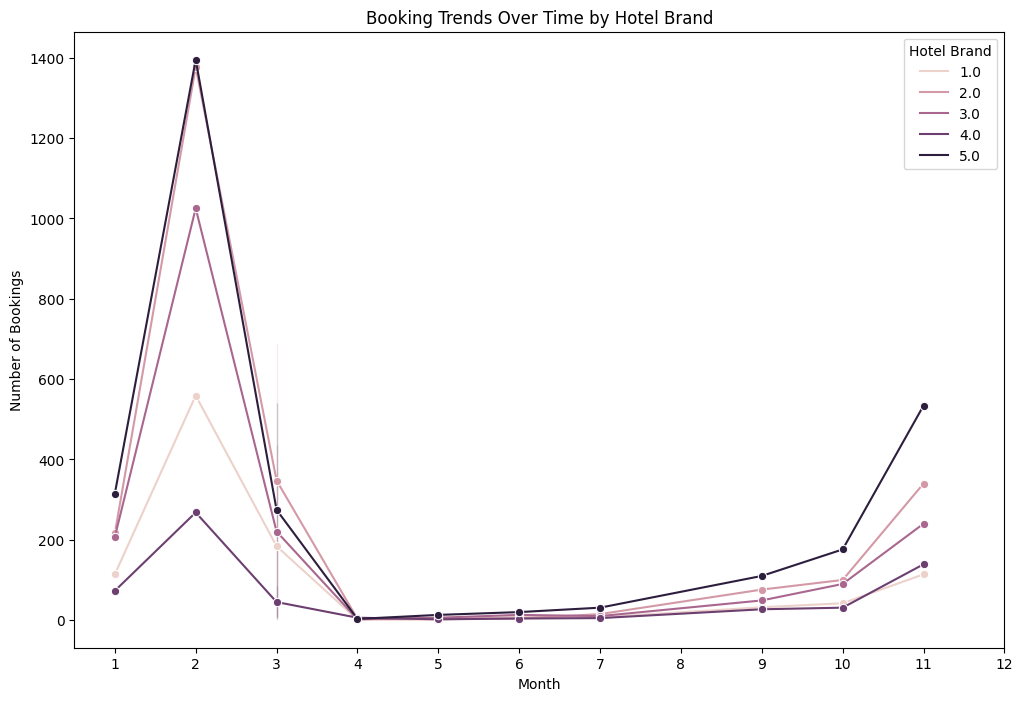

In [72]:

# Extract year and month from 'book_date'
df['book_Y'] = df['book_date'].dt.year
df['book_M'] = df['book_date'].dt.month

# Group by 'hotel_brand' and 'book_year', 'book_month' to count bookings
booking_counts = df.groupby(['hotel_brand', 'book_Y', 'book_M']).size().reset_index(name='booking_count')

# Plot booking trends for each hotel brand
plt.figure(figsize=(12, 8))
sns.lineplot(data=booking_counts, x='book_M', y='booking_count', hue='hotel_brand', marker='o')
plt.title('Booking Trends Over Time by Hotel Brand')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Hotel Brand', loc='upper right')
plt.xticks(range(1, 13))  # Assuming bookings span all months of the year
plt.show()

#### from the above graph it is clear that the trend of bookings of all types of hotel are highly similar.

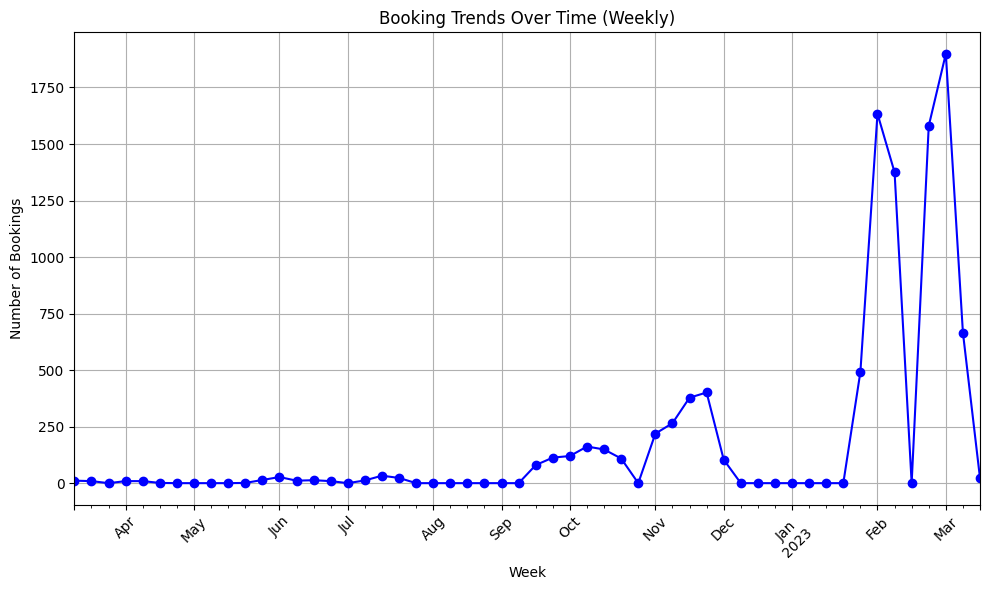

In [73]:

# Set 'book_date' as the index of the DataFrame
df.set_index('book_date', inplace=True)

# Resample the DataFrame to group by week and count the number of bookings
booking_trend_weekly = df.resample('W').size()

# Plot the booking trend over time
plt.figure(figsize=(10, 6))
booking_trend_weekly.plot(kind='line', marker='o', color='b')
plt.title('Booking Trends Over Time (Weekly)')
plt.xlabel('Week')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### star rating with respect to hotel_brand

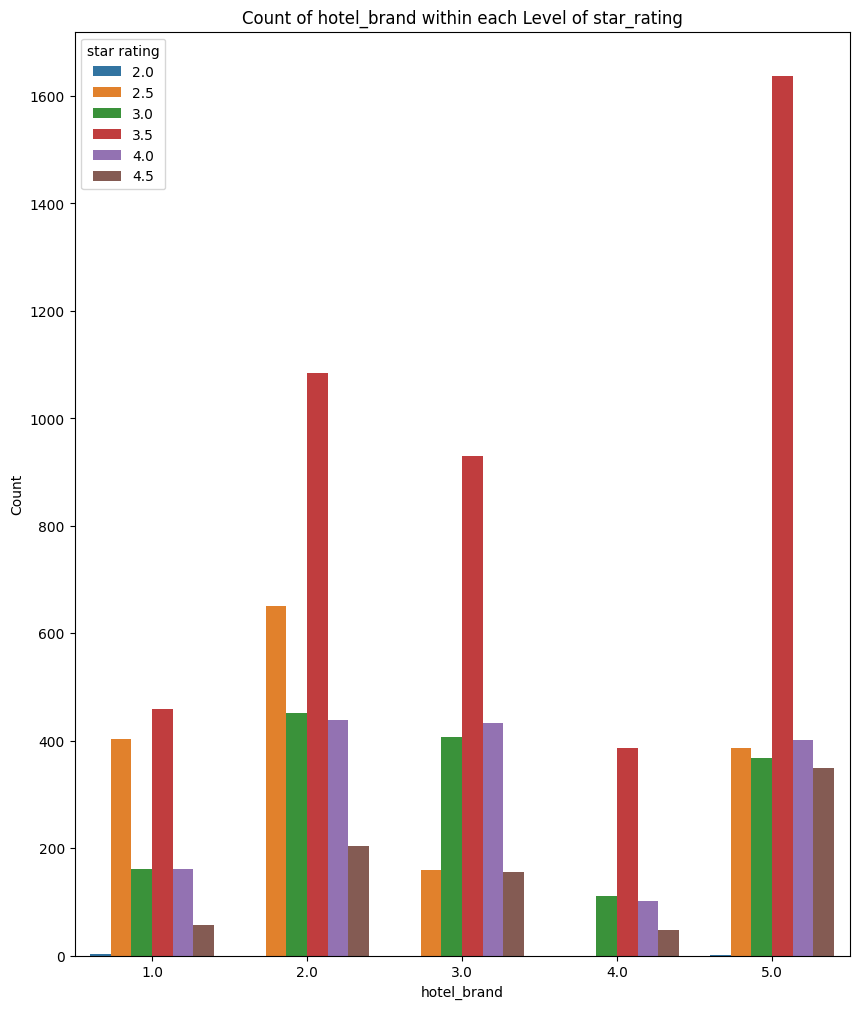

In [74]:
plt.figure(figsize=(10, 12))
sns.countplot(x='hotel_brand', hue='star_rating', data=df)
plt.title('Count of hotel_brand within each Level of star_rating')
plt.xlabel('hotel_brand')
plt.ylabel('Count')
plt.legend(title='star rating')
plt.show()

In [149]:
df.groupby('hotel_brand')['star_rating'].mean()

hotel_brand
1.0    3.217496
2.0    3.340106
3.0    3.504561
4.0    3.565891
5.0    3.493166
Name: star_rating, dtype: float64

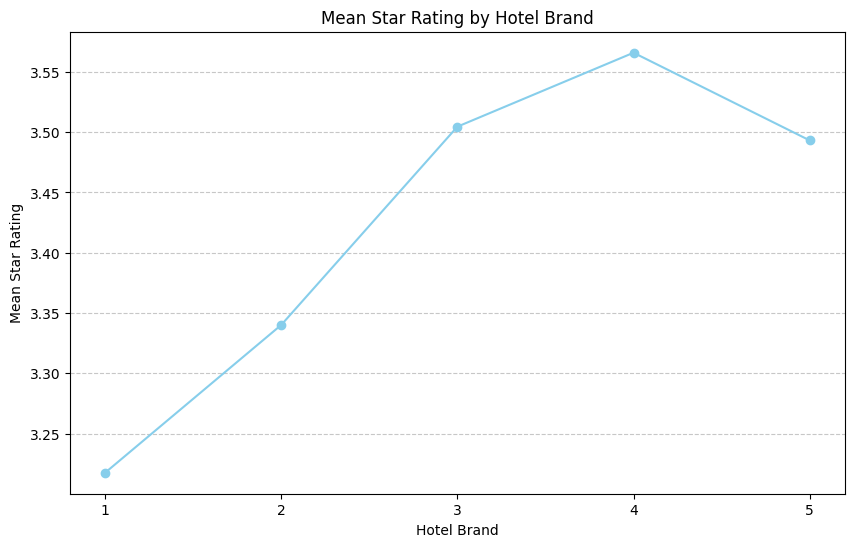

In [154]:
# Calculate mean star rating for each hotel brand
mean_star_rating = df.groupby('hotel_brand')['star_rating'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_star_rating.index, mean_star_rating.values, color='skyblue', marker='o', linestyle='-')
plt.title('Mean Star Rating by Hotel Brand')
plt.xlabel('Hotel Brand')
plt.ylabel('Mean Star Rating')
plt.xticks(mean_star_rating.index)  # Set x-axis ticks to match the index of mean_star_rating
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [75]:
df.head()

,hotel_brand,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id,book_Y,book_M
book_date,,,,,,,,,,,,,,
2022-05-29,4.0,2023-01-08,2023-01-12,3.5,751.80,2022,May,Sunday,Sunday,4,187.950000,1,2022,5
2022-06-09,4.0,2023-01-18,2023-01-26,3.5,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2,2022,6
2022-05-30,3.0,2023-01-07,2023-01-12,3.5,4209.89,2022,May,Monday,Saturday,5,841.978000,3,2022,5
2022-05-31,5.0,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4,2022,5
2022-06-02,1.0,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5,2022,6


In [76]:
df.reset_index(inplace=True)

In [77]:
df.head()

,book_date,hotel_brand,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id,book_Y,book_M
0,2022-05-29,4.0,2023-01-08,2023-01-12,3.5,751.80,2022,May,Sunday,Sunday,4,187.950000,1,2022,5
1,2022-06-09,4.0,2023-01-18,2023-01-26,3.5,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2,2022,6
2,2022-05-30,3.0,2023-01-07,2023-01-12,3.5,4209.89,2022,May,Monday,Saturday,5,841.978000,3,2022,5
3,2022-05-31,5.0,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4,2022,5
4,2022-06-02,1.0,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5,2022,6


In [78]:
df.columns

Index(['book_date', 'hotel_brand', 'check_in', 'check_out', 'star_rating',
       'price', 'book_year', 'book_month', 'book_day', 'checkin_day',
       'duration_stay', 'price_per_day', 'hotel_id', 'book_Y', 'book_M'],
      dtype='object')

In [79]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# Convert 'check_in' column to datetime format
df['check_in'] = pd.to_datetime(df['check_in'])

# Extract date from 'check_in' column
df['check_in_date'] = df['check_in'].dt.date

# Group by 'check_in_date' and count occurrences
checkin_counts = df['check_in_date'].value_counts()

# Find the date with the highest number of check-ins
max_checkin_date = checkin_counts.idxmax()
max_checkin_count = checkin_counts[max_checkin_date]

# print(f"The date with the highest number of check-ins is {max_checkin_date} with {max_checkin_count} check-ins.")


In [80]:
top_ten_checkin = df['check_in_date'].value_counts().head(10)


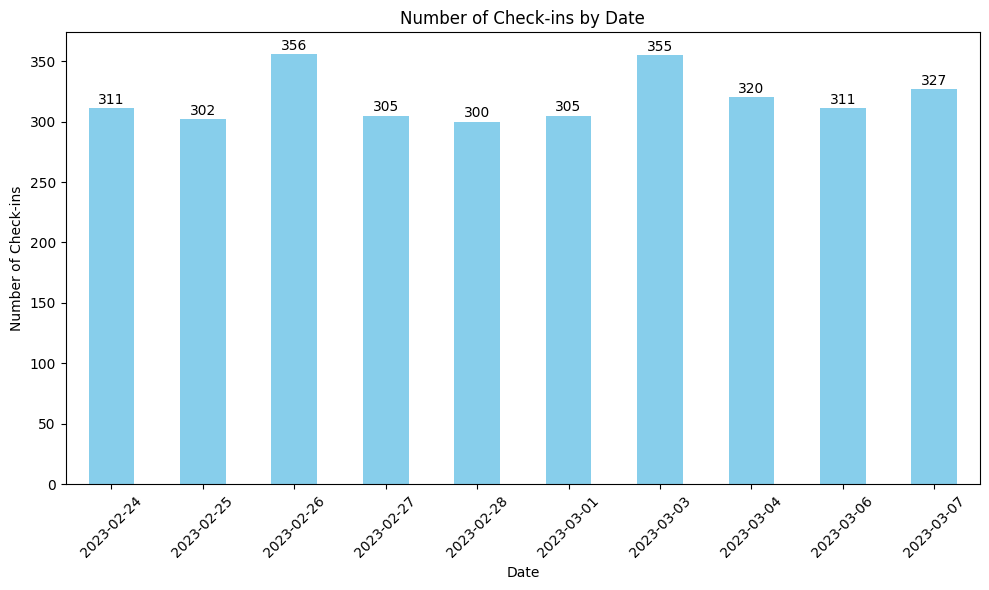

In [81]:
# checkin_series.index = pd.to_datetime(checkin_series.index)
checkin_sorted = top_ten_checkin.sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
bar_plot = checkin_sorted.plot(kind='bar', color='skyblue')
# Annotate each bar with its corresponding value
for i, v in enumerate(checkin_sorted):
    bar_plot.text(i, v + 1, str(v), ha='center', va='bottom')
plt.title('Number of Check-ins by Date')
plt.xlabel('Date')
plt.ylabel('Number of Check-ins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
# This line of code generates a Series of all the dates between the check-in 
# and check-out dates for each booking in the DataFrame, effectively representing 
# the occupied dates across all bookings.
occupied_dates = pd.concat([pd.Series((r['check_in'] + pd.to_timedelta(i, 'D')).date() 
                                      for i in range((r['check_out'] - r['check_in']).days + 1)) 
                            for _, r in df.iterrows()], ignore_index=True)

# Count occurrences of each day
occupied_dates_count = occupied_dates.value_counts().sort_index()

# Find the most occupied day
most_occupied_day = occupied_dates_count.idxmax()
most_occupied_day_count = occupied_dates_count.max()

print(f"The most occupied day is {most_occupied_day} with {most_occupied_day_count} bookings.")

The most occupied day is 2023-02-26 with 839 bookings.


In [83]:
occupied_dates.value_counts().sort_values(ascending=False).head(10)

2023-02-26    839
2023-02-27    831
2023-03-04    814
2023-02-28    784
2023-03-03    779
2023-02-25    774
2023-03-01    759
2023-03-07    753
2023-03-02    748
2023-03-05    737
dtype: int64

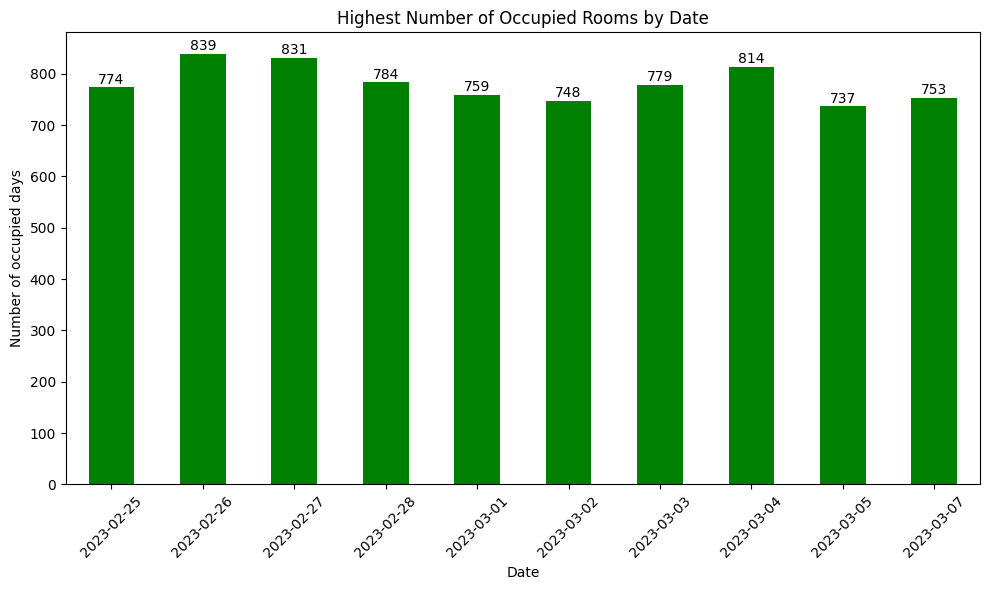

In [84]:
import matplotlib.pyplot as plt

# Assuming top_ten_occupied_days is already defined
# Plot the data
plt.figure(figsize=(10, 6))
top_ten_occupied_days = occupied_dates.value_counts().sort_values(ascending=False).head(10)
# checkin_series.index = pd.to_datetime(checkin_series.index)
occupied_sorted = top_ten_occupied_days.sort_index()
bar_plot = occupied_sorted.plot(kind='bar', color='green')

# Annotate each bar with its corresponding value
for i, v in enumerate(occupied_sorted):
    bar_plot.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Highest Number of Occupied Rooms by Date')
plt.xlabel('Date')
plt.ylabel('Number of occupied days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

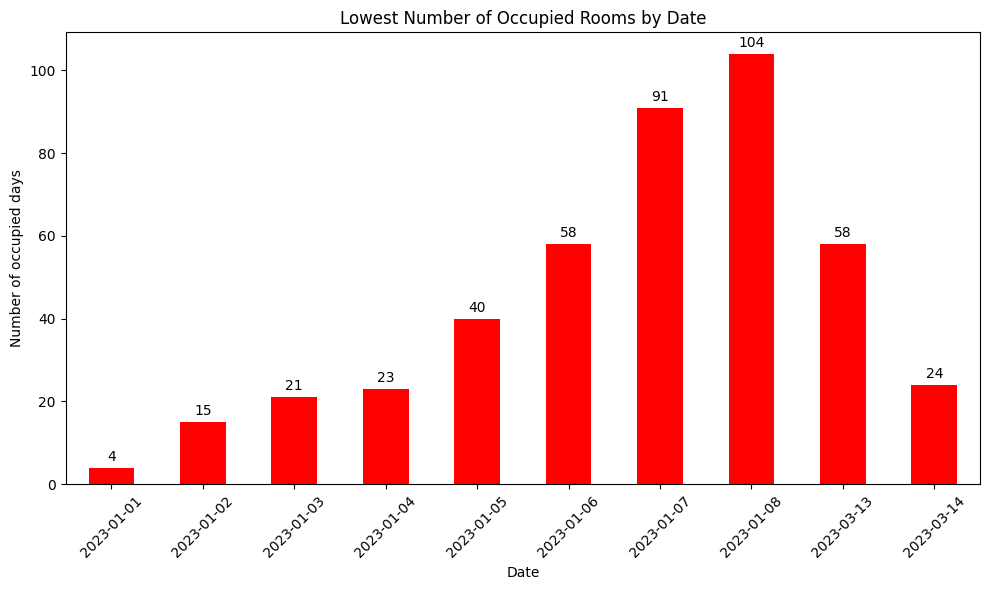

In [85]:
import matplotlib.pyplot as plt

# Assuming top_ten_occupied_days is already defined
# Plot the data
plt.figure(figsize=(10, 6))
top_ten_occupied_days = occupied_dates.value_counts().sort_values(ascending=False).tail(10)
# checkin_series.index = pd.to_datetime(checkin_series.index)
occupied_sorted = top_ten_occupied_days.sort_index()
bar_plot = occupied_sorted.plot(kind='bar', color='red')

# Annotate each bar with its corresponding value
for i, v in enumerate(occupied_sorted):
    bar_plot.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Lowest Number of Occupied Rooms by Date')
plt.xlabel('Date')
plt.ylabel('Number of occupied days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
df.head()

,book_date,hotel_brand,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id,book_Y,book_M,check_in_date
0,2022-05-29,4.0,2023-01-08,2023-01-12,3.5,751.80,2022,May,Sunday,Sunday,4,187.950000,1,2022,5,2023-01-08
1,2022-06-09,4.0,2023-01-18,2023-01-26,3.5,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2,2022,6,2023-01-18
2,2022-05-30,3.0,2023-01-07,2023-01-12,3.5,4209.89,2022,May,Monday,Saturday,5,841.978000,3,2022,5,2023-01-07
3,2022-05-31,5.0,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4,2022,5,2023-01-06
4,2022-06-02,1.0,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5,2022,6,2023-01-24


In [87]:
import pandas as pd

# Group the DataFrame by hotel_brand and concatenate the occupied dates for each booking within each group
grouped_dates = df.groupby('hotel_brand').apply(lambda x: pd.concat([pd.Series((row['check_in'] + pd.to_timedelta(i, 'D')).date() 
                                     for i in range((row['check_out'] - row['check_in']).days + 1)) 
                            for _, row in x.iterrows()], ignore_index=True))

# Count occurrences of each date within each group


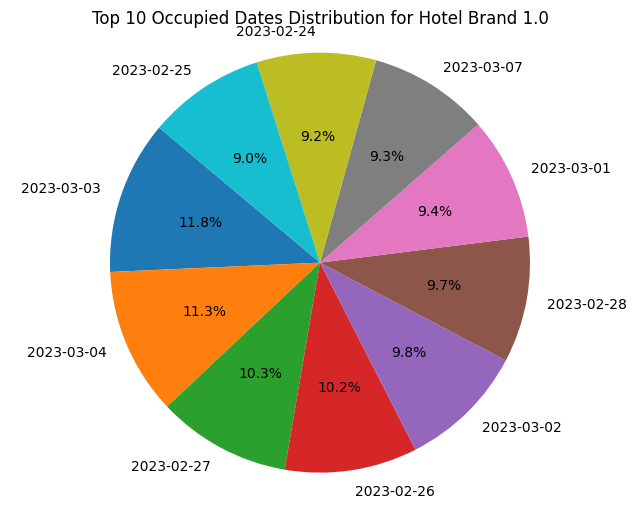

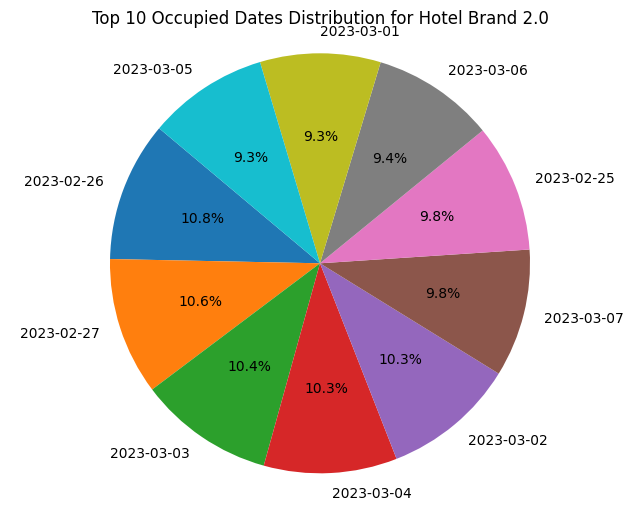

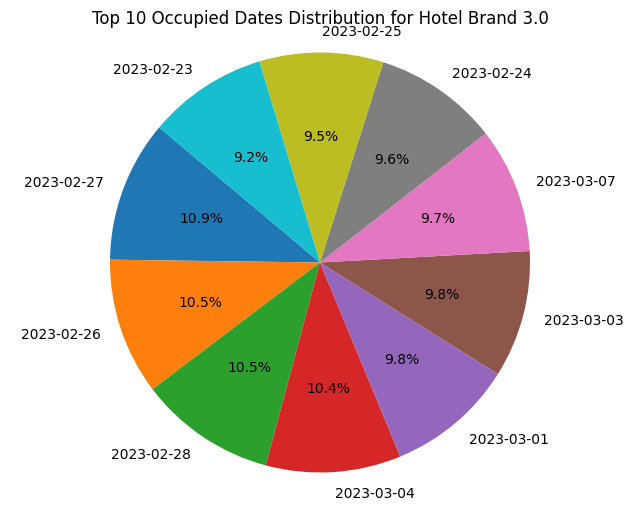

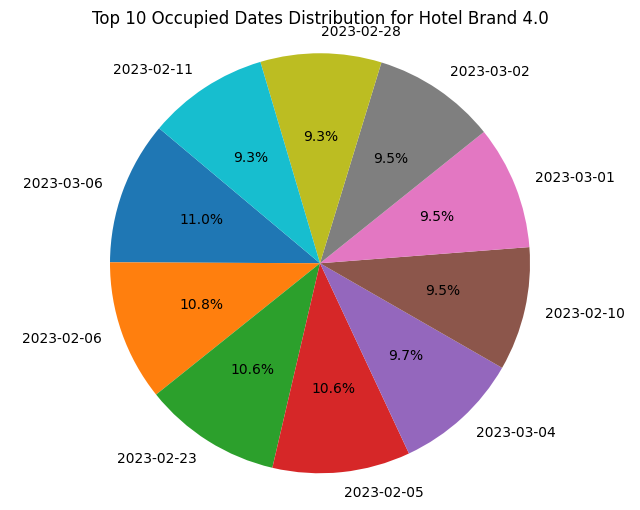

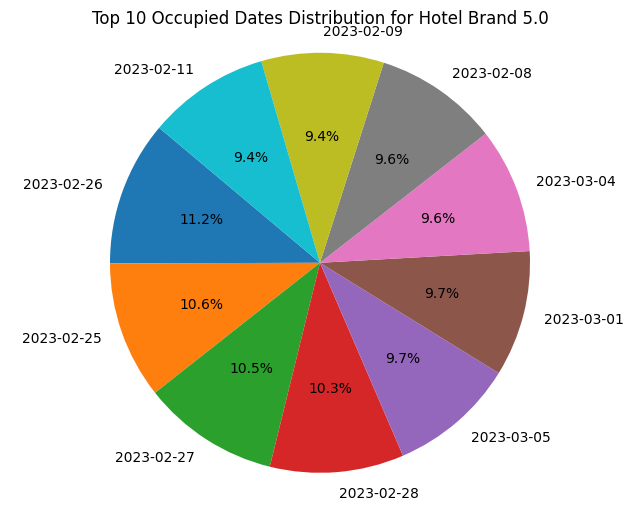

In [88]:
# Find the top 10 most occupied days for each hotel brand
top_10_dates = grouped_dates.groupby(level=0).apply(lambda x: x.value_counts().nlargest(10))

# Create a pie plot for each hotel brand with only the top 10 occupied days
for hotel_brand, occupied_dates in top_10_dates.groupby(level=0):
    plt.figure(figsize=(8, 6))
    plt.pie(occupied_dates, labels=occupied_dates.index.get_level_values(1), autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 10 Occupied Dates Distribution for Hotel Brand {hotel_brand}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


In [89]:
# Concatenate the occupied dates for each booking
occupied_dates = pd.concat([pd.Series((row['check_in'] + pd.to_timedelta(i, 'D')).date() 
                                 for i in range((row['check_out'] - row['check_in']).days + 1)) 
                            for _, row in df.iterrows()], ignore_index=True)

# Count occurrences of each date
occupied_dates_count = occupied_dates.value_counts().reset_index()
occupied_dates_count.columns = ['occupied_date', 'count']

# Find the top 5 most occupied days
top_5_occupied_days = occupied_dates_count.head(5)

# Filter the DataFrame to include only the top 5 most occupied days
top_5_dates_df = df[df['check_in'].dt.date.isin(top_5_occupied_days['occupied_date'])]



In [90]:
top_5_dates_df

,book_date,hotel_brand,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id,book_Y,book_M,check_in_date
6434,2022-11-08,3.0,2023-02-26,2023-03-01,3.5,2049.65,2022,Nov,Tuesday,Sunday,3,683.216667,375,2022,11,2023-02-26
6435,2022-11-12,1.0,2023-02-26,2023-03-05,3.0,1729.07,2022,Nov,Saturday,Sunday,7,247.010000,2550,2022,11,2023-02-26
6436,2022-11-02,5.0,2023-02-26,2023-02-27,3.0,227.25,2022,Nov,Wednesday,Sunday,1,227.250000,4373,2022,11,2023-02-26
6437,2022-11-14,3.0,2023-02-26,2023-03-08,3.5,8138.82,2022,Nov,Monday,Sunday,10,813.882000,4374,2022,11,2023-02-26
6438,2022-11-10,1.0,2023-02-26,2023-03-02,4.5,388.86,2022,Nov,Thursday,Sunday,4,97.215000,2793,2022,11,2023-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,2023-02-05,5.0,2023-03-04,2023-03-06,3.5,431.11,2023,Feb,Sunday,Saturday,2,215.555000,822,2023,2,2023-03-04
8663,2023-02-05,2.0,2023-03-04,2023-03-06,3.5,267.82,2023,Feb,Sunday,Saturday,2,133.910000,5470,2023,2,2023-03-04
8664,2023-02-05,3.0,2023-03-04,2023-03-06,4.0,463.56,2023,Feb,Sunday,Saturday,2,231.780000,5471,2023,2,2023-03-04
8665,2023-02-05,4.0,2023-03-04,2023-03-06,4.0,856.18,2023,Feb,Sunday,Saturday,2,428.090000,5472,2023,2,2023-03-04


In [91]:
top_5_dates_df.groupby(['check_in', 'hotel_brand'])['check_in_date'].count()

check_in    hotel_brand
2023-02-26  1.0             56
            2.0            115
            3.0             76
            4.0             12
            5.0             97
2023-02-27  1.0             39
            2.0            100
            3.0             64
            4.0             18
            5.0             84
2023-02-28  1.0             51
            2.0             79
            3.0             68
            4.0             13
            5.0             89
2023-03-03  1.0             66
            2.0            117
            3.0             75
            4.0             17
            5.0             80
2023-03-04  1.0             48
            2.0             91
            3.0             74
            4.0             14
            5.0             93
Name: check_in_date, dtype: int64

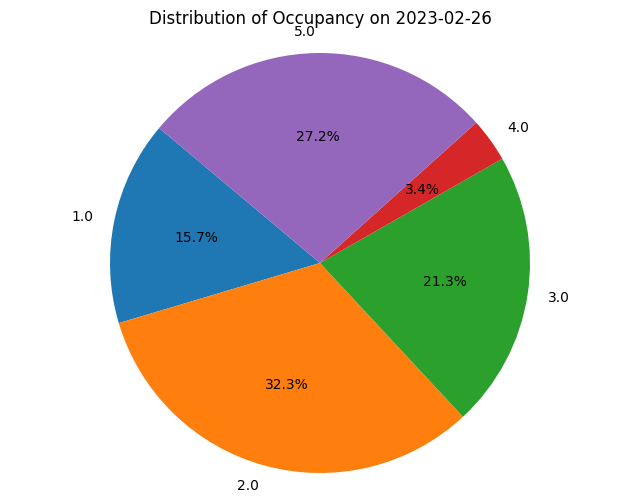

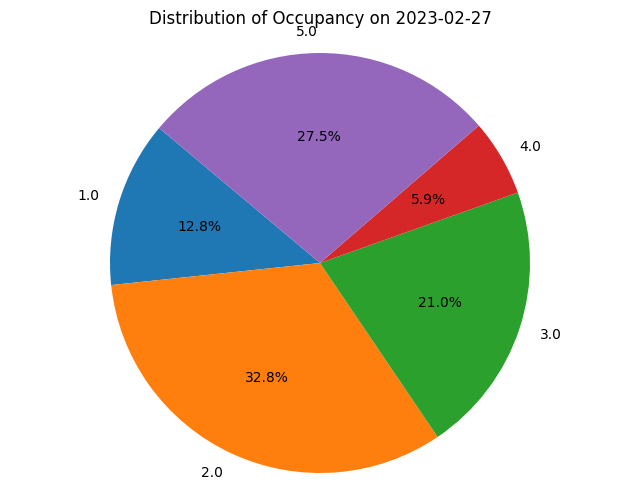

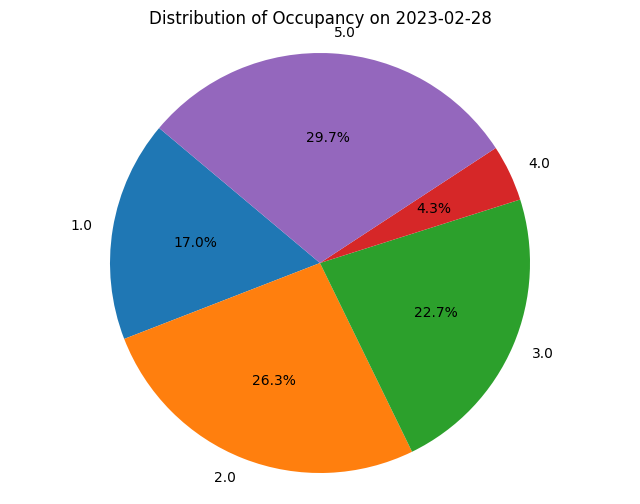

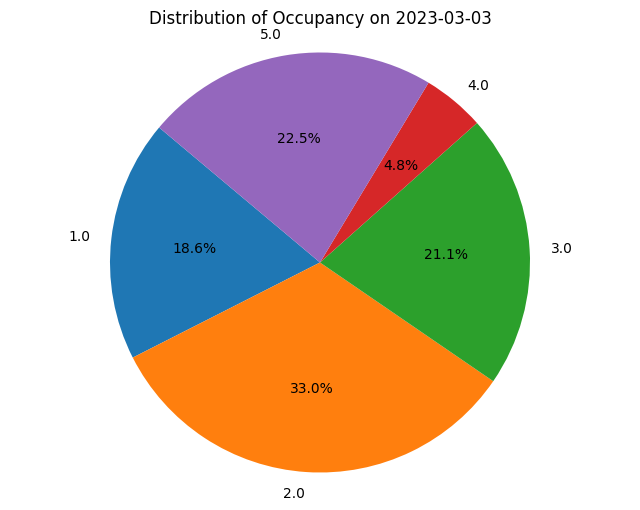

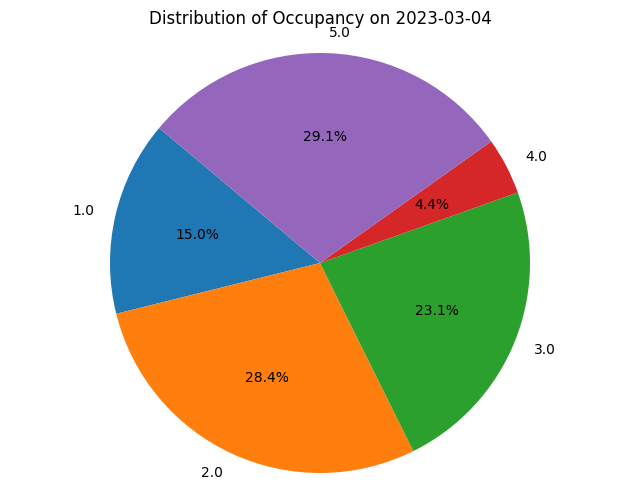

In [92]:
# Iterate over unique dates in the DataFrame
for date in top_5_dates_df['check_in'].dt.date.unique():
    # Filter the DataFrame for each date
    date_df = top_5_dates_df[top_5_dates_df['check_in'].dt.date == date]
    
    # Group the filtered DataFrame by hotel_brand and count occurrences
    date_counts = date_df.groupby('hotel_brand').size()
    
    # Create a pie plot for the distribution of occupancy on that date
    plt.figure(figsize=(8, 6))
    plt.pie(date_counts, labels=date_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Occupancy on {date}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


In [93]:
df.head()

,book_date,hotel_brand,check_in,check_out,star_rating,price,book_year,book_month,book_day,checkin_day,duration_stay,price_per_day,hotel_id,book_Y,book_M,check_in_date
0,2022-05-29,4.0,2023-01-08,2023-01-12,3.5,751.80,2022,May,Sunday,Sunday,4,187.950000,1,2022,5,2023-01-08
1,2022-06-09,4.0,2023-01-18,2023-01-26,3.5,3084.84,2022,Jun,Thursday,Wednesday,8,385.605000,2,2022,6,2023-01-18
2,2022-05-30,3.0,2023-01-07,2023-01-12,3.5,4209.89,2022,May,Monday,Saturday,5,841.978000,3,2022,5,2023-01-07
3,2022-05-31,5.0,2023-01-06,2023-01-07,2.5,80.55,2022,May,Tuesday,Friday,1,80.550000,4,2022,5,2023-01-06
4,2022-06-02,1.0,2023-01-24,2023-02-07,3.0,344.72,2022,Jun,Thursday,Tuesday,14,24.622857,5,2022,6,2023-01-24


In [94]:
df[df['hotel_brand'] == 5.0]['price'].describe()

count     3146.000000
mean       472.364234
std        715.838047
min         29.360000
25%        163.412500
50%        264.830000
75%        484.920000
max      10130.500000
Name: price, dtype: float64